In [1]:
import pandas as pd
import numpy as np
import random
import itertools

import seaborn as sns
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import *

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import (LinearRegression,LogisticRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor, Ridge)

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# import warnings
# from sklearn.exceptions import DataConversionWarning
# warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import random

In [2]:
pd.options.display.max_columns = 120

In [3]:
files = [f for f in listdir("data") if isfile(join("data", f))]

In [4]:
ext = "s_d_t_"
dataframes_sdt = []
dataframes_sd = []
for filename in files:
    if filename.startswith(ext):
        df = pd.read_csv("data\\" + filename, index_col=None, header=0, encoding='latin1')
        df.columns = ['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiac', 'Dzien', 'Średnie dobowe zachmurzenie ogólne [oktanty]', 'Status pomiaru NOS ', 'Średnia dobowa prędkość wiatru [m/s]', 'Status pomiaru FWS ', 
                      'Średnia dobowa temperatura [°C]', 'Status pomiaru TEMP', 'Średnia dobowe ciśnienie pary wodnej [hPa]', 'Status pomiaru CPW', 'Średnia dobowa wilgotność względna [%]', 'Status pomiaru WLGS',
                      'Średnia dobowe ciśnienie na poziomie stacji [hPa]', 'Status pomiaru PPPS ', 'Średnie dobowe ciśnienie na pozimie morza [hPa]', 'Status pomiaru PPPM', 'Suma opadu dzień  [mm]', 'Status pomiaru WODZ', 
                      'Suma opadu noc   [mm] ','Status pomiaru WONO']
        dataframes_sdt.append(df)
        
    else:
        df = pd.read_csv("data\\" + filename, index_col=None, header=0, encoding='latin1')
        df.columns = ['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiac', 'Dzien', 'Maksymalna temperatura dobowa [°C]', 'Status pomiaru TMAX', 'Minimalna temperatura dobowa [°C]', 'Status pomiaru TMIN', 
                      'Średnia temperatura dobowa [°C]', 'Status pomiaru STD ', 'Temperatura minimalna przy gruncie [°C] ', 'Status pomiaru TMNG  ', 'Suma dobowa opadu [mm]', 'Status pomiaru SMDB',
                      'Rodzaj opadu [S/W/ ] ', 'Wysokość pokrywy śnieżnej [cm] ', 'Status pomiaru PKSN ', 'Równoważnik wodny śniegu  [mm/cm]', 'Status pomiaru RWSN ', 'Usłonecznienie [godziny]', 
                      'Status pomiaru USL','Czas trwania opadu deszczu [godziny]', 'Status pomiaru DESZ', 'Czas trwania opadu śniegu [godziny]', 'Status pomiaru SNEG', 'Czas trwania opadu deszczu ze śniegiem [godziny]'
                      , 'Status pomiaru DISN  ', 'Czas trwania gradu [godziny] ', 'Status pomiaru GRAD', 'Czas trwania mgły [godziny]', 'Status pomiaru MGLA', 'Czas trwania zamglenia  [godziny]', 'Status pomiaru ZMGL',
                      'Czas trwania sadzi [godziny]', 'Status pomiaru SADZ', 'Czas trwania gołoledzi [godziny]', 'Status pomiaru GOLO ', 'Czas trwania zamieci śnieżnej niskiej [godziny]', 'Status pomiaru ZMNI', 'Czas trwania zamieci śnieżnej wysokiej [godziny]',
                      'Status pomiaru ZMWS', 'Czas trwania zmętnienia [godziny]', 'Status pomiaru ZMET', 'Czas trwania wiatru >=10m/s [godziny] ', 'Status pomiaru FF10', 'Czas trwania wiatru >15m/s [godziny]', 'Status pomiaru FF15'
                      , 'Czas trwania burzy  [godziny]', 'Status pomiaru BRZA ', 'Czas trwania rosy  [godziny]', 'Status pomiaru ROSA'
                     , 'Czas trwania szronu [godziny]', 'Status pomiaru SZRO', 'Wystąpienie pokrywy śnieżnej  [0/1]', 'Status pomiaru DZPS', 'Wystąpienie błyskawicy  [0/1]', 'Status pomiaru DZBL ', 'Stan gruntu [Z/R]',
                      'Izoterma dolna  [cm] ', 'Status pomiaru IZD', 'Izoterma górna [cm] ', 'Status pomiaru IZG ', 'Aktynometria  [J/cm2]', 'Status pomiaru AKTN ']
        dataframes_sd.append(df)
    

In [5]:
dataframes_sdt[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Kod stacji                                         364 non-null    int64  
 1   Nazwa stacji                                       364 non-null    object 
 2   Rok                                                364 non-null    int64  
 3   Miesiac                                            364 non-null    int64  
 4   Dzien                                              364 non-null    int64  
 5   Średnie dobowe zachmurzenie ogólne [oktanty]       364 non-null    float64
 6   Status pomiaru NOS                                 0 non-null      float64
 7   Średnia dobowa prędkość wiatru [m/s]               364 non-null    float64
 8   Status pomiaru FWS                                 0 non-null      float64
 9   Średnia do

In [6]:
dataframes_sd[0].columns

Index(['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiac', 'Dzien',
       'Maksymalna temperatura dobowa [°C]', 'Status pomiaru TMAX',
       'Minimalna temperatura dobowa [°C]', 'Status pomiaru TMIN',
       'Średnia temperatura dobowa [°C]', 'Status pomiaru STD ',
       'Temperatura minimalna przy gruncie [°C] ', 'Status pomiaru TMNG  ',
       'Suma dobowa opadu [mm]', 'Status pomiaru SMDB',
       'Rodzaj opadu [S/W/ ] ', 'Wysokość pokrywy śnieżnej [cm] ',
       'Status pomiaru PKSN ', 'Równoważnik wodny śniegu  [mm/cm]',
       'Status pomiaru RWSN ', 'Usłonecznienie [godziny]',
       'Status pomiaru USL', 'Czas trwania opadu deszczu [godziny]',
       'Status pomiaru DESZ', 'Czas trwania opadu śniegu [godziny]',
       'Status pomiaru SNEG',
       'Czas trwania opadu deszczu ze śniegiem [godziny]',
       'Status pomiaru DISN  ', 'Czas trwania gradu [godziny] ',
       'Status pomiaru GRAD', 'Czas trwania mgły [godziny]',
       'Status pomiaru MGLA', 'Czas trwania zamglenia  [g

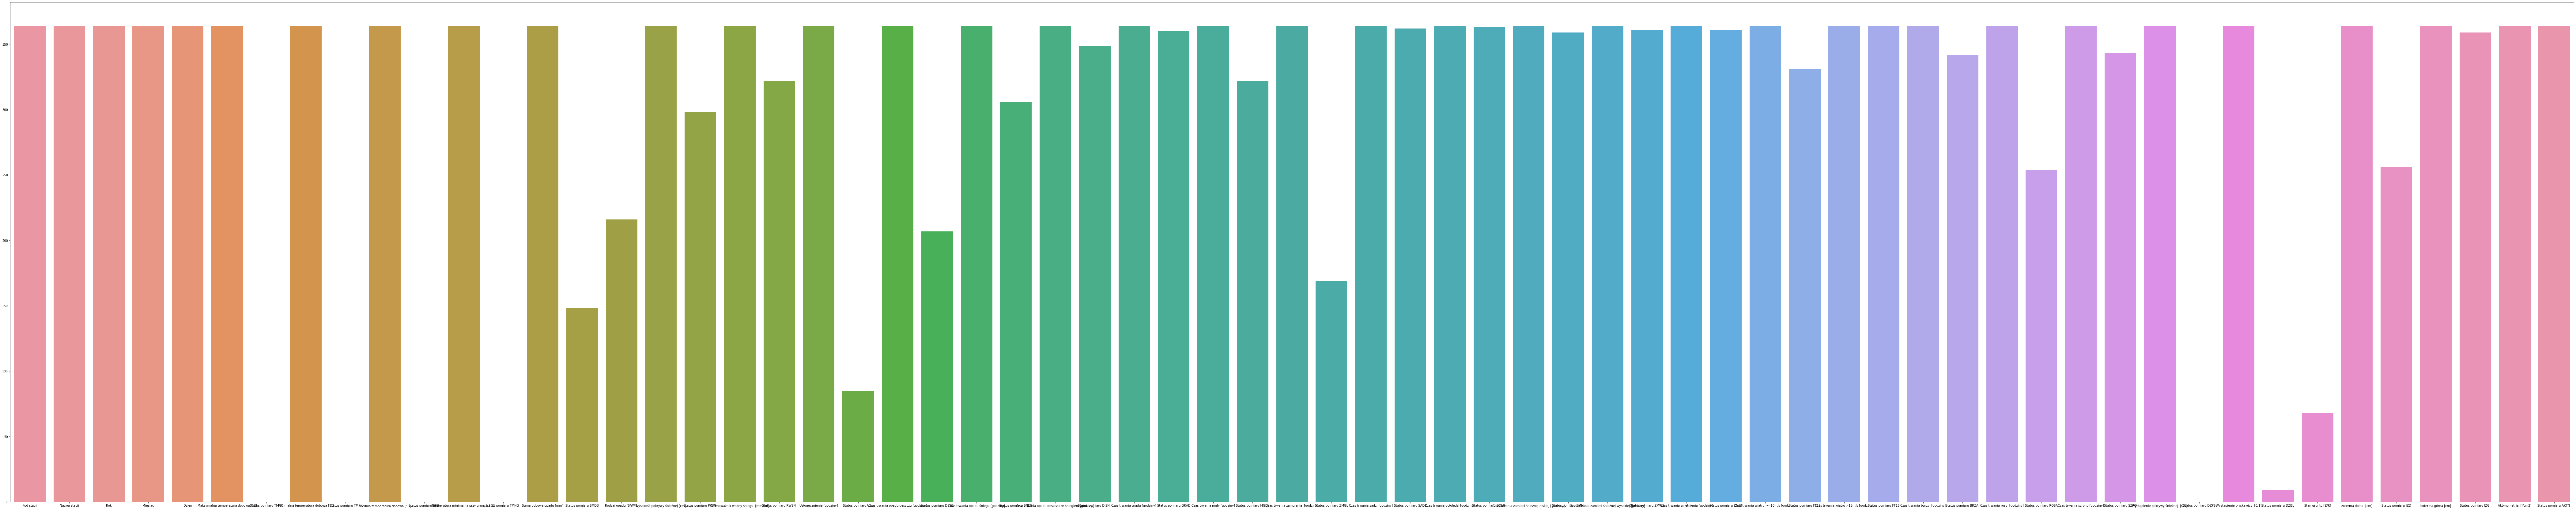

In [7]:
fig, ax = plt.subplots(figsize=(150,30))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(dataframes_sd[0].columns, dataframes_sd[0].count())

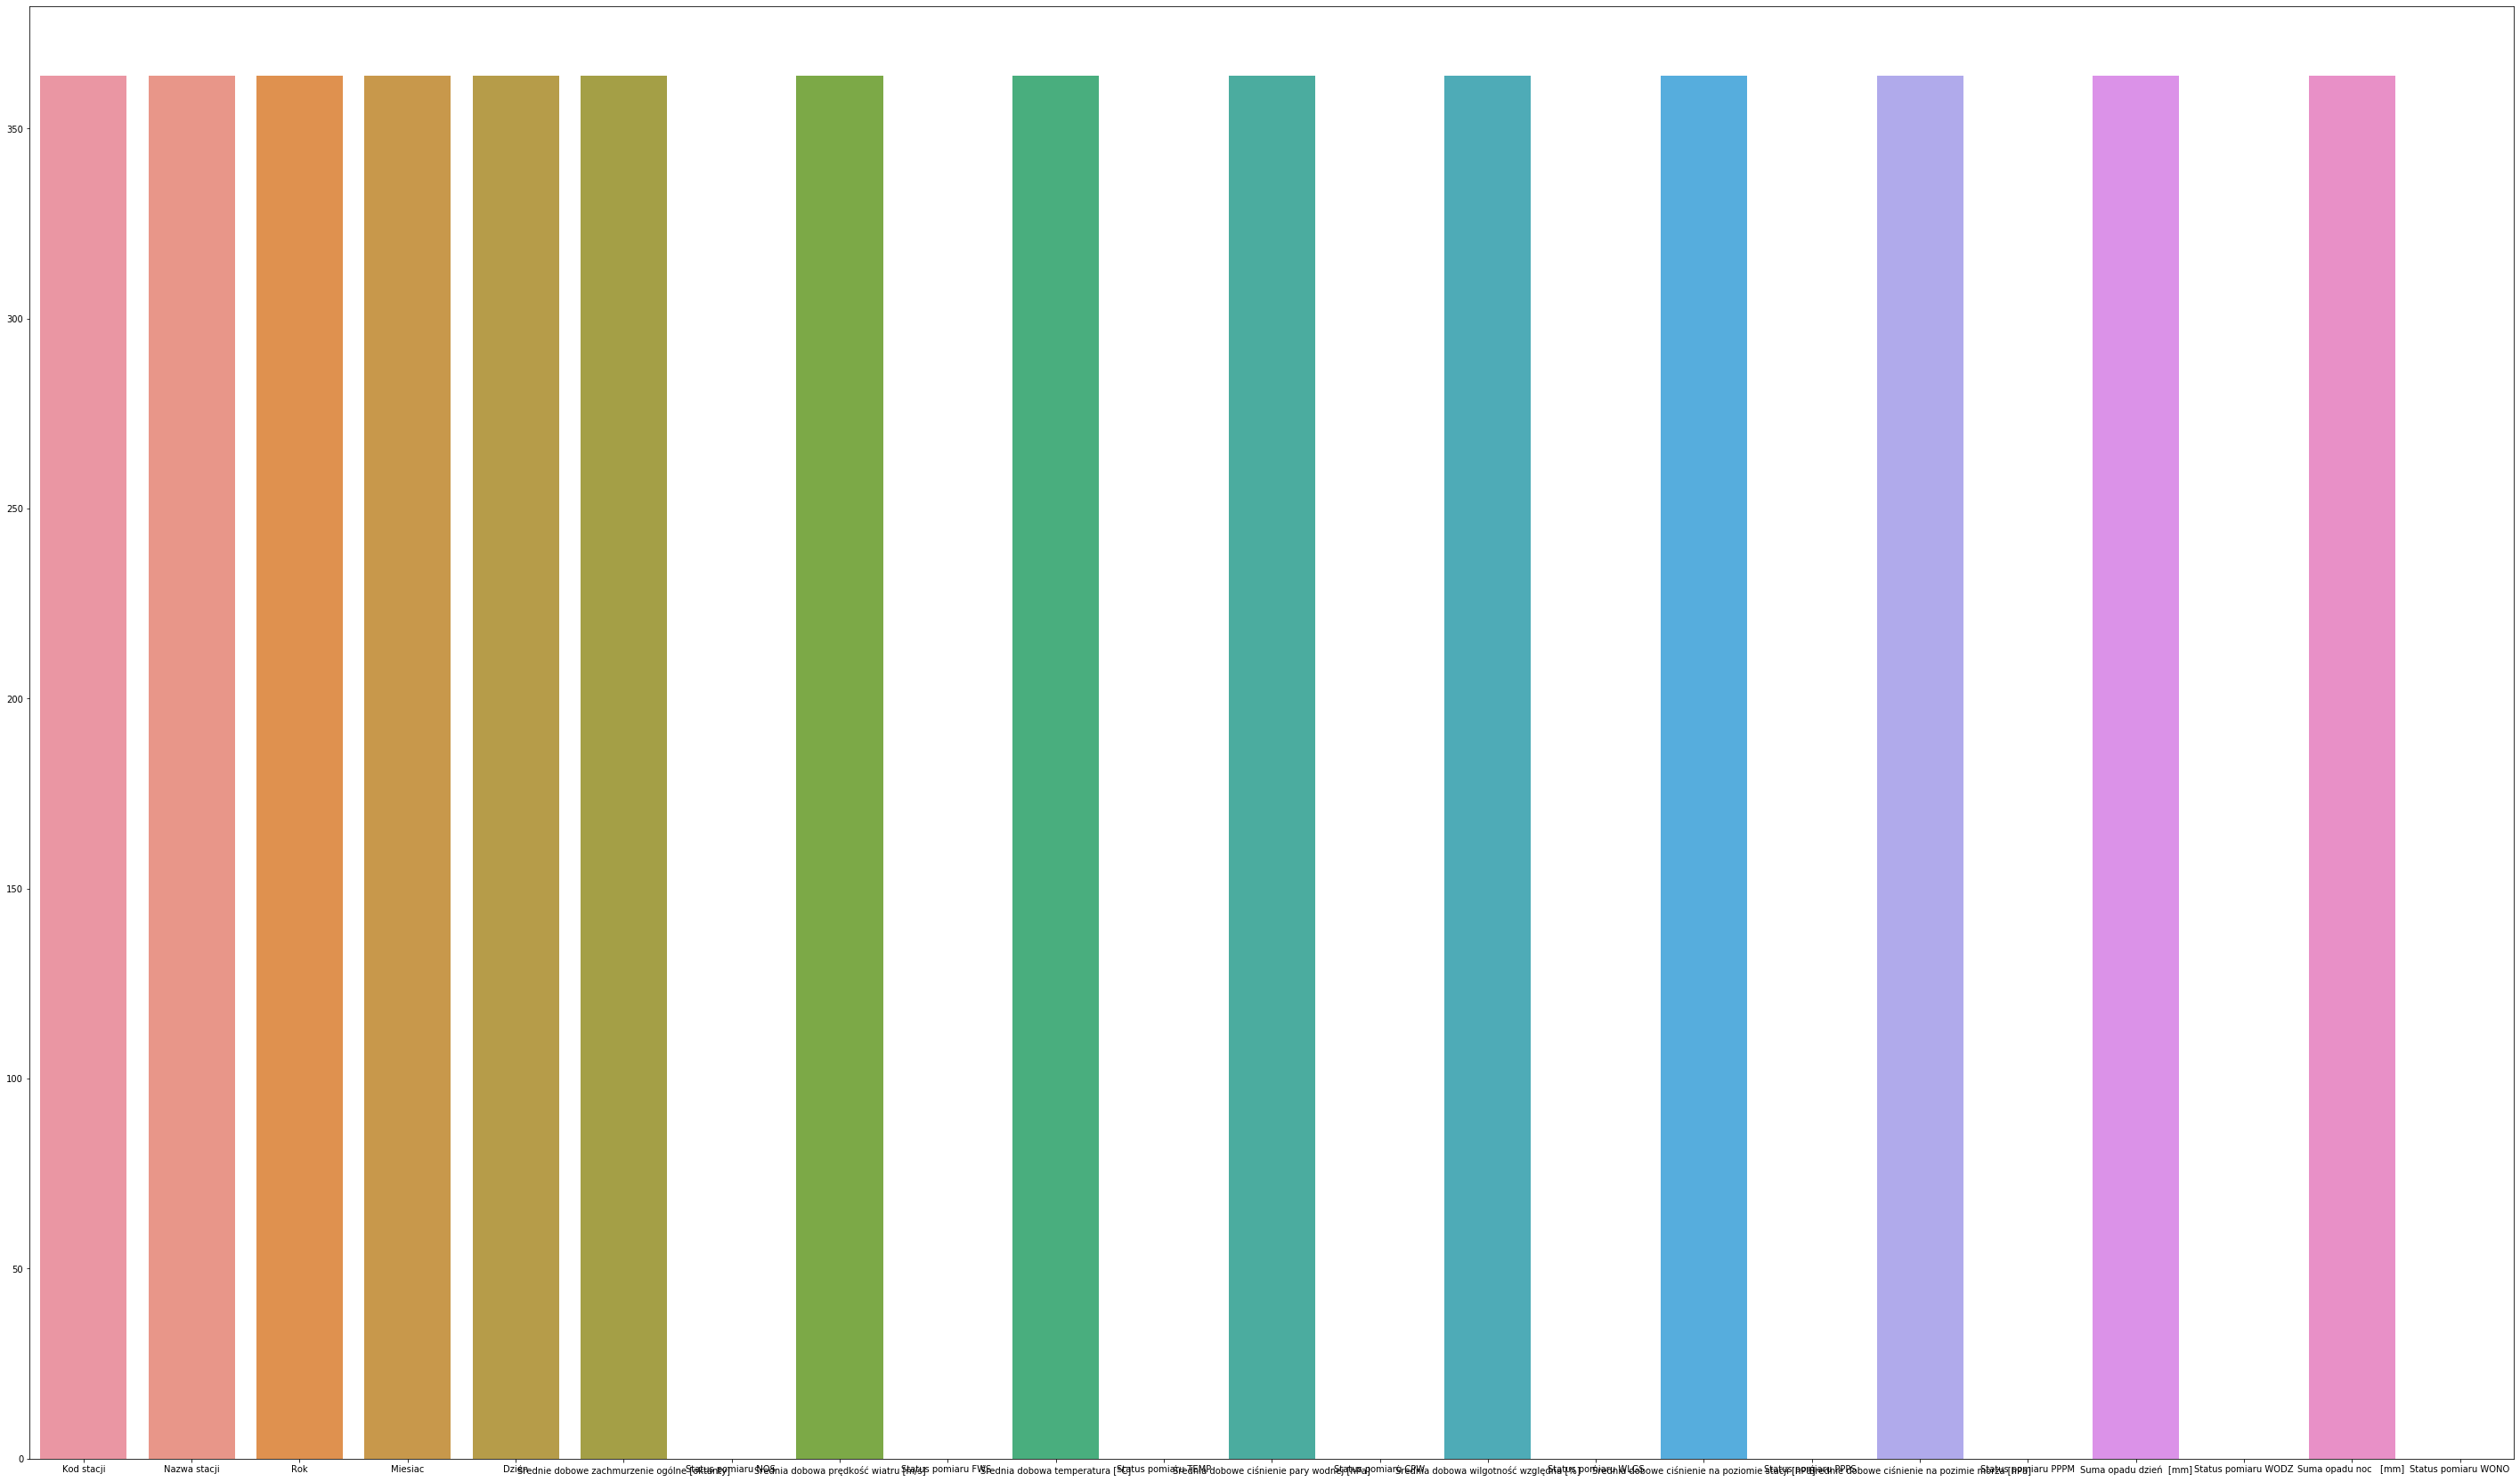

In [8]:
fig, ax = plt.subplots(figsize=(50,30))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(dataframes_sdt[0].columns, dataframes_sdt[0].count())

### Z otrymanych wykresów można stwiedzić że w niektórych wykresach jest duży brak znaczeń dlatego trzeba sprawdzić obecność rekordów w podanych kolumnach dla pozostalych dataframów.

In [9]:
def dataCountForDataset(listOfDataframes):
    dataCountDict = {}
    for i, DataFrame in enumerate(listOfDataframes):
        for column in DataFrame.columns:
            if i == 0:
                dataCountDict[column] = DataFrame.count()[column]
            else:
                dataCountDict[column] += DataFrame.count()[column]
    return dataCountDict.keys(), dataCountDict.values()

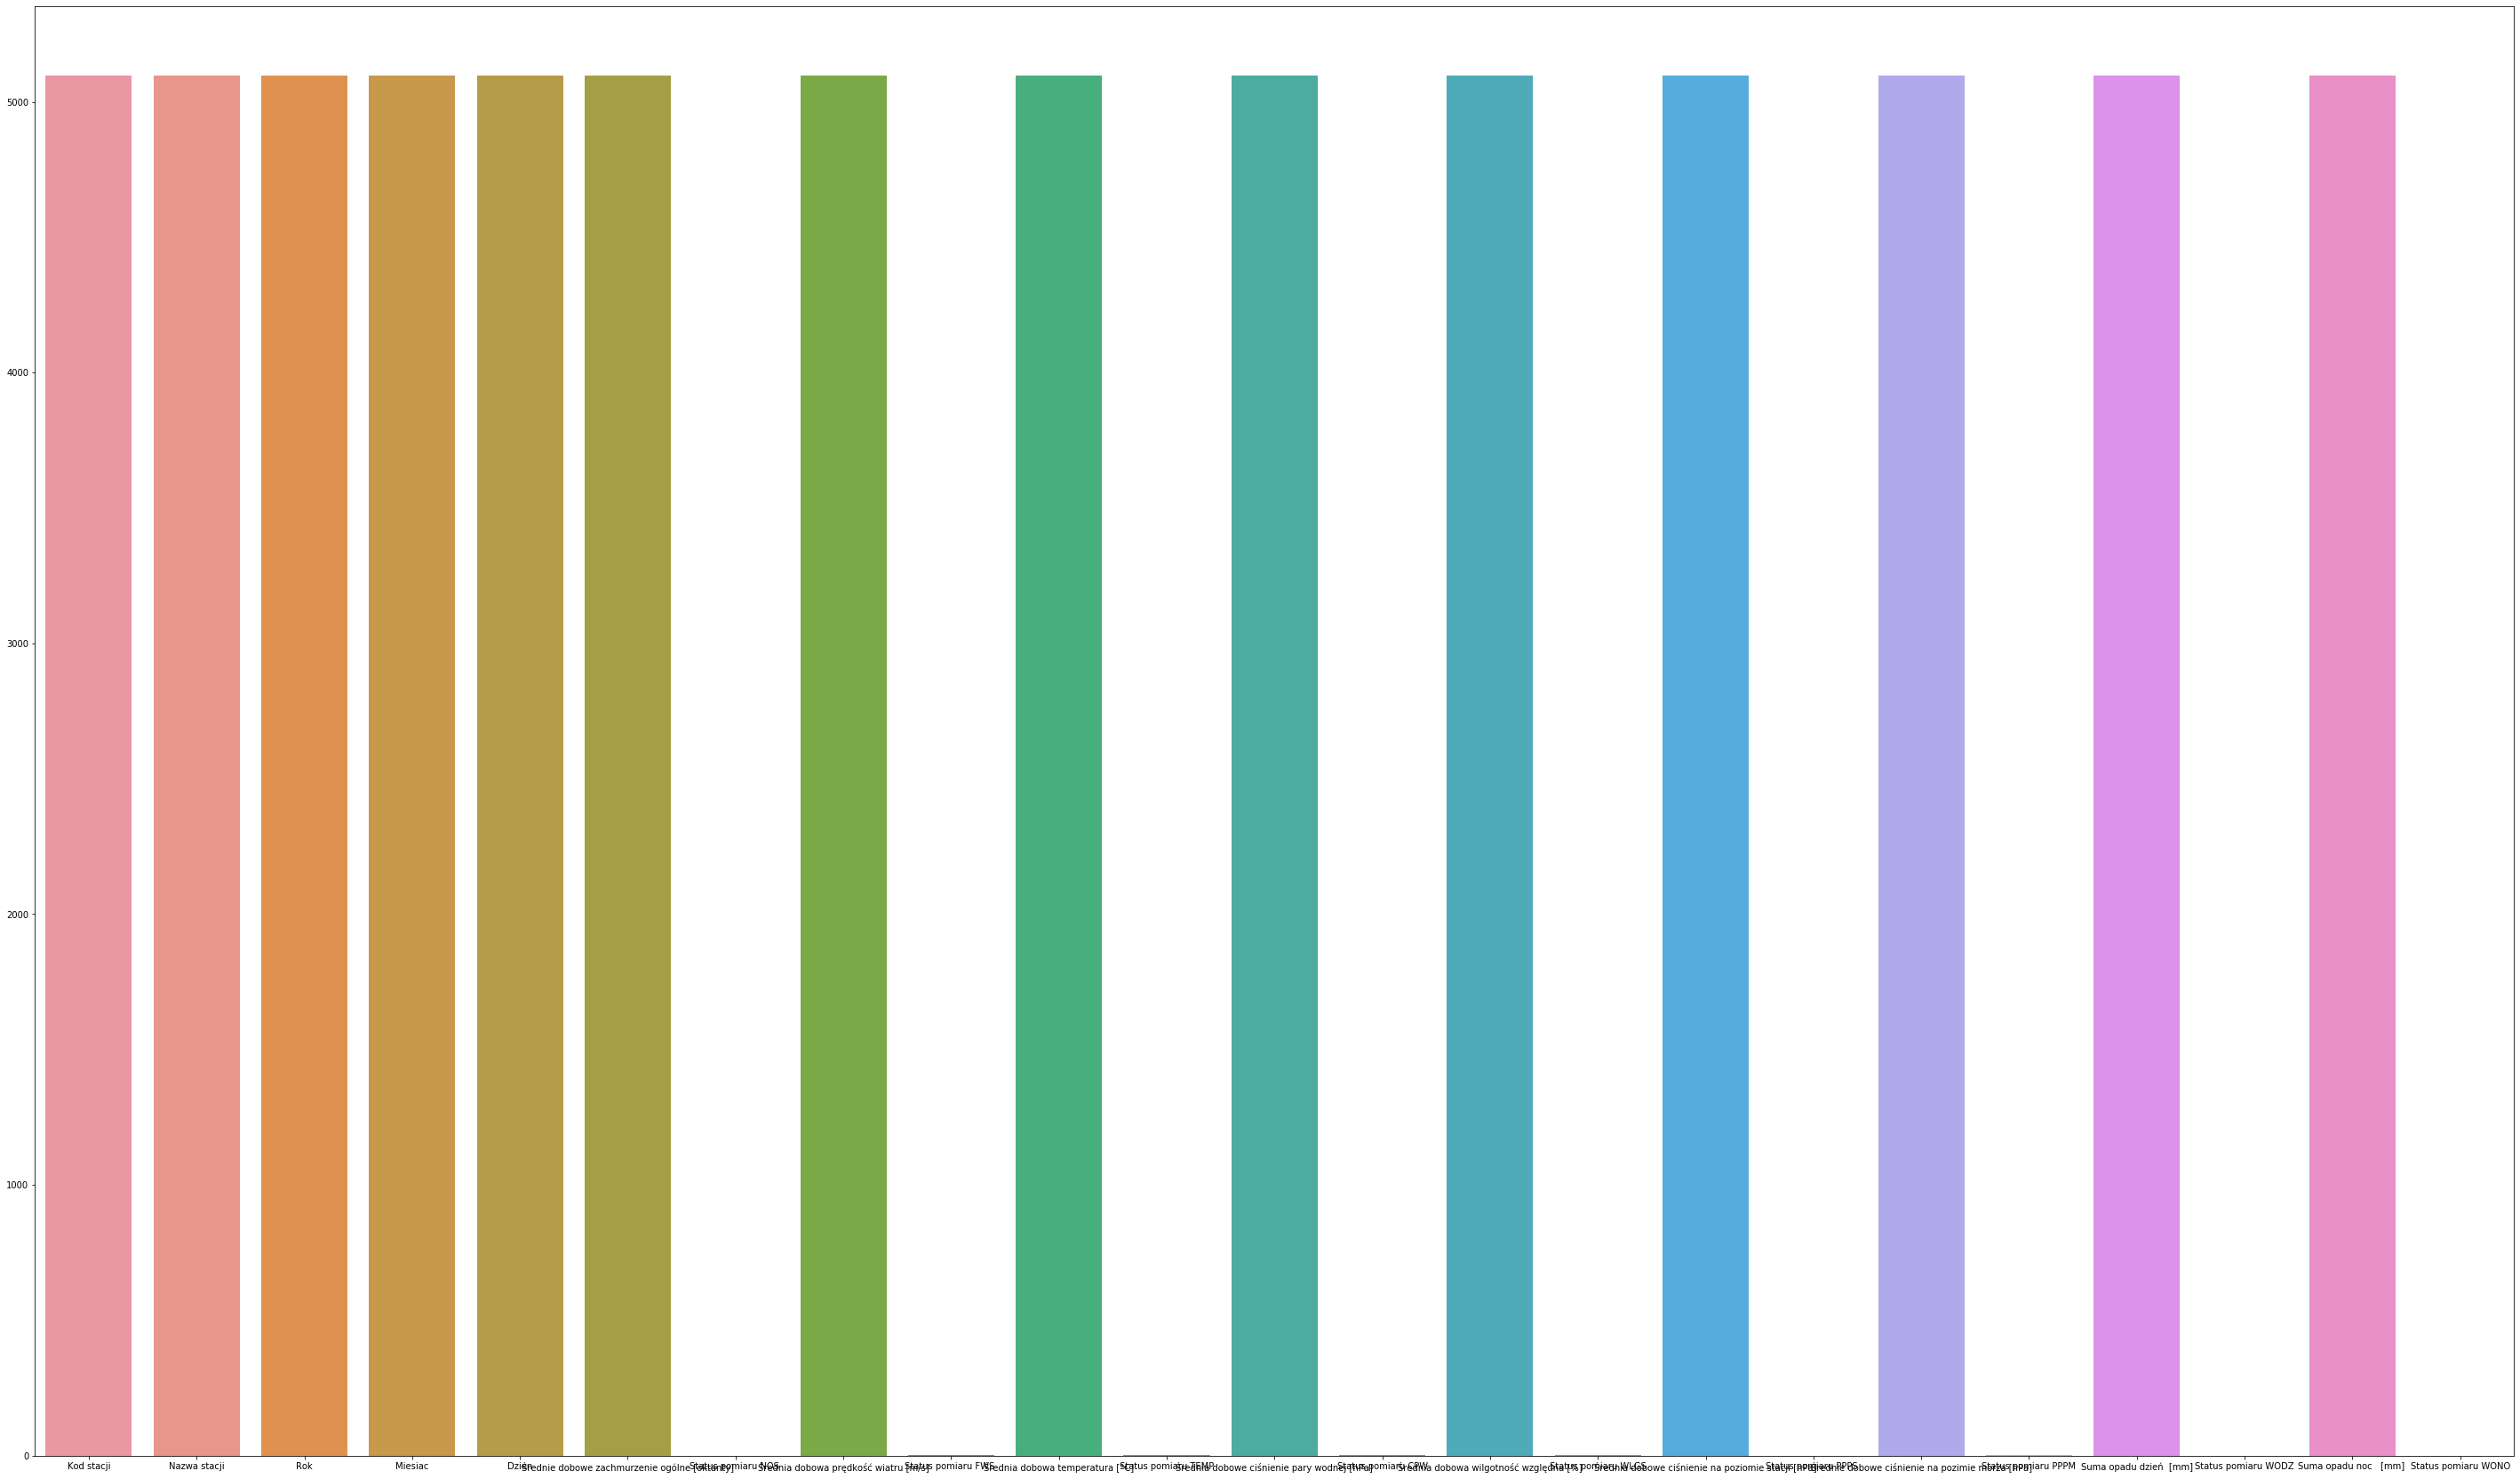

In [10]:
fig, ax = plt.subplots(figsize=(50,30))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(list(dataCountForDataset(dataframes_sdt)[0]), list(dataCountForDataset(dataframes_sdt)[1]))

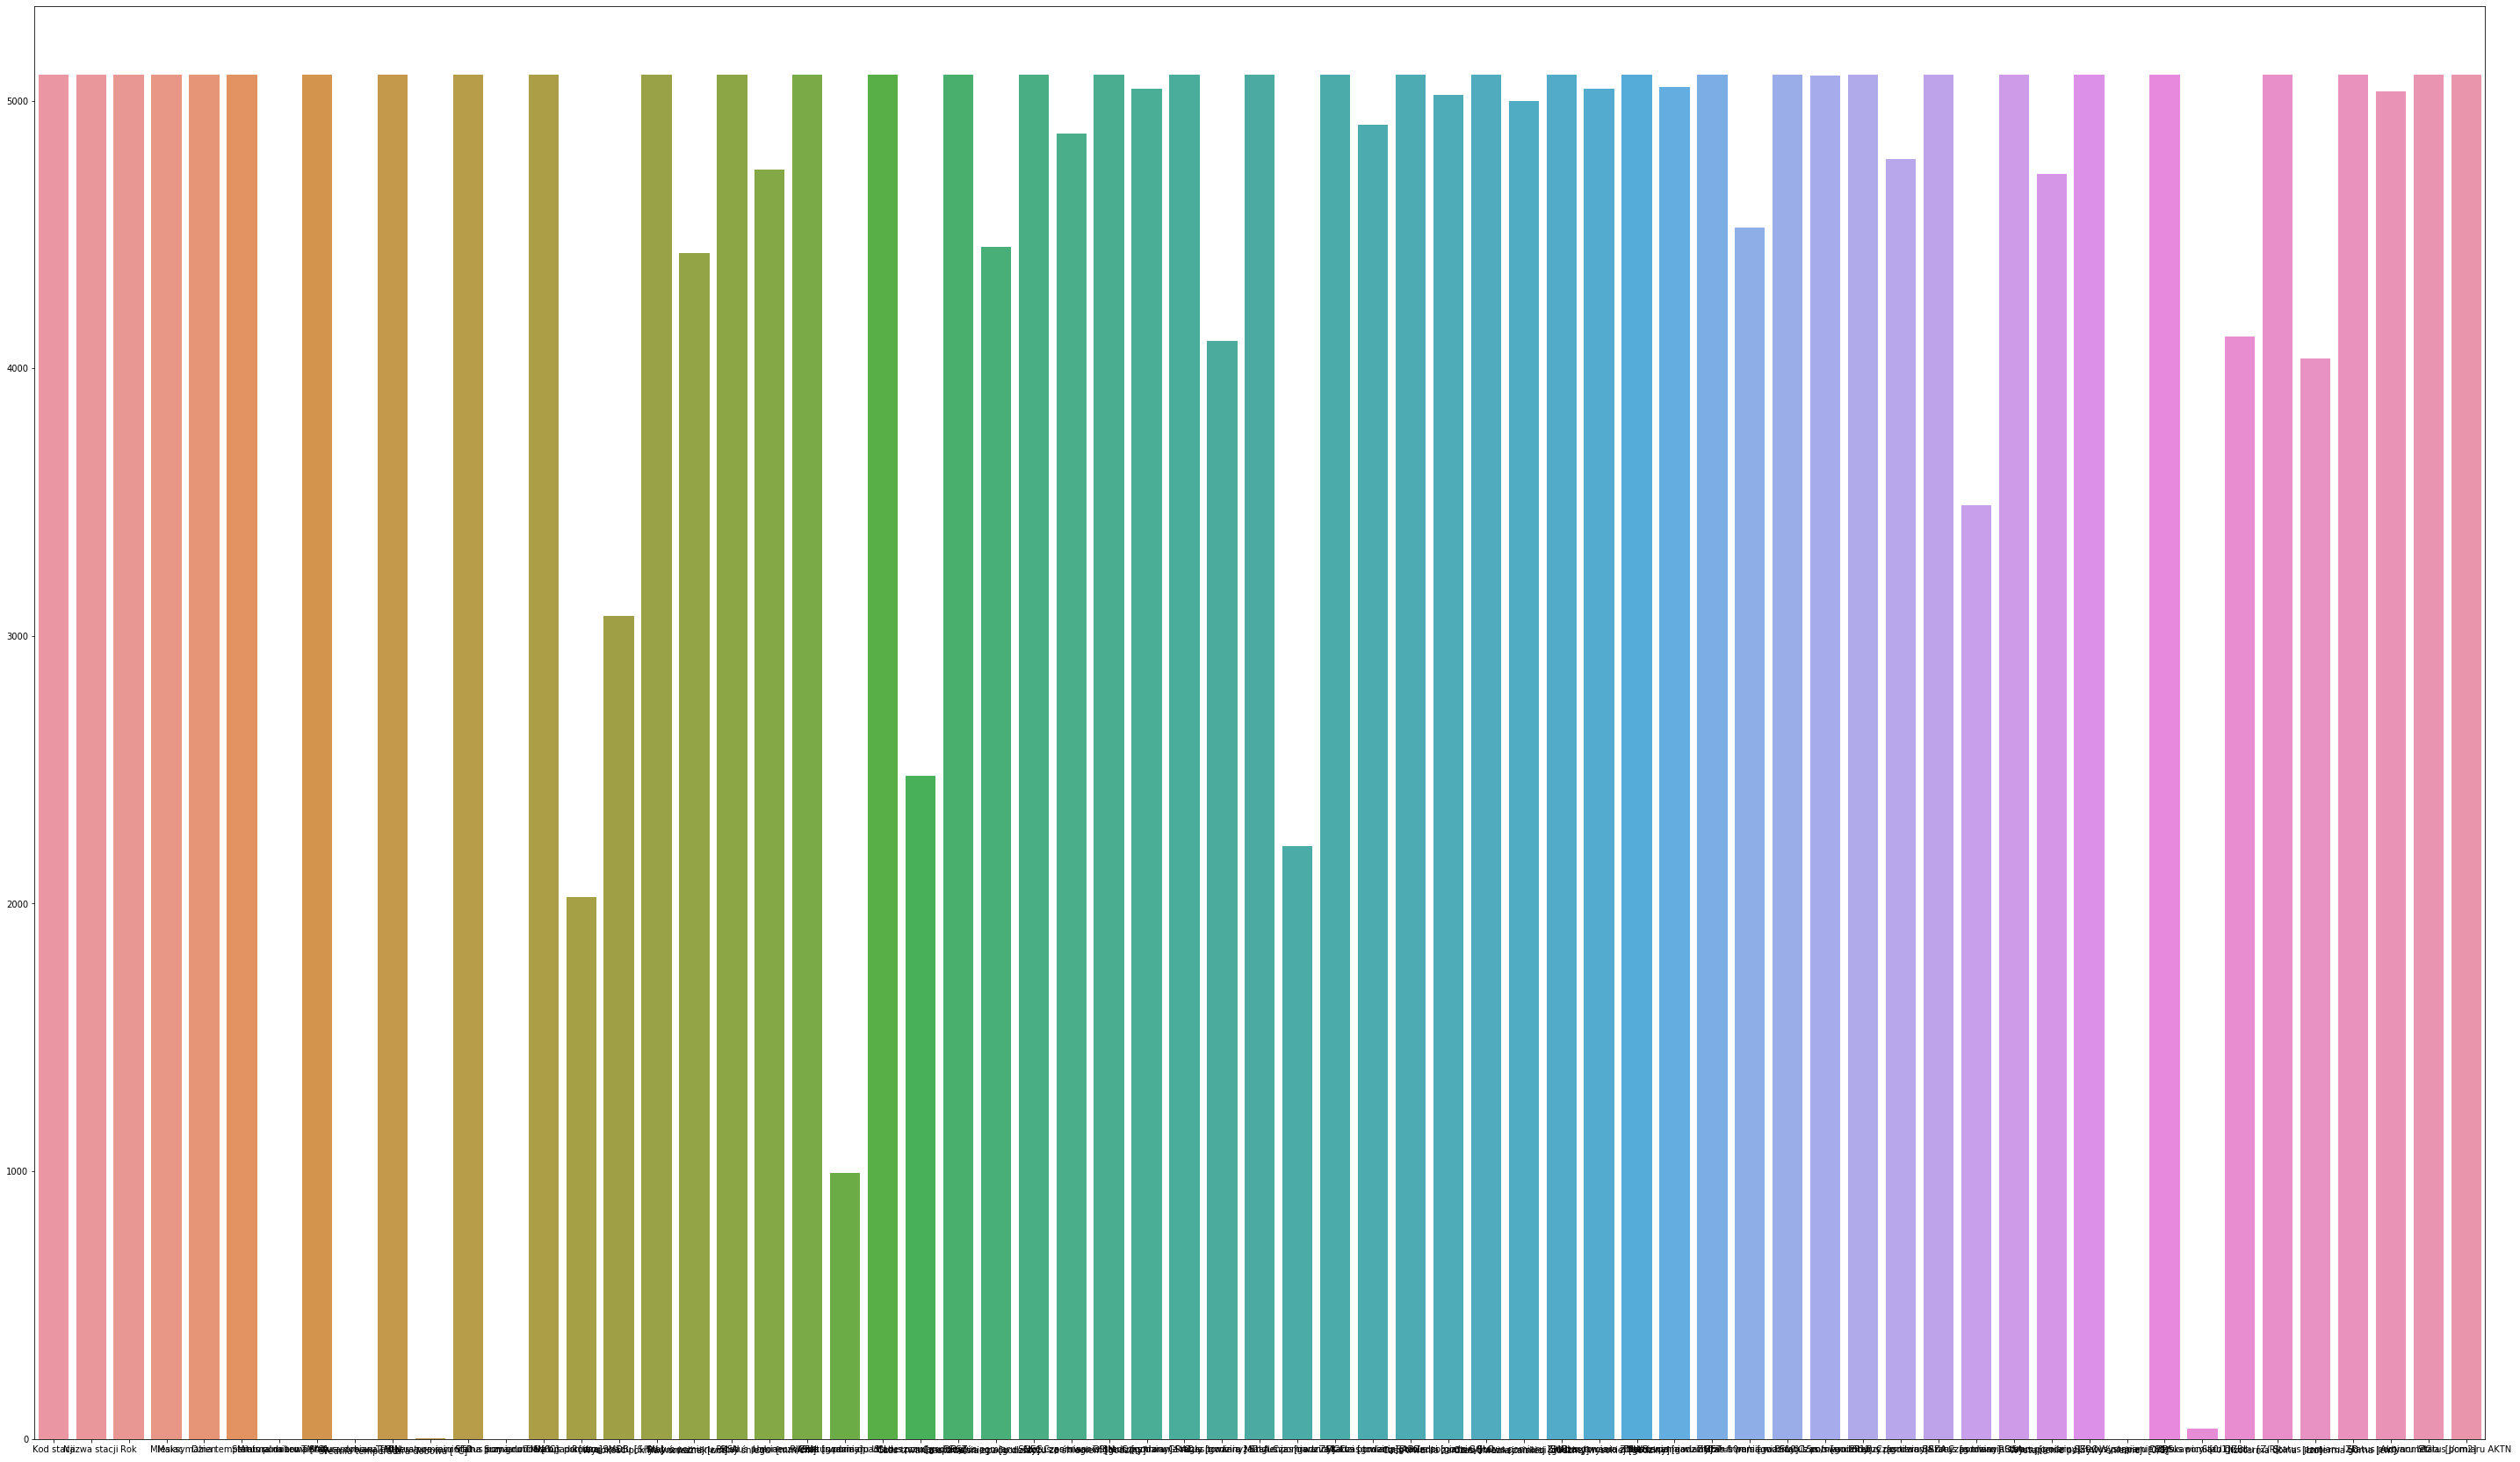

In [11]:
fig, ax = plt.subplots(figsize=(50,30))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(list(dataCountForDataset(dataframes_sd)[0]), list(dataCountForDataset(dataframes_sd)[1]))

### Odżucamy wszystkie kolumny które mają mniej niż 70 procent zapisów za wszystkie badane lata

In [12]:
[df.dropna(thresh = len(df)*0.7, axis = 1, inplace = True) for df in dataframes_sd]
[df.dropna(thresh = len(df)*0.7, axis = 1, inplace = True) for df in dataframes_sdt]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [13]:
dataframes_sdt[0]

Kod stacji   Nazwa stacji   Rok  Miesiac  Dzien  \
0     354180155  GDAÑSK-WIBNO  2013        1      2   
1     354180155  GDAÑSK-WIBNO  2013        1      3   
2     354180155  GDAÑSK-WIBNO  2013        1      4   
3     354180155  GDAÑSK-WIBNO  2013        1      5   
4     354180155  GDAÑSK-WIBNO  2013        1      6   
..          ...            ...   ...      ...    ...   
359   354180155  GDAÑSK-WIBNO  2013       12     27   
360   354180155  GDAÑSK-WIBNO  2013       12     28   
361   354180155  GDAÑSK-WIBNO  2013       12     29   
362   354180155  GDAÑSK-WIBNO  2013       12     30   
363   354180155  GDAÑSK-WIBNO  2013       12     31   

     Średnie dobowe zachmurzenie ogólne [oktanty]  \
0                                             7.4   
1                                             7.3   
2                                             3.4   
3                                             4.9   
4                                             6.6   
..                                            ...   
359                                           6.4   
360                                           7.1   
361                                           7.1   
362                                           4.6   
363                                           1.4   

     Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                                     3.8                              3.2   
1                                     6.1                              4.7   
2                                     6.3                              5.5   
3                                     5.3                              3.3   
4                                     3.3                              1.4   
..                                    ...                              ...   
359                                   5.6                              5.4   
360                                   5.5                              5.9   
361                                   3.5                              5.3   
362                                   3.9                              4.2   
363                                   5.3                              0.2   

     Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                           7.6   
1                                           8.3   
2                                           8.1   
3                                           6.7   
4                                           6.1   
..                                          ...   
359                                         8.2   
360                                         8.4   
361                                         8.2   
362                                         7.4   
363                                         5.9   

     Średnia dobowa wilgotność względna [%]  \
0                                      98.6   
1                                      97.5   
2                                      89.3   
3                                      86.4   
4                                      90.1   
..                                      ...   
359                                    91.9   
360                                    89.8   
361                                    92.0   
362                                    89.6   
363                                    94.9   

     Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                               1010.8   
1                                               1011.8   
2                                               1014.0   
3                                               1020.5   
4                                               1020.2   
..                                                 ...   
359                                             1003.8   
360                                             1004.2   
361                                             1008.8   


In [14]:
merged_df=[]
for i in range(len(dataframes_sdt)):
    merged_df.append(pd.merge(dataframes_sdt[i],dataframes_sd[i],how='left',left_on=["Rok",'Miesiac',"Dzien"],right_on=["Rok",'Miesiac',"Dzien"]))


In [15]:
data_df=merged_df[0]
for i in range(1,len(merged_df)):
    data_df=data_df.append(merged_df[i])

In [16]:
both = merged_df[0].append(merged_df[1])

In [17]:
data_df

Kod stacji_x   Nazwa stacji_x   Rok  Miesiac  Dzien  \
0       354180155    GDAÑSK-WIBNO  2013        1      2   
1       354180155    GDAÑSK-WIBNO  2013        1      3   
2       354180155    GDAÑSK-WIBNO  2013        1      4   
3       354180155    GDAÑSK-WIBNO  2013        1      5   
4       354180155    GDAÑSK-WIBNO  2013        1      6   
..            ...              ...   ...      ...    ...   
359     354190160  ELBL¥G-MILEJEWO  2019       12     27   
360     354190160  ELBL¥G-MILEJEWO  2019       12     28   
361     354190160  ELBL¥G-MILEJEWO  2019       12     29   
362     354190160  ELBL¥G-MILEJEWO  2019       12     30   
363     354190160  ELBL¥G-MILEJEWO  2019       12     31   

     Średnie dobowe zachmurzenie ogólne [oktanty]  \
0                                             7.4   
1                                             7.3   
2                                             3.4   
3                                             4.9   
4                                             6.6   
..                                            ...   
359                                           6.8   
360                                           6.9   
361                                           7.1   
362                                           6.5   
363                                           6.9   

     Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                                     3.8                              3.2   
1                                     6.1                              4.7   
2                                     6.3                              5.5   
3                                     5.3                              3.3   
4                                     3.3                              1.4   
..                                    ...                              ...   
359                                   3.8                              0.8   
360                                   5.3                             -0.5   
361                                   4.5                             -1.0   
362                                  10.8                              1.4   
363                                   6.4                              4.0   

     Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                           7.6   
1                                           8.3   
2                                           8.1   
3                                           6.7   
4                                           6.1   
..                                          ...   
359                                         6.1   
360                                         4.9   
361                                         5.2   
362                                         4.4   
363                                         6.3   

     Średnia dobowa wilgotność względna [%]  \
0                                      98.6   
1                                      97.5   
2                                      89.3   
3                                      86.4   
4                                      90.1   
..                                      ...   
359                                    93.5   
360                                    82.6   
361                                    91.6   
362                                    65.9   
363                                    77.6   

     Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                               1010.8   
1                                               1011.8   
2                                               1014.0   
3                                               1020.5   
4                                               1020.2   
..                                                 ...   
359                                             1000.5   
360                                             1012.0   
361       

In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5098 entries, 0 to 363
Data columns (total 65 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Kod stacji_x                                       5098 non-null   int64  
 1   Nazwa stacji_x                                     5098 non-null   object 
 2   Rok                                                5098 non-null   int64  
 3   Miesiac                                            5098 non-null   int64  
 4   Dzien                                              5098 non-null   int64  
 5   Średnie dobowe zachmurzenie ogólne [oktanty]       5098 non-null   float64
 6   Średnia dobowa prędkość wiatru [m/s]               5098 non-null   float64
 7   Średnia dobowa temperatura [°C]                    5098 non-null   float64
 8   Średnia dobowe ciśnienie pary wodnej [hPa]         5098 non-null   float64
 9   Średnia d

In [19]:
data_df.dropna(thresh = len(df)*0.7, axis = 1, inplace = True)

### Dropupujemy nazwy column i nazwy stacii pomiarowych które duplikują sie i nie maja wpływu na wyliczenia

In [20]:
data_df.drop(columns = ["Nazwa stacji_x", "Kod stacji_x", "Kod stacji_y", "Kod stacji_y", "Nazwa stacji_y", "Stan gruntu [Z/R]"], inplace = True)

### To samo dla kolumn które mająw nazwie Status poniważzawierają danne czy był pomiar otrzymany

In [21]:
filtered = [col for col in data_df if col.lower()[:6] != 'status']

In [22]:
data_df = data_df[filtered]

### Wykres dla znalezienia największych korelacji pomiędzy columnami

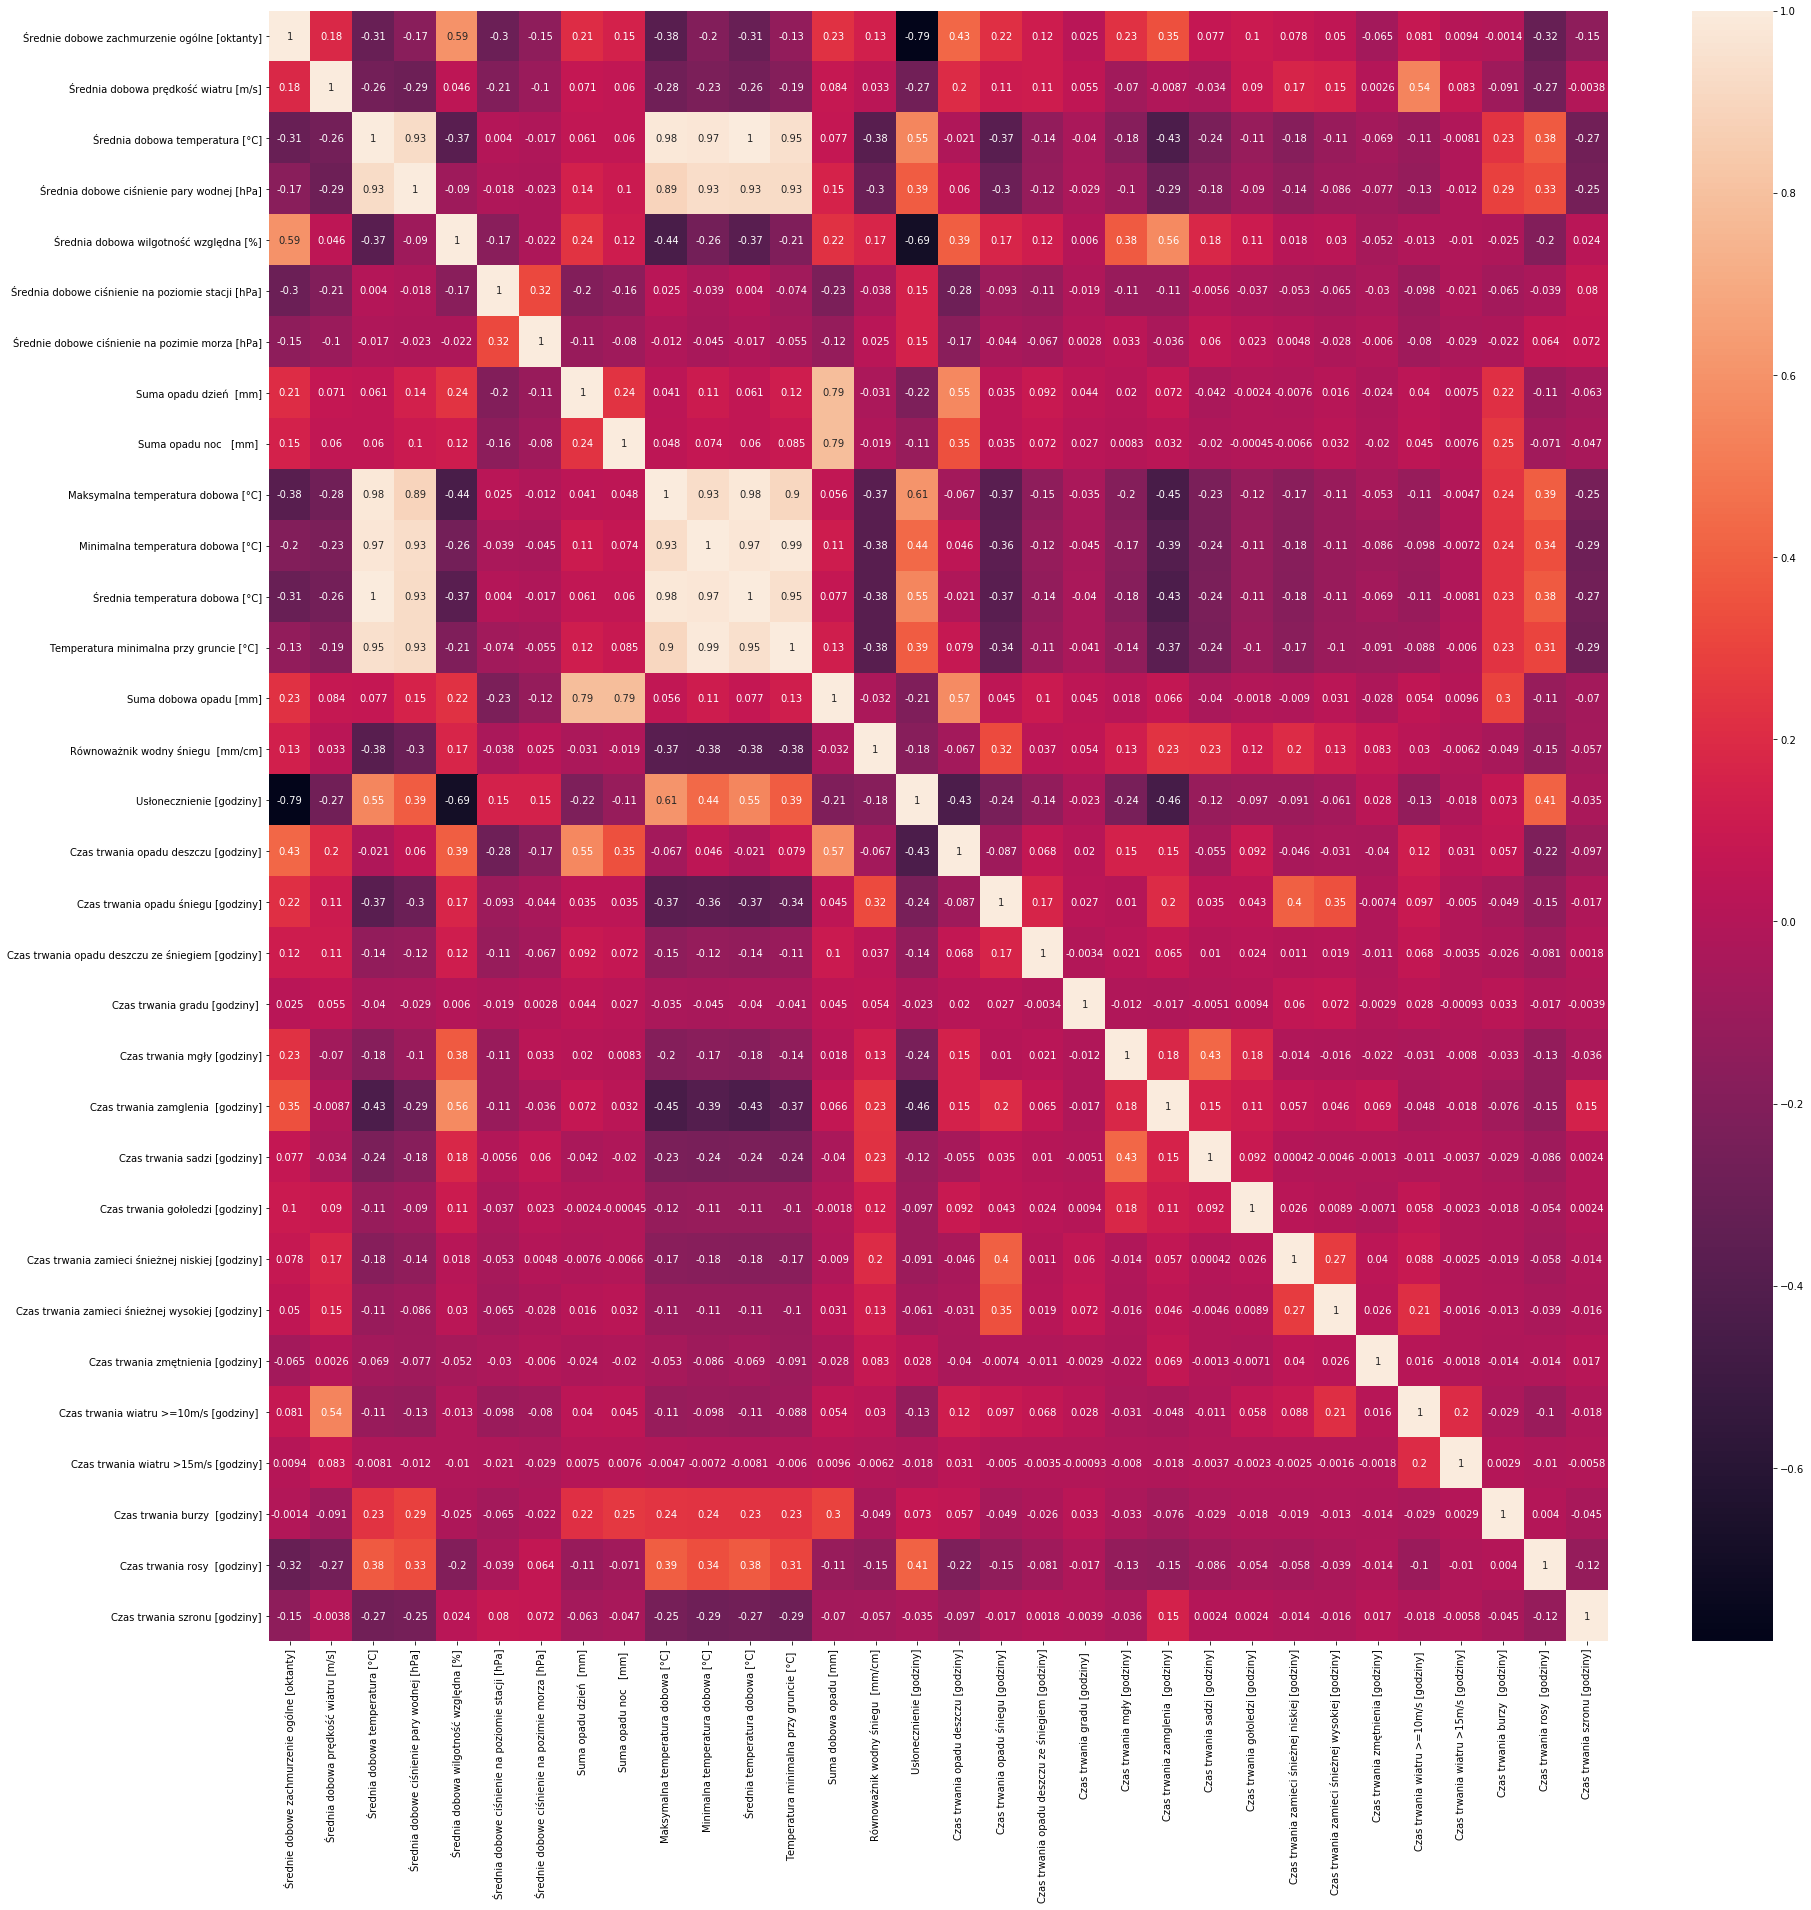

In [23]:
fig, ax = plt.subplots(figsize=(30,30)) 
fig.patch.set_facecolor('xkcd:white')
sns.heatmap(data_df.select_dtypes(include=['float64']).corr(), annot=True, ax=ax)

### Columny które mają pozytywna kowarincje zmieniają się w jednym kierunku

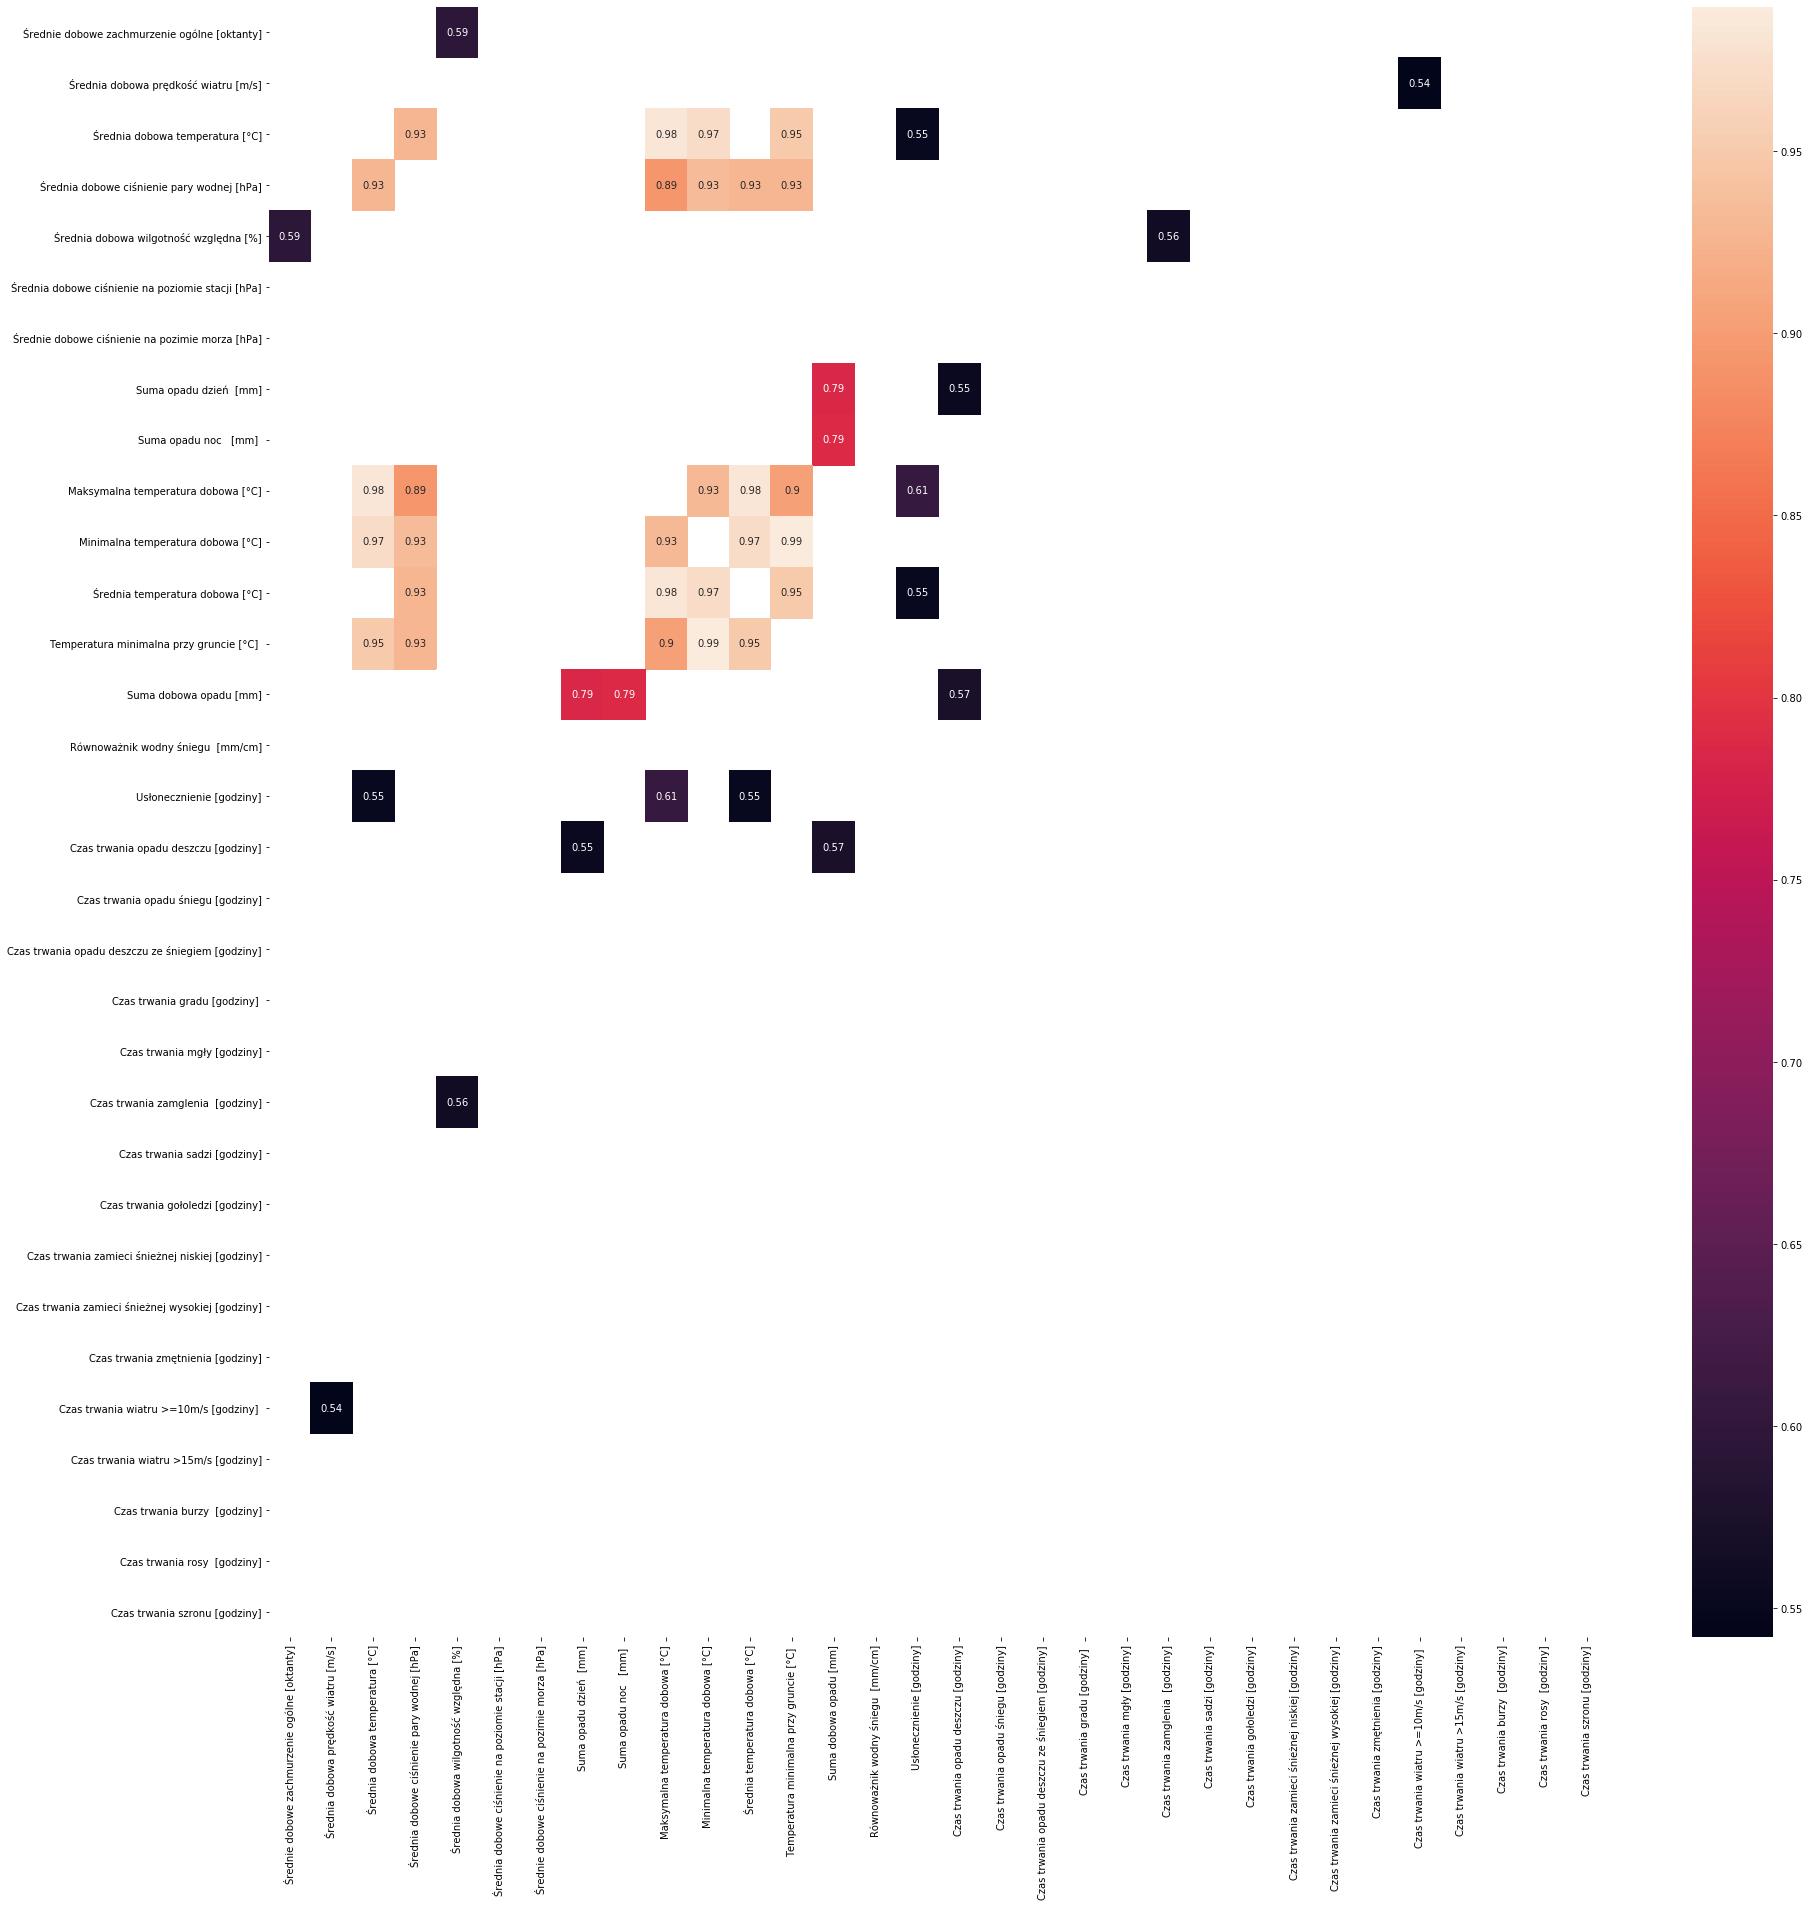

In [24]:
fig, ax = plt.subplots(figsize=(30,30))
fig.patch.set_facecolor('xkcd:white')
sns.heatmap(data_df.select_dtypes(include=['float64']).corr()[(data_df.select_dtypes(include=['float64']).corr() >= 0.5) &\
                                                             (data_df.select_dtypes(include=['float64']).corr() < 1)],\
            annot=True, ax=ax)

### Columny które mają negatywną kowariancje zmieniają się w odwrotnych kierunkach

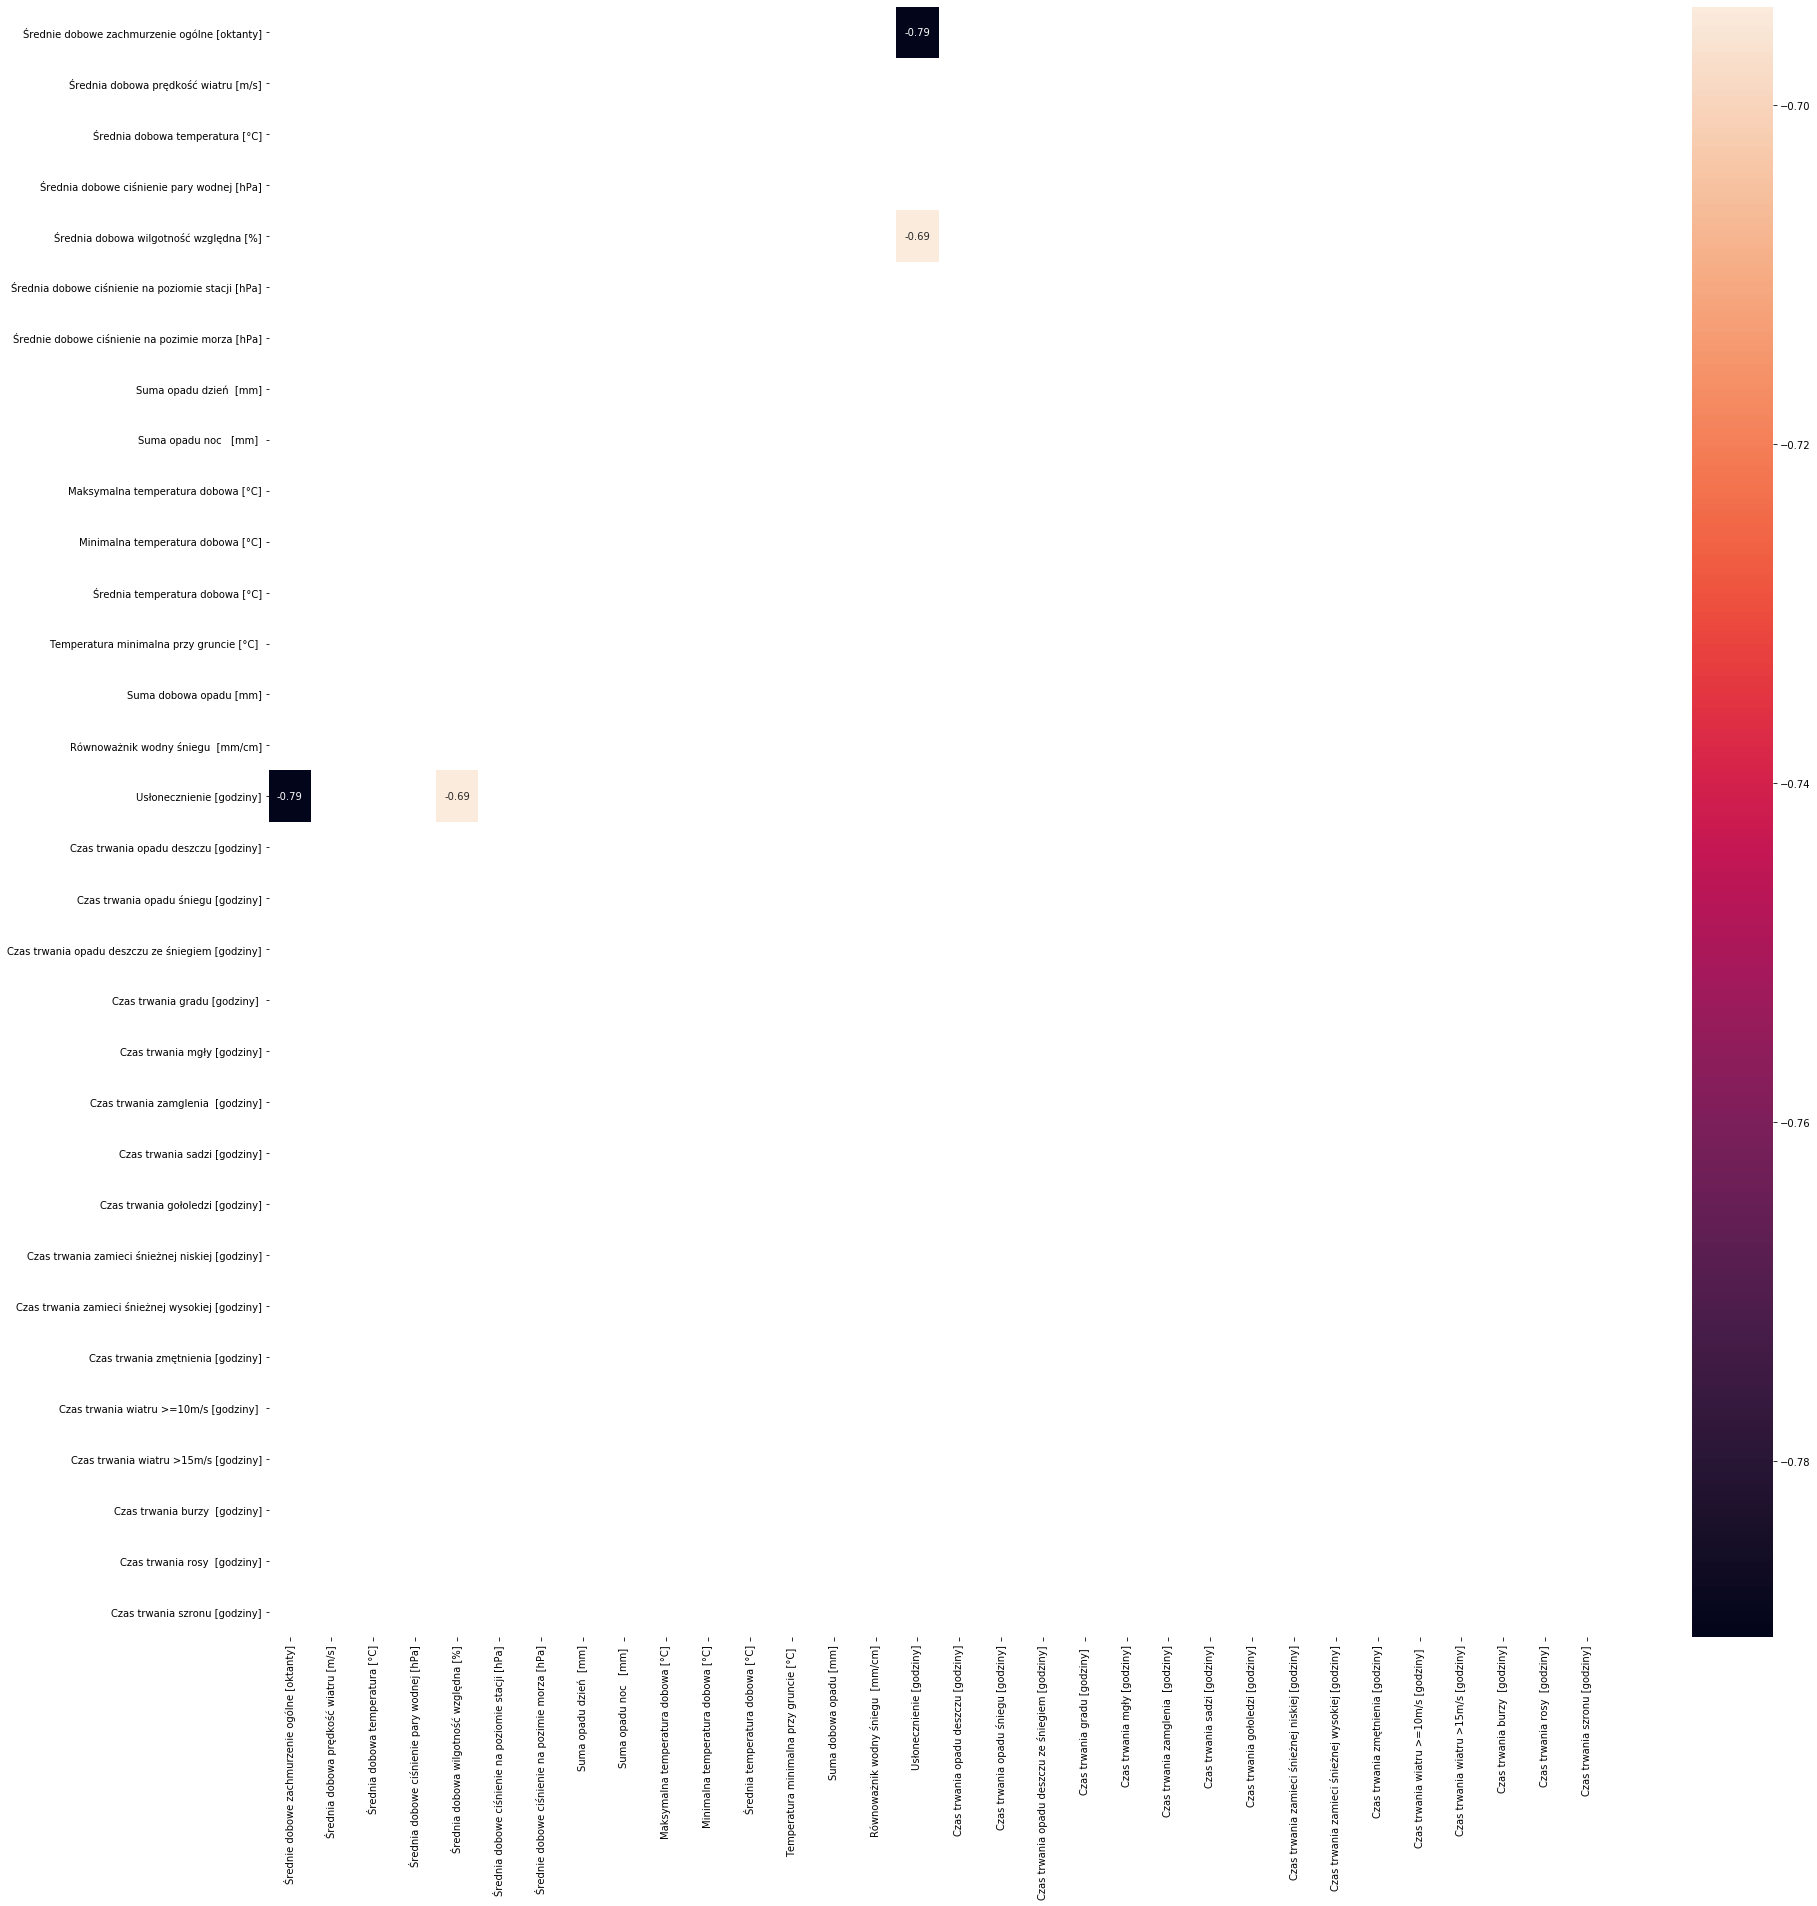

In [25]:
fig, ax = plt.subplots(figsize=(30,30))
fig.patch.set_facecolor('xkcd:white')
sns.heatmap(data_df.select_dtypes(include=['float64']).corr()[(data_df.select_dtypes(include=['float64']).corr() < -0.5) &\
                                                             (data_df.select_dtypes(include=['float64']).corr() > -1)],\
            annot=True, ax=ax)

### Jak można zobaczyć z macierzy korelacji: korelują pomiedzy sobą columny z jednego zakresu np.Temperatura, suma Opadów i td. Korelacja pomiedzy wartosciami z różnych kategorji jest śriednia nawet pomiędzy nasłonecznieniem a temperaturą. W przypadku negatywnej korelacji to ona wystemuje dla kategorii które są "oczywiste", naprzykład: naslonecznienie i zachmurzenie a także pokazuje zależność zachmurzenia od wysokości ciśnienia ciśnienia

In [26]:
filtered = [col for col in data_df if col.lower()[:4] != 'czas']
data_df = data_df[filtered]

In [27]:
data_df.describe()

Rok      Miesiac        Dzien  \
count  5098.000000  5098.000000  5098.000000   
mean   2016.000000     6.539427    15.766183   
std       1.999804     3.441218     8.777427   
min    2013.000000     1.000000     1.000000   
25%    2014.000000     4.000000     8.000000   
50%    2016.000000     7.000000    16.000000   
75%    2018.000000    10.000000    23.000000   
max    2019.000000    12.000000    31.000000   

       Średnie dobowe zachmurzenie ogólne [oktanty]  \
count                                   5098.000000   
mean                                       5.316065   
std                                        2.022688   
min                                        0.000000   
25%                                        4.000000   
50%                                        5.800000   
75%                                        6.900000   
max                                        8.000000   

       Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
count                           5098.000000                      5098.000000   
mean                               4.097646                         8.850059   
std                                1.539117                         7.754901   
min                                0.000000                       -15.800000   
25%                                3.000000                         2.900000   
50%                                3.900000                         8.600000   
75%                                5.000000                        15.400000   
max                               12.100000                        27.600000   

       Średnia dobowe ciśnienie pary wodnej [hPa]  \
count                                 5098.000000   
mean                                     9.847097   
std                                      4.472411   
min                                      0.000000   
25%                                      6.300000   
50%                                      9.000000   
75%                                     13.100000   
max                                     25.300000   

       Średnia dobowa wilgotność względna [%]  \
count                             5098.000000   
mean                                80.298823   
std                                 11.636467   
min                                  0.000000   
25%                                 72.800000   
50%                                 81.600000   
75%                                 89.400000   
max                                100.000000   

       Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
count                                        5098.000000   
mean                                         1003.868949   
std                                            13.713862   
min                                           953.500000   
25%                                           993.300000   
50%                                          1004.100000   
75%                                          1014.700000   
max                                          1042.000000   

       Średnie dobowe ciśnienie na pozimie morza [hPa]  \
count                                      5098.000000   
mean                                       1015.187387   
std                                          16.796928   
min                                           0.000000   
25%                                        1010.100000   
50%                                        1015.600000   
75%                                        1021.000000   
max                                        1043.500000   

       Suma opadu dzień  [mm]  Suma opadu noc   [mm]   \
count             5098.000000             5098.000000   
mean                 0.892291                0.829835   
std                  2.743678                2.755386   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000          

In [28]:
data_df.drop(columns = ["Równoważnik wodny śniegu  [mm/cm]", "Wystąpienie pokrywy śnieżnej  [0/1]", "Wysokość pokrywy śnieżnej [cm] ",\
                        "Wystąpienie błyskawicy  [0/1]", "Izoterma dolna  [cm] ", "Izoterma górna [cm] ", "Aktynometria  [J/cm2]",\
                        "Suma opadu dzień  [mm]", "Suma opadu noc   [mm] "], inplace = True)

### USUWAMY:
1. kolumny dotyczące śniegu poniważ dotyczą tylko zimu i są raczej efektem pobocznym opadów
2. kolumny dotyczące izotermy poniważ są wynnikiem temperatury dobowej
3. temperaturu sumu temperatur dla Dnia i Nocy poniważ korzystamy z dobowej temperatury
4. Wszystkie kolumny które mają w nazwie czas opróc uslonecznienia ponieważ w większości swojej mają wartość 0 za rzadkimi wyjątkami.
5. Wystąpienie blyskawicy, poniważ zjawisko dość rzadke
6. Aktynometrie ponieważ większość wpisów są 0

In [29]:
data_df.describe()

Rok      Miesiac        Dzien  \
count  5098.000000  5098.000000  5098.000000   
mean   2016.000000     6.539427    15.766183   
std       1.999804     3.441218     8.777427   
min    2013.000000     1.000000     1.000000   
25%    2014.000000     4.000000     8.000000   
50%    2016.000000     7.000000    16.000000   
75%    2018.000000    10.000000    23.000000   
max    2019.000000    12.000000    31.000000   

       Średnie dobowe zachmurzenie ogólne [oktanty]  \
count                                   5098.000000   
mean                                       5.316065   
std                                        2.022688   
min                                        0.000000   
25%                                        4.000000   
50%                                        5.800000   
75%                                        6.900000   
max                                        8.000000   

       Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
count                           5098.000000                      5098.000000   
mean                               4.097646                         8.850059   
std                                1.539117                         7.754901   
min                                0.000000                       -15.800000   
25%                                3.000000                         2.900000   
50%                                3.900000                         8.600000   
75%                                5.000000                        15.400000   
max                               12.100000                        27.600000   

       Średnia dobowe ciśnienie pary wodnej [hPa]  \
count                                 5098.000000   
mean                                     9.847097   
std                                      4.472411   
min                                      0.000000   
25%                                      6.300000   
50%                                      9.000000   
75%                                     13.100000   
max                                     25.300000   

       Średnia dobowa wilgotność względna [%]  \
count                             5098.000000   
mean                                80.298823   
std                                 11.636467   
min                                  0.000000   
25%                                 72.800000   
50%                                 81.600000   
75%                                 89.400000   
max                                100.000000   

       Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
count                                        5098.000000   
mean                                         1003.868949   
std                                            13.713862   
min                                           953.500000   
25%                                           993.300000   
50%                                          1004.100000   
75%                                          1014.700000   
max                                          1042.000000   

       Średnie dobowe ciśnienie na pozimie morza [hPa]  \
count                                      5098.000000   
mean                                       1015.187387   
std                                          16.796928   
min                                           0.000000   
25%                                        1010.100000   
50%                                        1015.600000   
75%                                        1021.000000   
max                                        1043.500000   

       Maksymalna temperatura dobowa [°C]  Minimalna temperatura dobowa [°C]  \
count                         5098.000000                        5098.000000   
mean                            12.382601                           5.756277   
std                              8.823549                           7.147236   
min                            -13.300000                    

In [30]:
data_df.reset_index(drop=True, inplace=True)

### Wydruki kolumn które mogły by mieć zależność liniową. Jak widać niektóre kolumny mogą być predykowane  regresją liniawą z użyciem malego wielomianu

In [31]:
data_df = data_df.replace(' NaN', np.NaN)

In [32]:

imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(data_df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

### Uzupelnienie wartości pustych wg wartości dominującej dla zmniejszenie wpluwu na mediane datasetu

In [33]:
typed_df = data_df

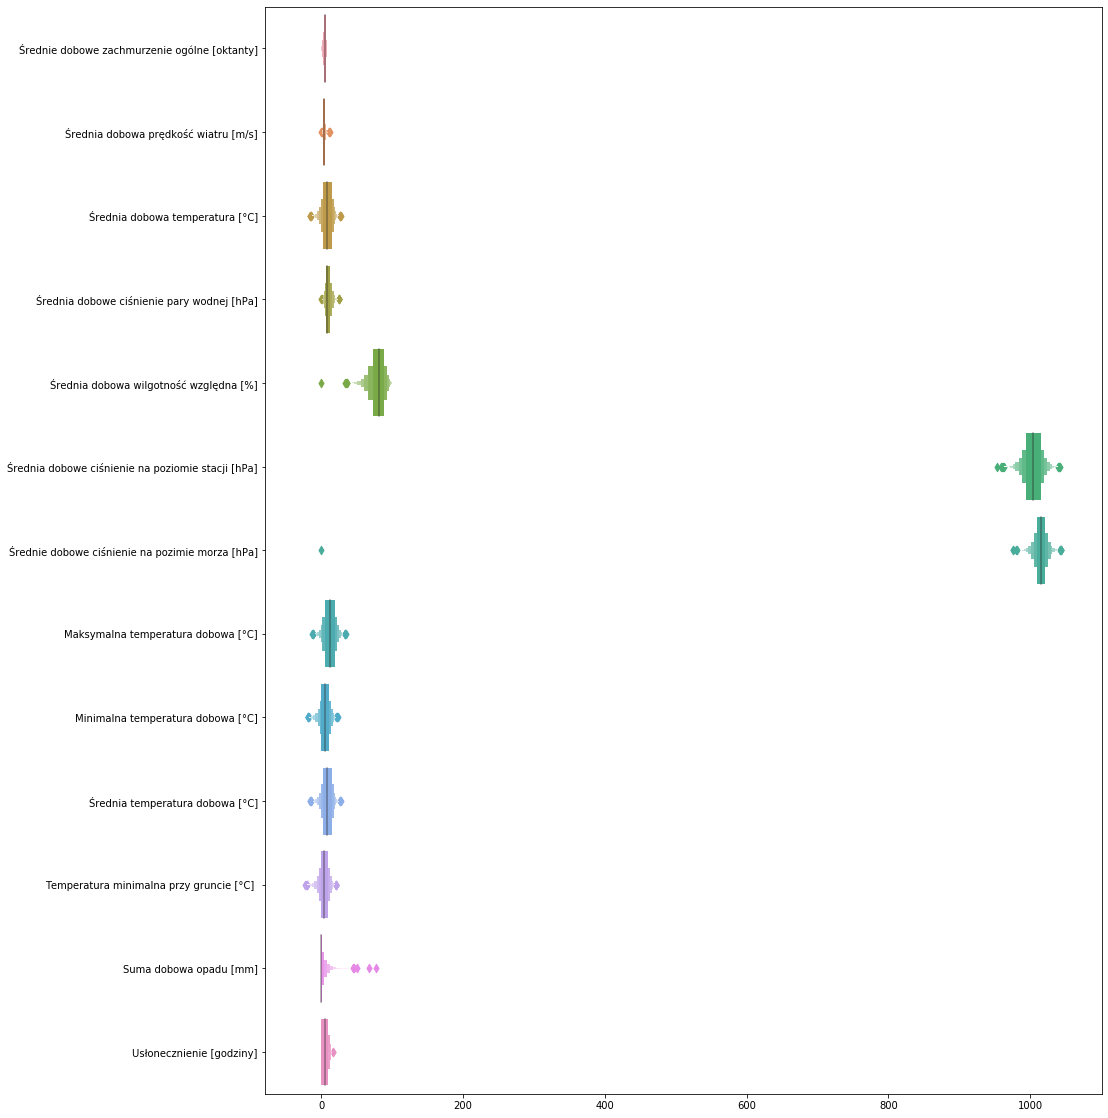

In [34]:
fig, ax = plt.subplots(figsize=(15,20))
ax = sns.boxenplot(orient="h", data=typed_df.select_dtypes(include=['float64']))

In [35]:
for column in typed_df.select_dtypes(include=['float64']).columns:
    whisker_width = 1.5
    q1 = typed_df[column].quantile(0.25)
    q3 = typed_df[column].quantile(0.75)
    iqr = q3 - q1
    top = q3 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    typed_df[column] = np.where(typed_df[column]>top, top, typed_df[column])
    typed_df[column] = np.where(typed_df[column]<bottom, bottom, typed_df[column])
#     mask = (pulsars[column] >= q1 - whisker_widthiqr) & (pulsars[column] <= q3 + whisker_widthiqr)
#     pulsars = pulsars.loc[mask]

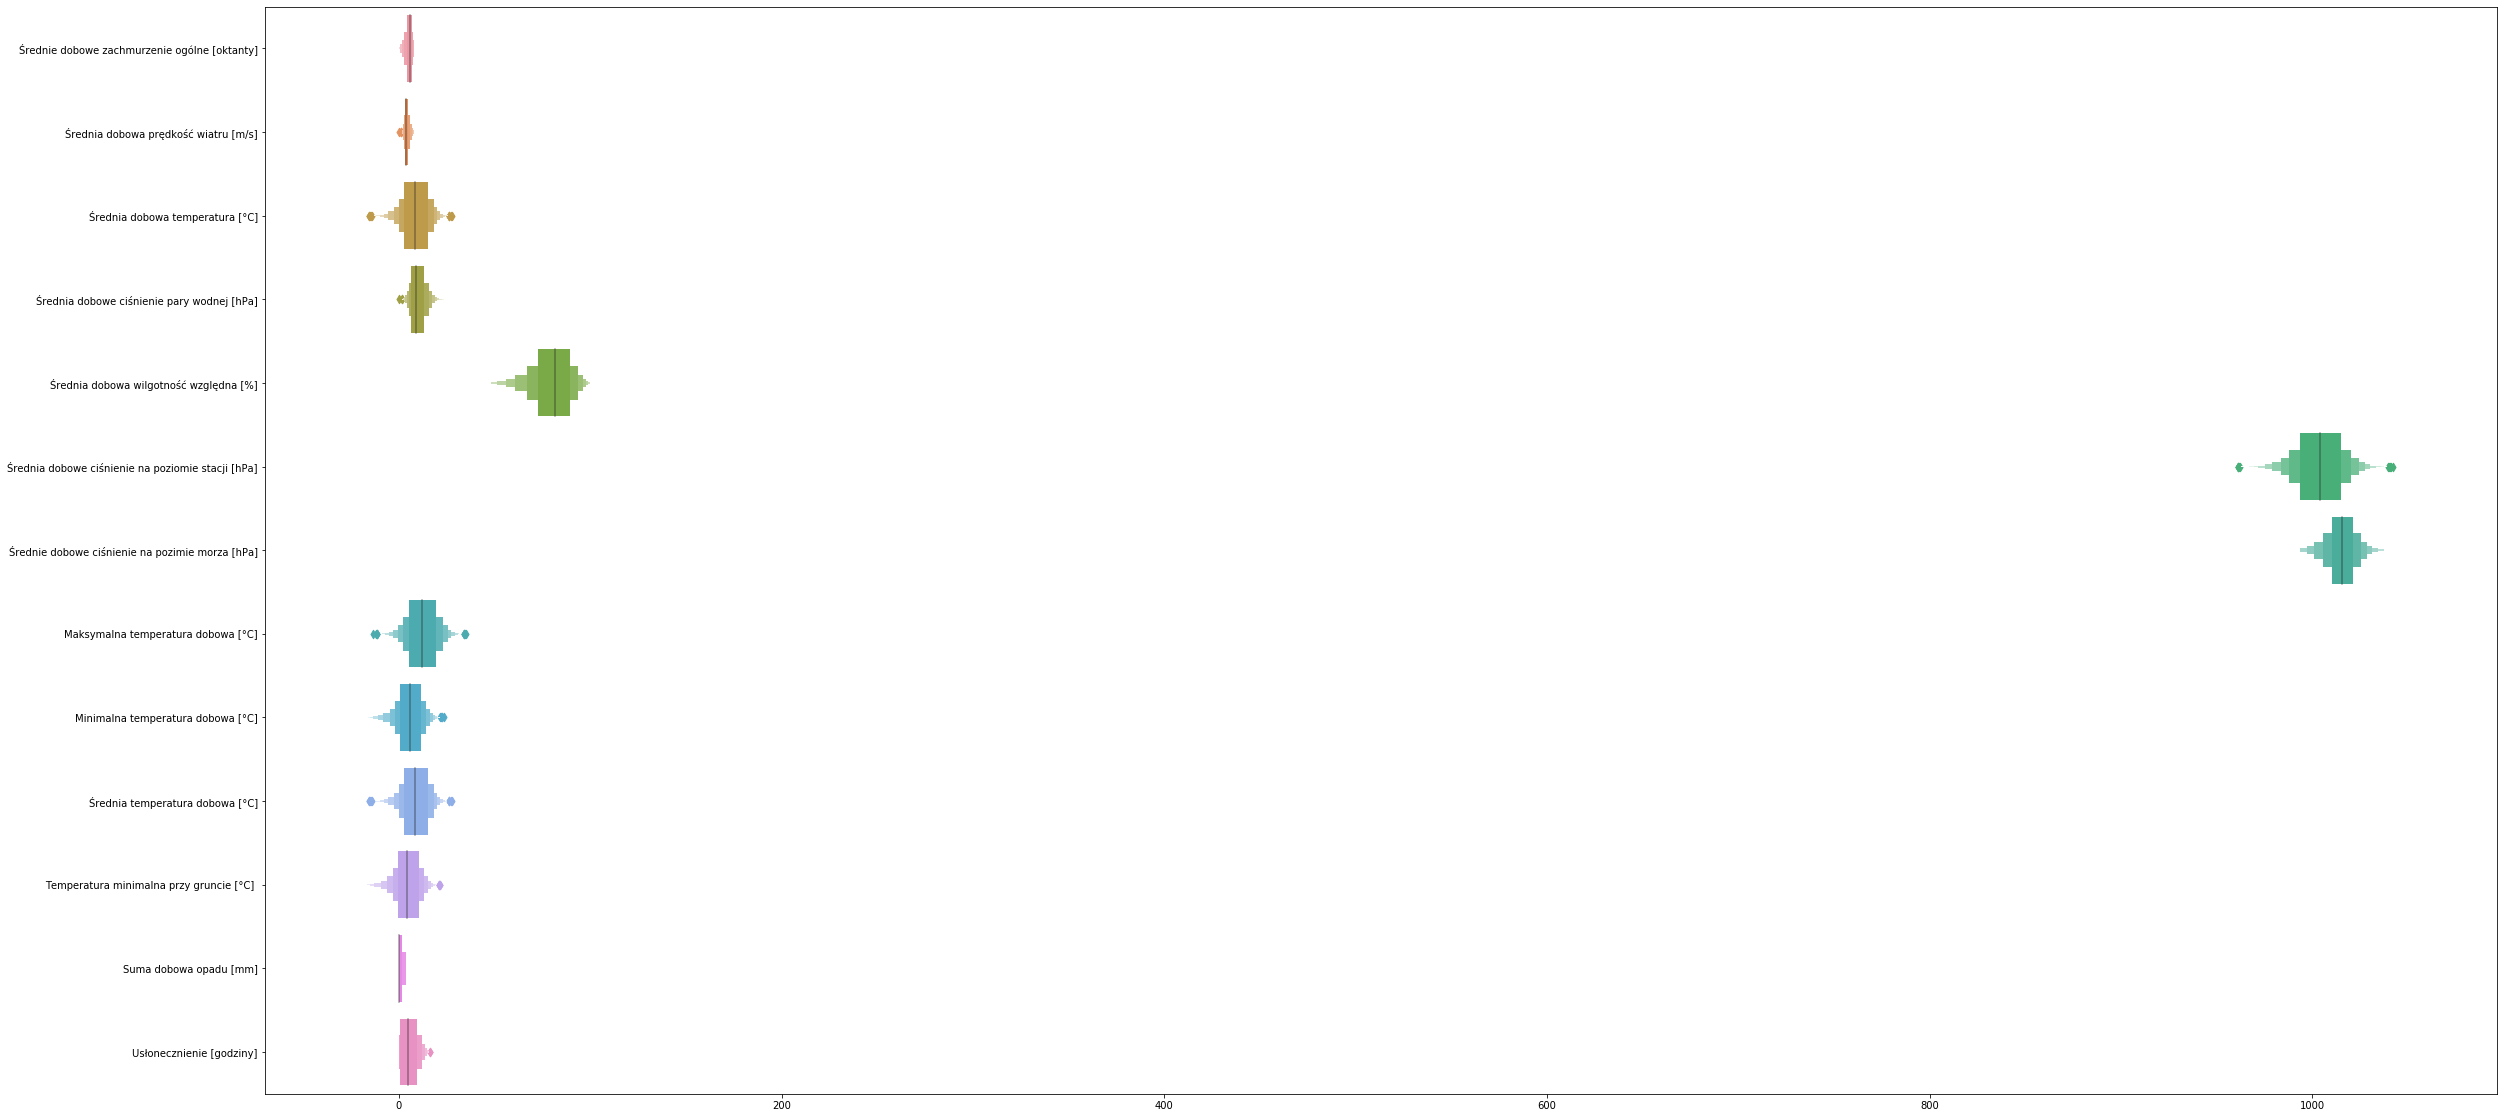

In [36]:
fig, ax = plt.subplots(figsize=(40,20))
ax = sns.boxenplot(orient="h", data=typed_df.select_dtypes(include=['float64']))

### Usunięcie wartości wychodzących poza zakres 

In [37]:
columns, values = typed_df.select_dtypes(include=['float64']).columns, typed_df.select_dtypes(include=['float64']).values

min_max_scaler = MinMaxScaler()
values_scaled = min_max_scaler.fit_transform(values)

dataset = typed_df.drop(columns = columns)

for i, column in enumerate(columns):
    typed_df[column] = values_scaled.T[i]

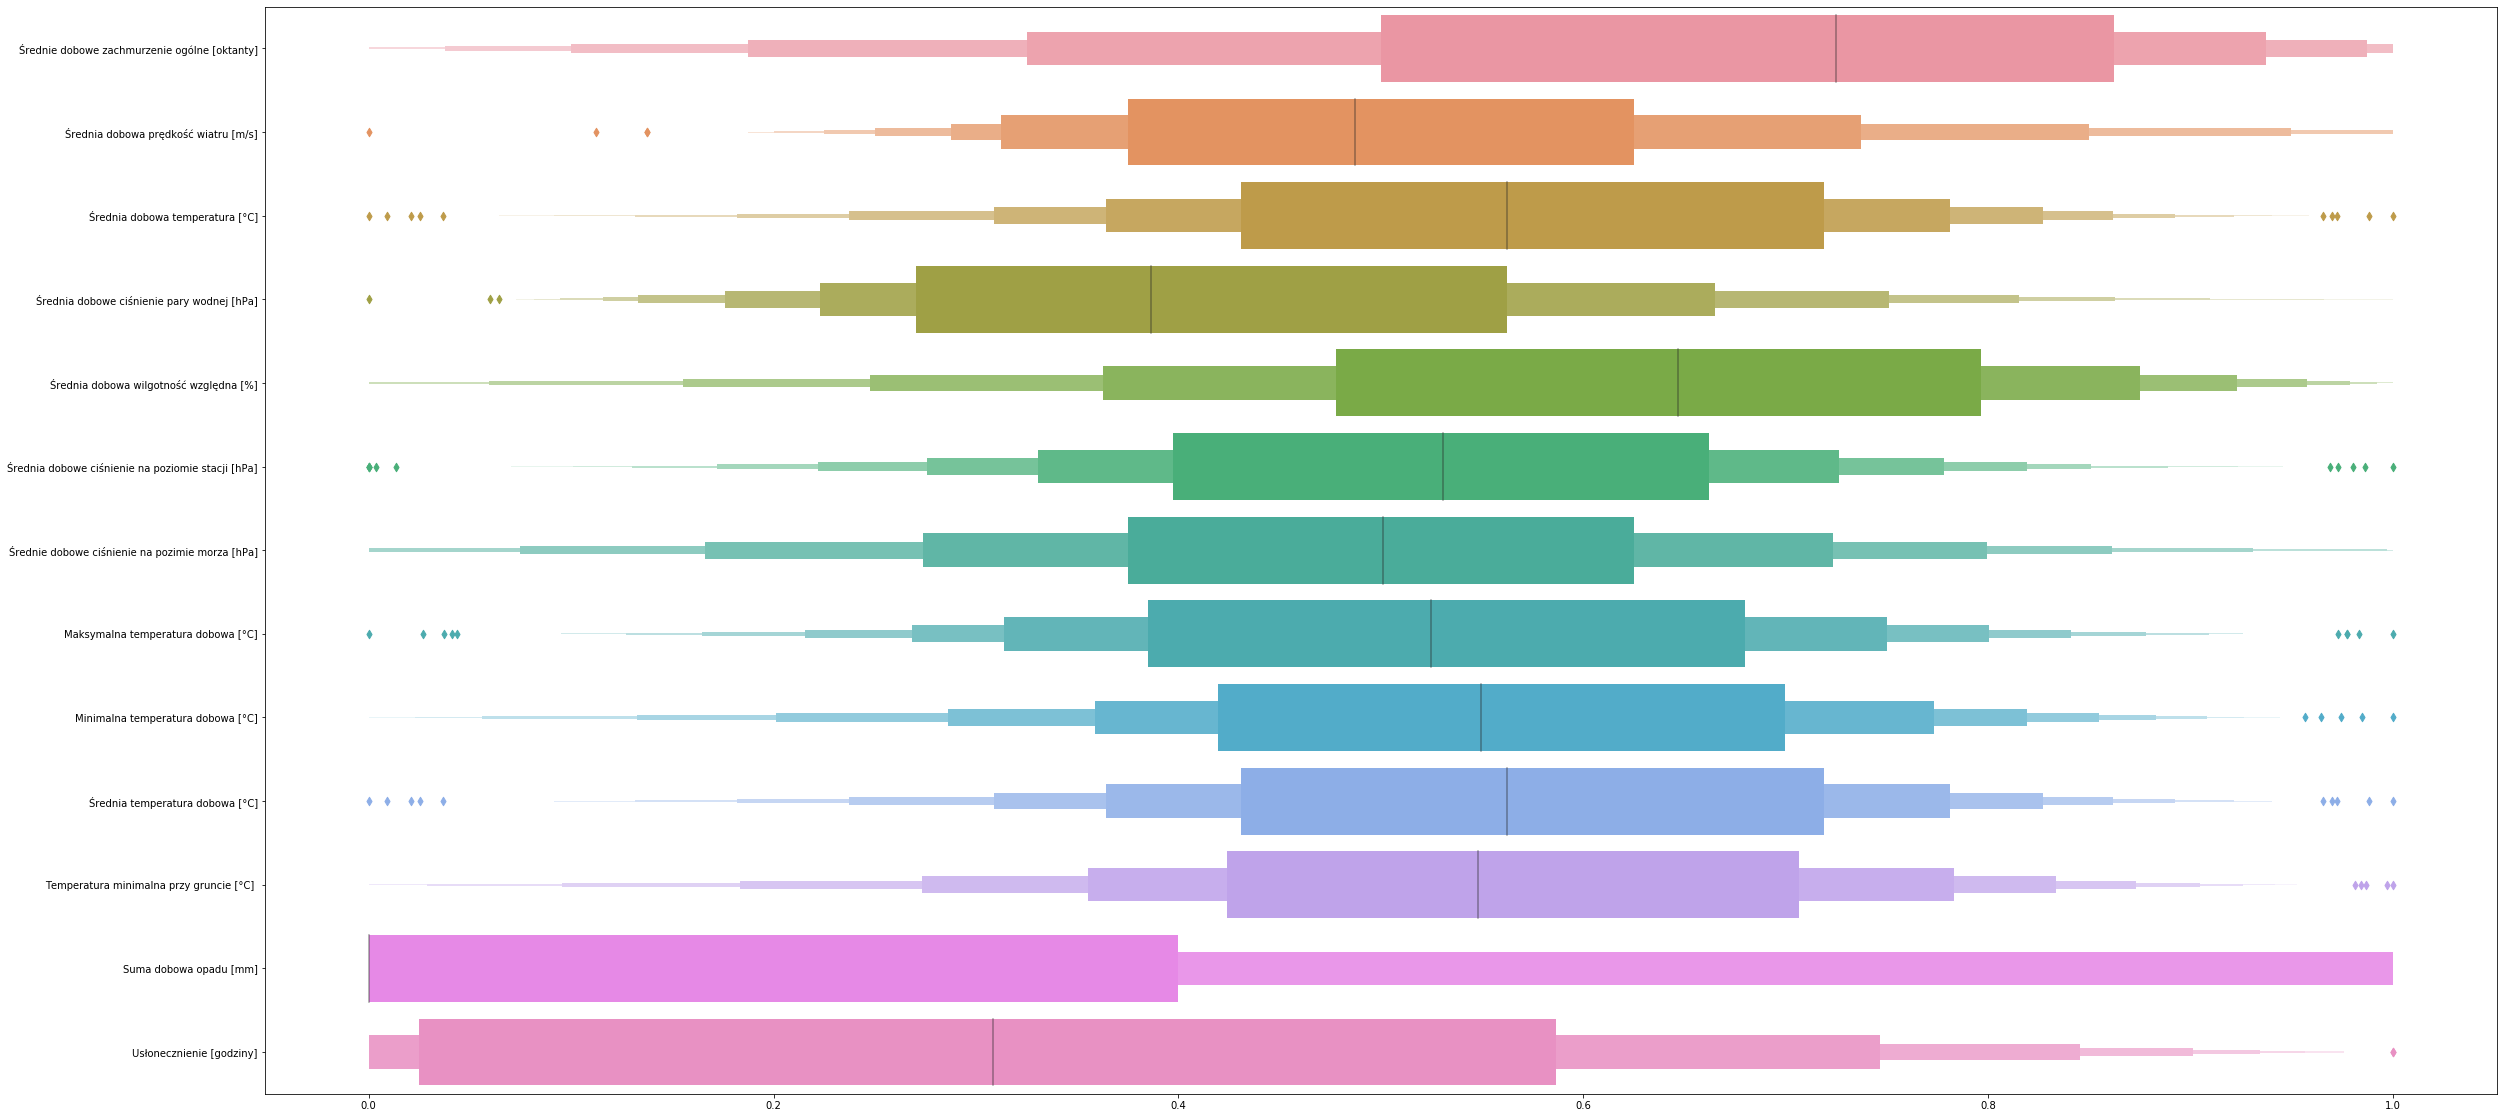

In [38]:
fig, ax = plt.subplots(figsize=(40,20))
ax = sns.boxenplot(orient="h", data=typed_df.select_dtypes(include=['float64']))

In [39]:
typed_df

Rok  Miesiac  Dzien  Średnie dobowe zachmurzenie ogólne [oktanty]  \
0     2013        1      2                                        0.9250   
1     2013        1      3                                        0.9125   
2     2013        1      4                                        0.4250   
3     2013        1      5                                        0.6125   
4     2013        1      6                                        0.8250   
...    ...      ...    ...                                           ...   
5093  2019       12     27                                        0.8500   
5094  2019       12     28                                        0.8625   
5095  2019       12     29                                        0.8875   
5096  2019       12     30                                        0.8125   
5097  2019       12     31                                        0.8625   

      Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                                   0.4750                         0.437788   
1                                   0.7625                         0.472350   
2                                   0.7875                         0.490783   
3                                   0.6625                         0.440092   
4                                   0.4125                         0.396313   
...                                    ...                              ...   
5093                                0.4750                         0.382488   
5094                                0.6625                         0.352535   
5095                                0.5625                         0.341014   
5096                                1.0000                         0.396313   
5097                                0.8000                         0.456221   

      Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                       0.326180   
1                                       0.356223   
2                                       0.347639   
3                                       0.287554   
4                                       0.261803   
...                                          ...   
5093                                    0.261803   
5094                                    0.210300   
5095                                    0.223176   
5096                                    0.188841   
5097                                    0.270386   

      Średnia dobowa wilgotność względna [%]  \
0                                   0.973129   
1                                   0.952015   
2                                   0.794626   
3                                   0.738964   
4                                   0.809981   
...                                      ...   
5093                                0.875240   
5094                                0.666027   
5095                                0.838772   
5096                                0.345489   
5097                                0.570058   

      Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                              0.613861   
1                                              0.626238   
2                                              0.653465   
3                                              0.733911   
4                                              0.730198   
...                                                 ...   
5093                                           0.486386   
5094                                           0.628713   
5095                                           0.643564   
5096                                           0.461634   
5097                                           0.398515   

      Średnie dobowe ciśnienie na pozimie morza [hPa]  \
0                                            0.416284   
1                                            0.439220   
2                                            0.489679   
3     

In [40]:
for column in typed_df.select_dtypes(include=['int64']).columns:
    typed_df[column] = typed_df.astype("category")

In [41]:
dataset = pd.get_dummies(typed_df)

In [42]:
dataset.describe()

Średnie dobowe zachmurzenie ogólne [oktanty]  \
count                                   5098.000000   
mean                                       0.664508   
std                                        0.252836   
min                                        0.000000   
25%                                        0.500000   
50%                                        0.725000   
75%                                        0.862500   
max                                        1.000000   

       Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
count                           5098.000000                      5098.000000   
mean                               0.509813                         0.567974   
std                                0.184708                         0.178684   
min                                0.000000                         0.000000   
25%                                0.375000                         0.430876   
50%                                0.487500                         0.562212   
75%                                0.625000                         0.718894   
max                                1.000000                         1.000000   

       Średnia dobowe ciśnienie pary wodnej [hPa]  \
count                                 5098.000000   
mean                                     0.422520   
std                                      0.191626   
min                                      0.000000   
25%                                      0.270386   
50%                                      0.386266   
75%                                      0.562232   
max                                      1.000000   

       Średnia dobowa wilgotność względna [%]  \
count                             5098.000000   
mean                                 0.622897   
std                                  0.219786   
min                                  0.000000   
25%                                  0.477927   
50%                                  0.646833   
75%                                  0.796545   
max                                  1.000000   

       Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
count                                        5098.000000   
mean                                            0.528110   
std                                             0.169629   
min                                             0.000000   
25%                                             0.397277   
50%                                             0.530941   
75%                                             0.662129   
max                                             1.000000   

       Średnie dobowe ciśnienie na pozimie morza [hPa]  \
count                                      5098.000000   
mean                                          0.497206   
std                                           0.199905   
min                                           0.000000   
25%                                           0.375000   
50%                                           0.501147   
75%                                           0.625000   
max                                           1.000000   

       Maksymalna temperatura dobowa [°C]  Minimalna temperatura dobowa [°C]  \
count                         5098.000000                        5098.000000   
mean                             0.530632                           0.553671   
std                              0.182305                           0.181622   
min                              0.000000                           0.000000   
25%                              0.384814                           0.419847   
50%                              0.524793                           0.549618   
75%                              0.679752                           0.699746   
max                              1.000000                           1.000000   

       Średnia temperatura dobowa [°C]  \
count                      5098.000000   
m

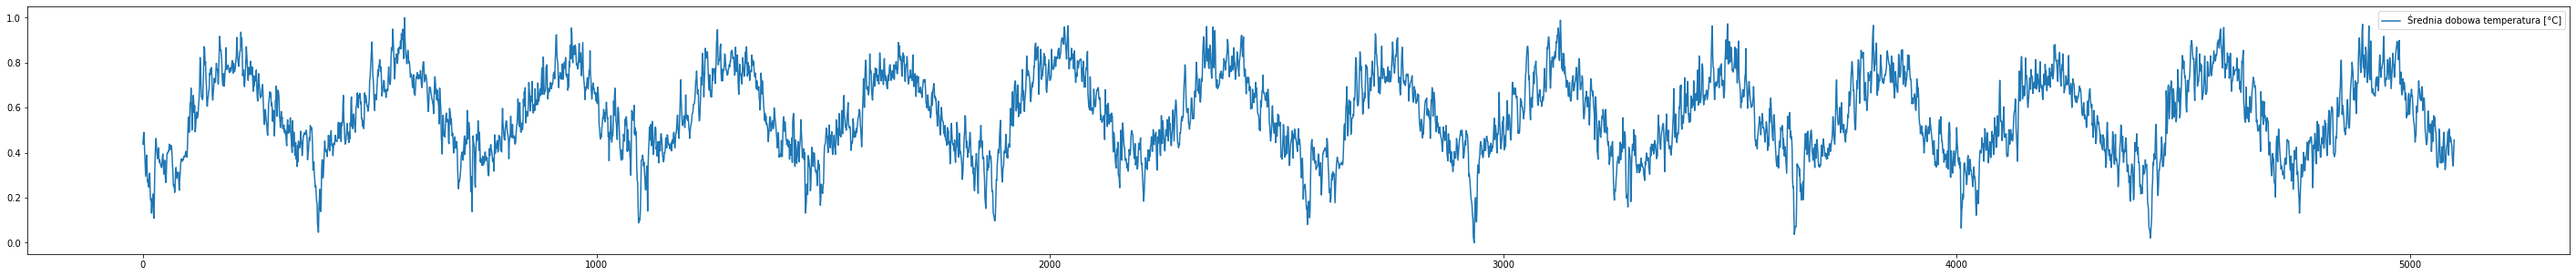

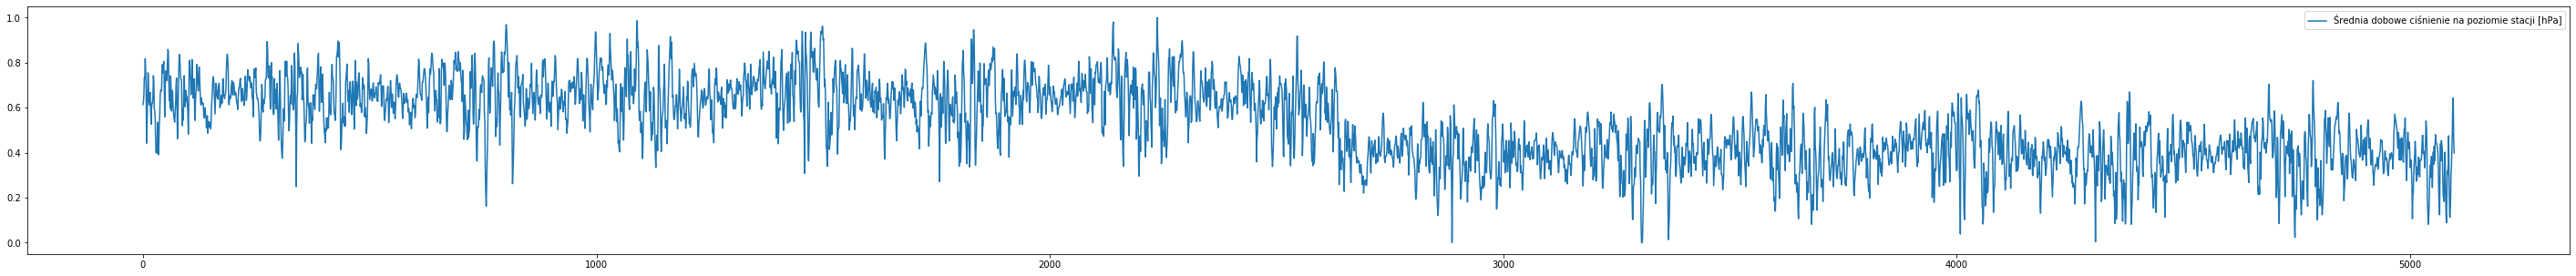

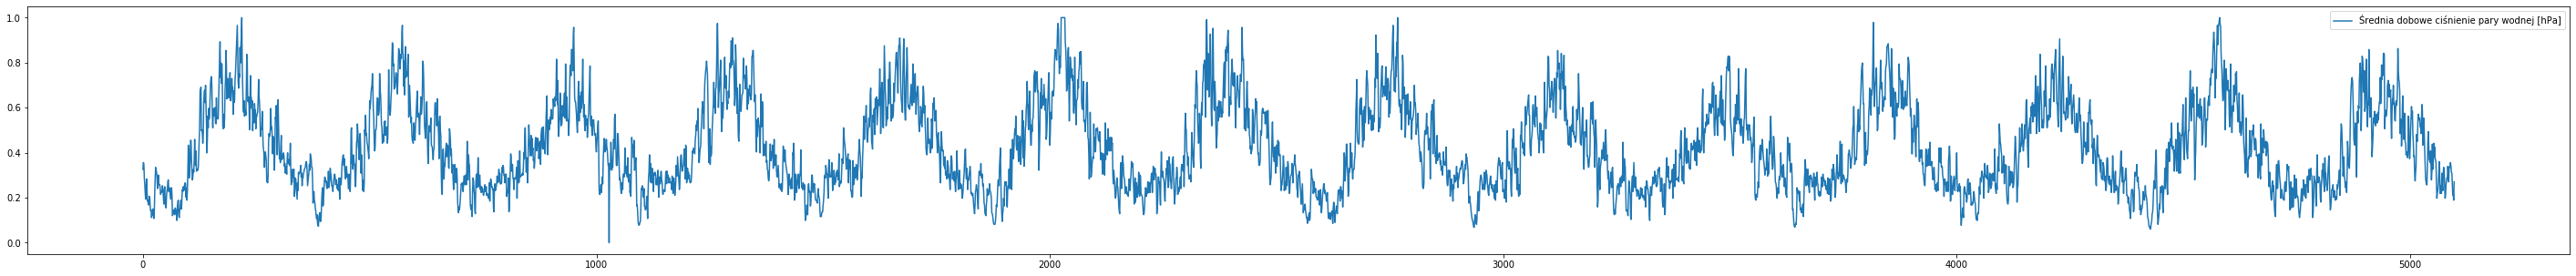

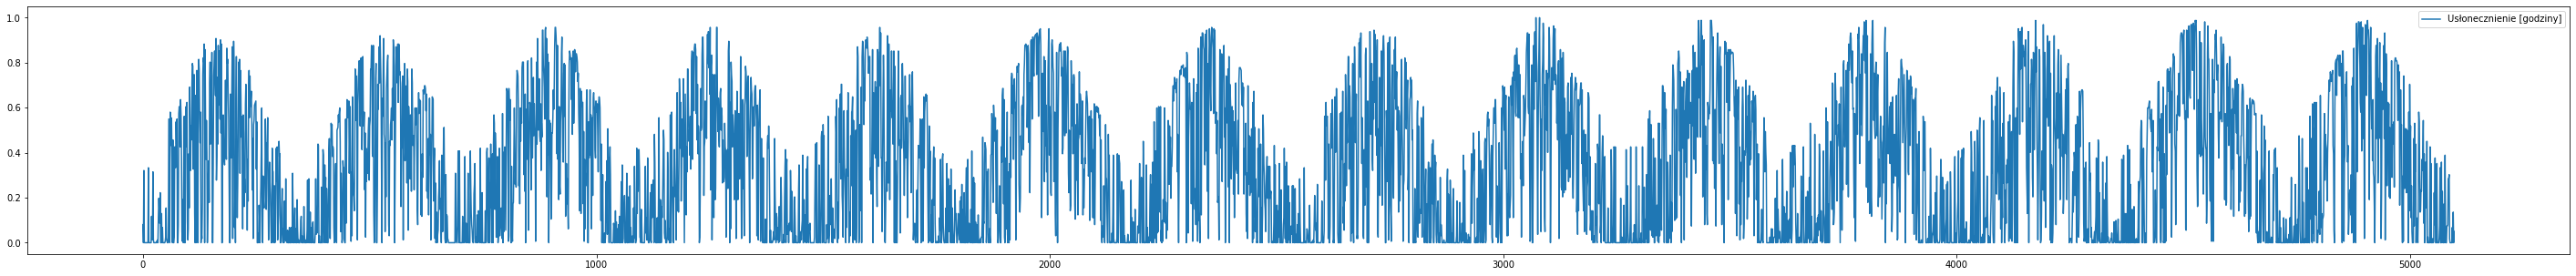

In [43]:
dataset.plot( y = ["Średnia dobowa temperatura [°C]"], figsize=(50, 5))
dataset.plot( y = ["Średnia dobowe ciśnienie na poziomie stacji [hPa]"], figsize=(50, 5))
dataset.plot( y = ["Średnia dobowe ciśnienie pary wodnej [hPa]"], figsize=(50, 5))
dataset.plot( y = ["Usłonecznienie [godziny]"], figsize=(50, 5))

### Ten wykres pokazuje że mozemy wykożystać regresje dla uzupelnienia podanych dannych ale miestety tego robić nie potrzebujemy.

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['Średnia dobowa temperatura [°C]'])

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset["Średnia dobowe ciśnienie na poziomie stacji [hPa]"])

### Po oczyszeniu datasetu możemy zobaczyć korelacje pomiędzy wartościami wraz z sprawdzeniem możliwości dopasowania regresji liniowej

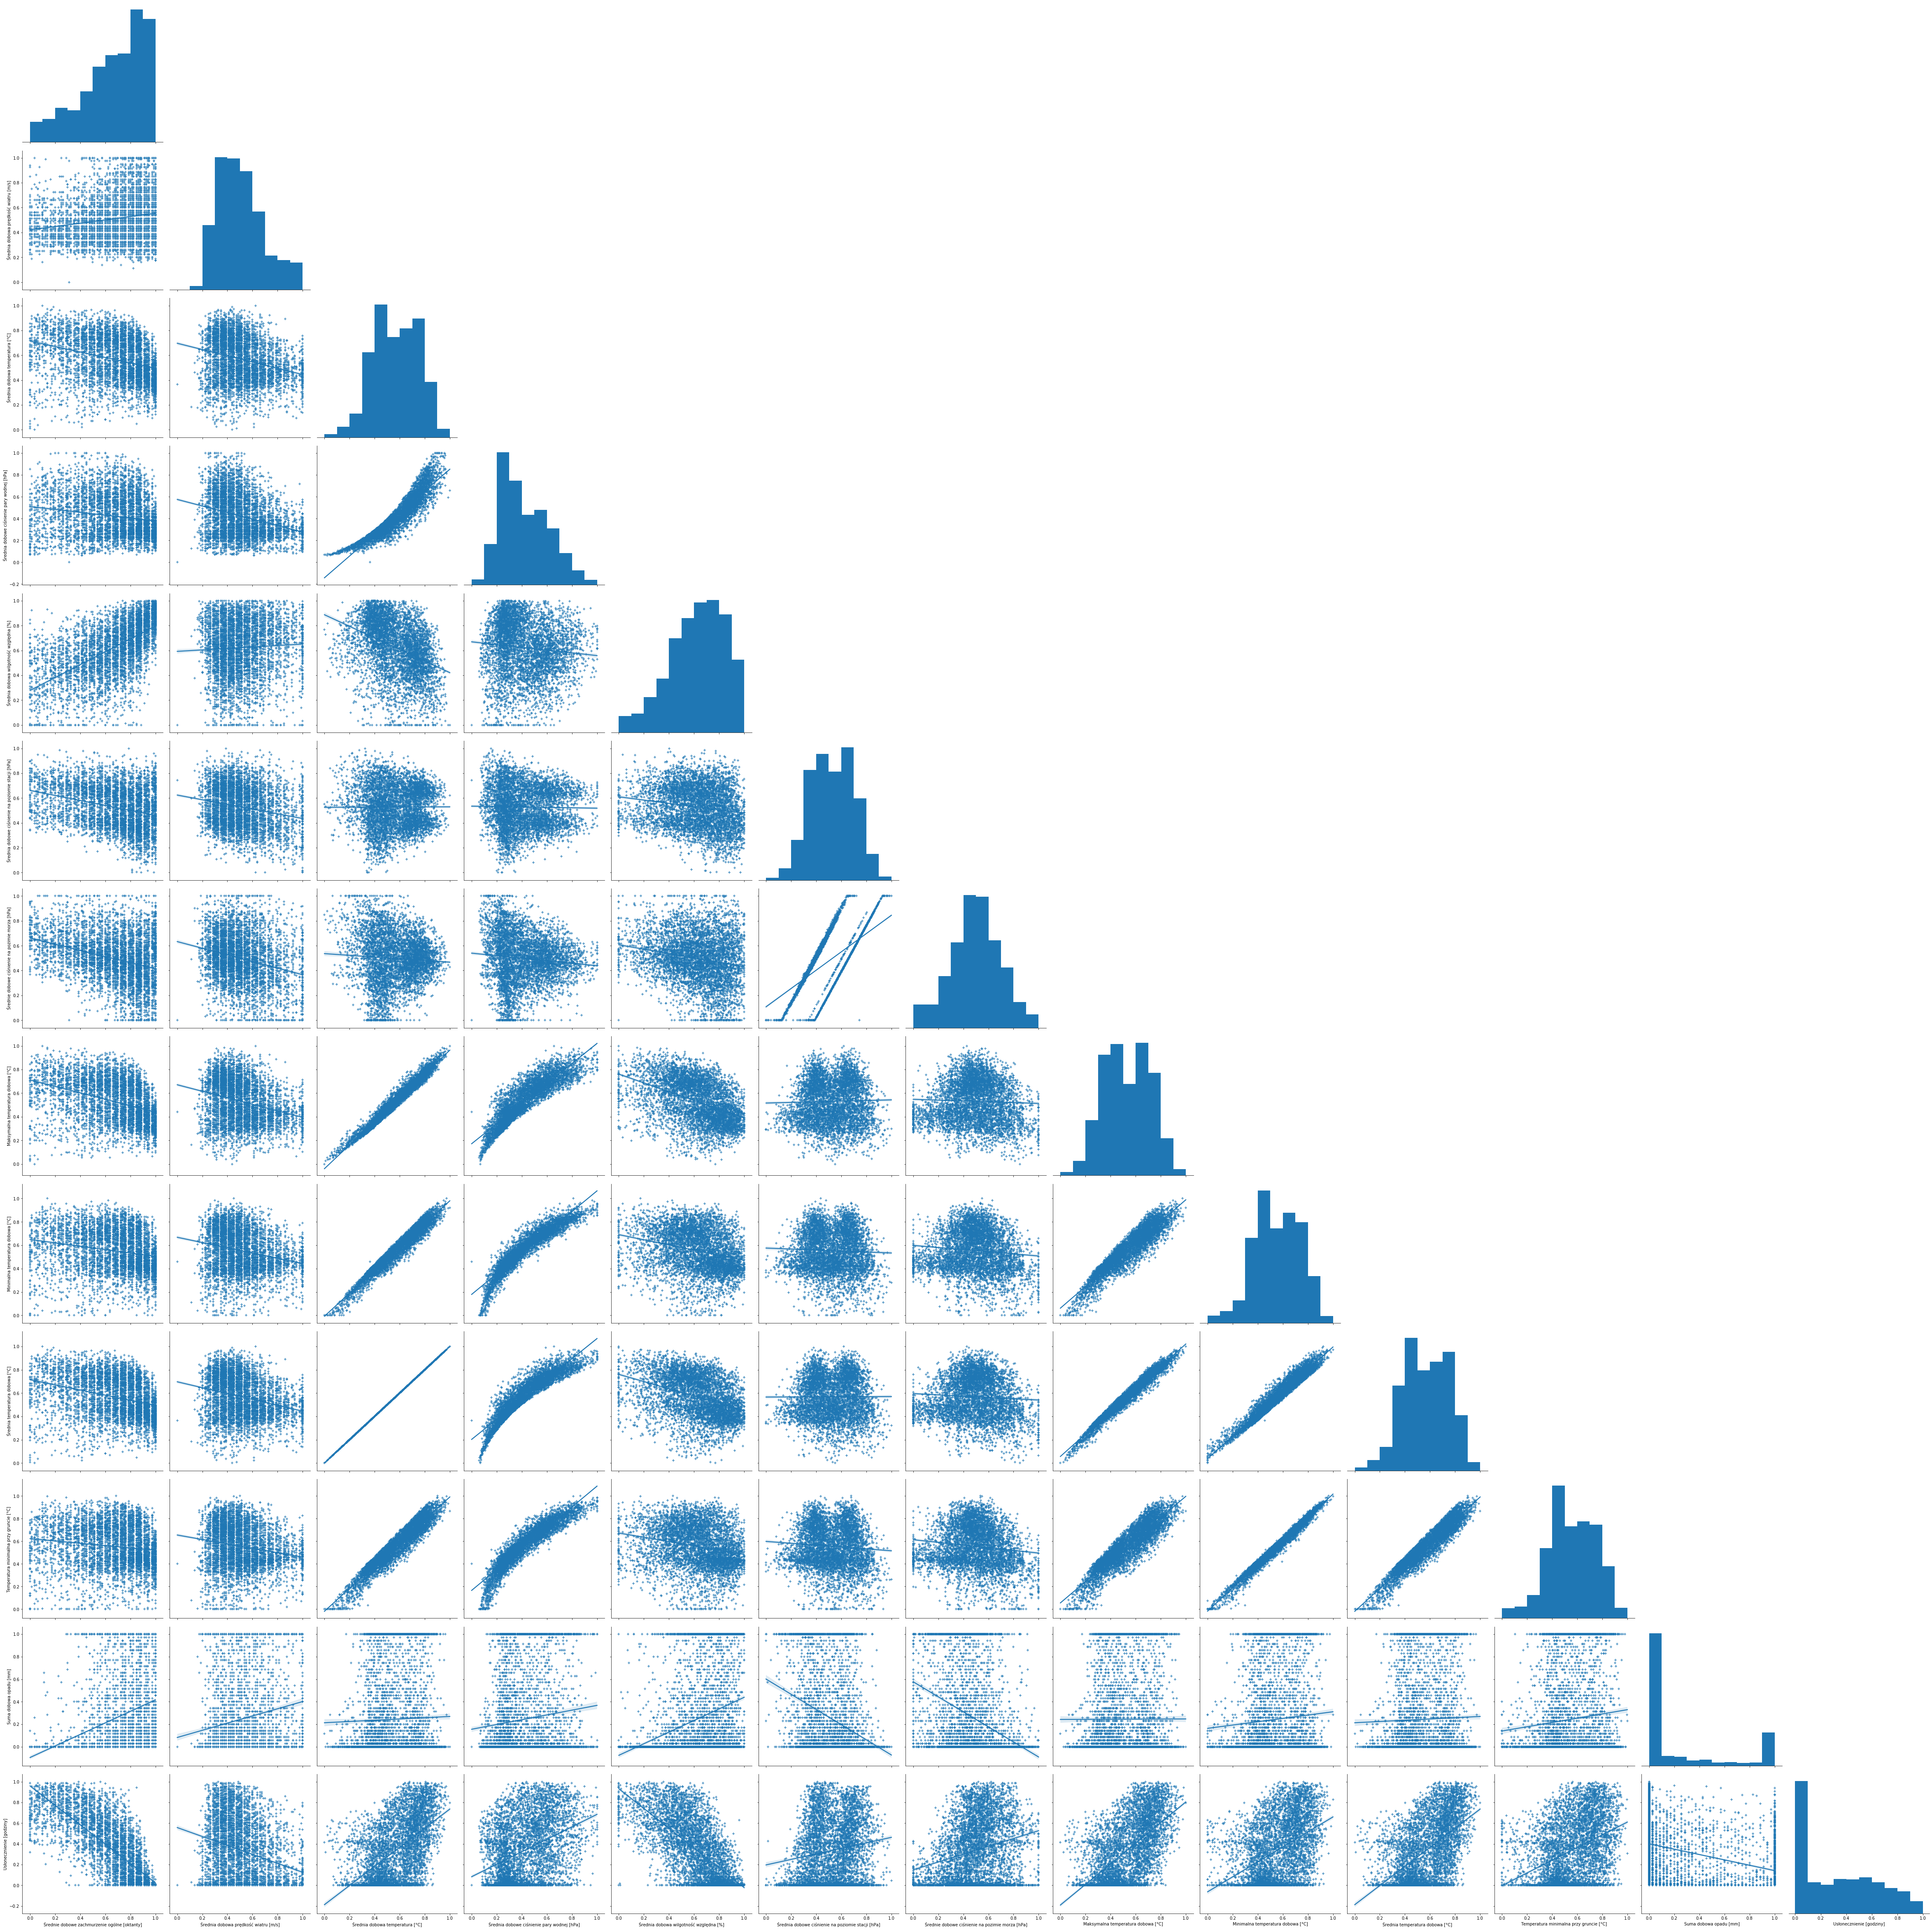

In [44]:
sns.pairplot(dataset.select_dtypes(include=['float64']), height=5, corner=True, kind="reg", palette="husl", markers="+")

## Z dannego grafiku można zrobić takie wnioski:
1. Mamy dwie jednakowe kolumny 1 - Średnia dobowa temperatura [°C] a 2 - Średnia temperatura dobowa [°C] i jedna jest do usunięcia
2. Srednie dobowe cisnienie na poziomie morza zachowuje się tak samo jak cisnienie na poziomie stacji tylko ma inne znaczenie, jedna z tych kolumn może być usunieta
3. Maksymalna, minimalna i średnia temperatura dobowa mają podobne korelacje srednia temperatura uwzglednia jak maksymalną tak i minimalną temperatury + mocno koreluja pomiędzy sobą przy tym że są z danymi z jednej kategorii, dla tego zostawiamy tylko temperature śriednią dobową

In [45]:
day_temp_series = dataset['Średnia dobowa temperatura [°C]']

In [46]:
dataset.drop(columns = ['Średnia dobowa temperatura [°C]'], inplace = True)

In [47]:
dataset.drop(columns = ['Średnie dobowe ciśnienie na pozimie morza [hPa]'], inplace = True)

In [48]:
dataset.drop(columns = ['Maksymalna temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C] ',  'Minimalna temperatura dobowa [°C]'], inplace = True)

### Powtórnie budujemy grafik pairplot dla znalezienia korelacji w raz z przykladowymi regresjami

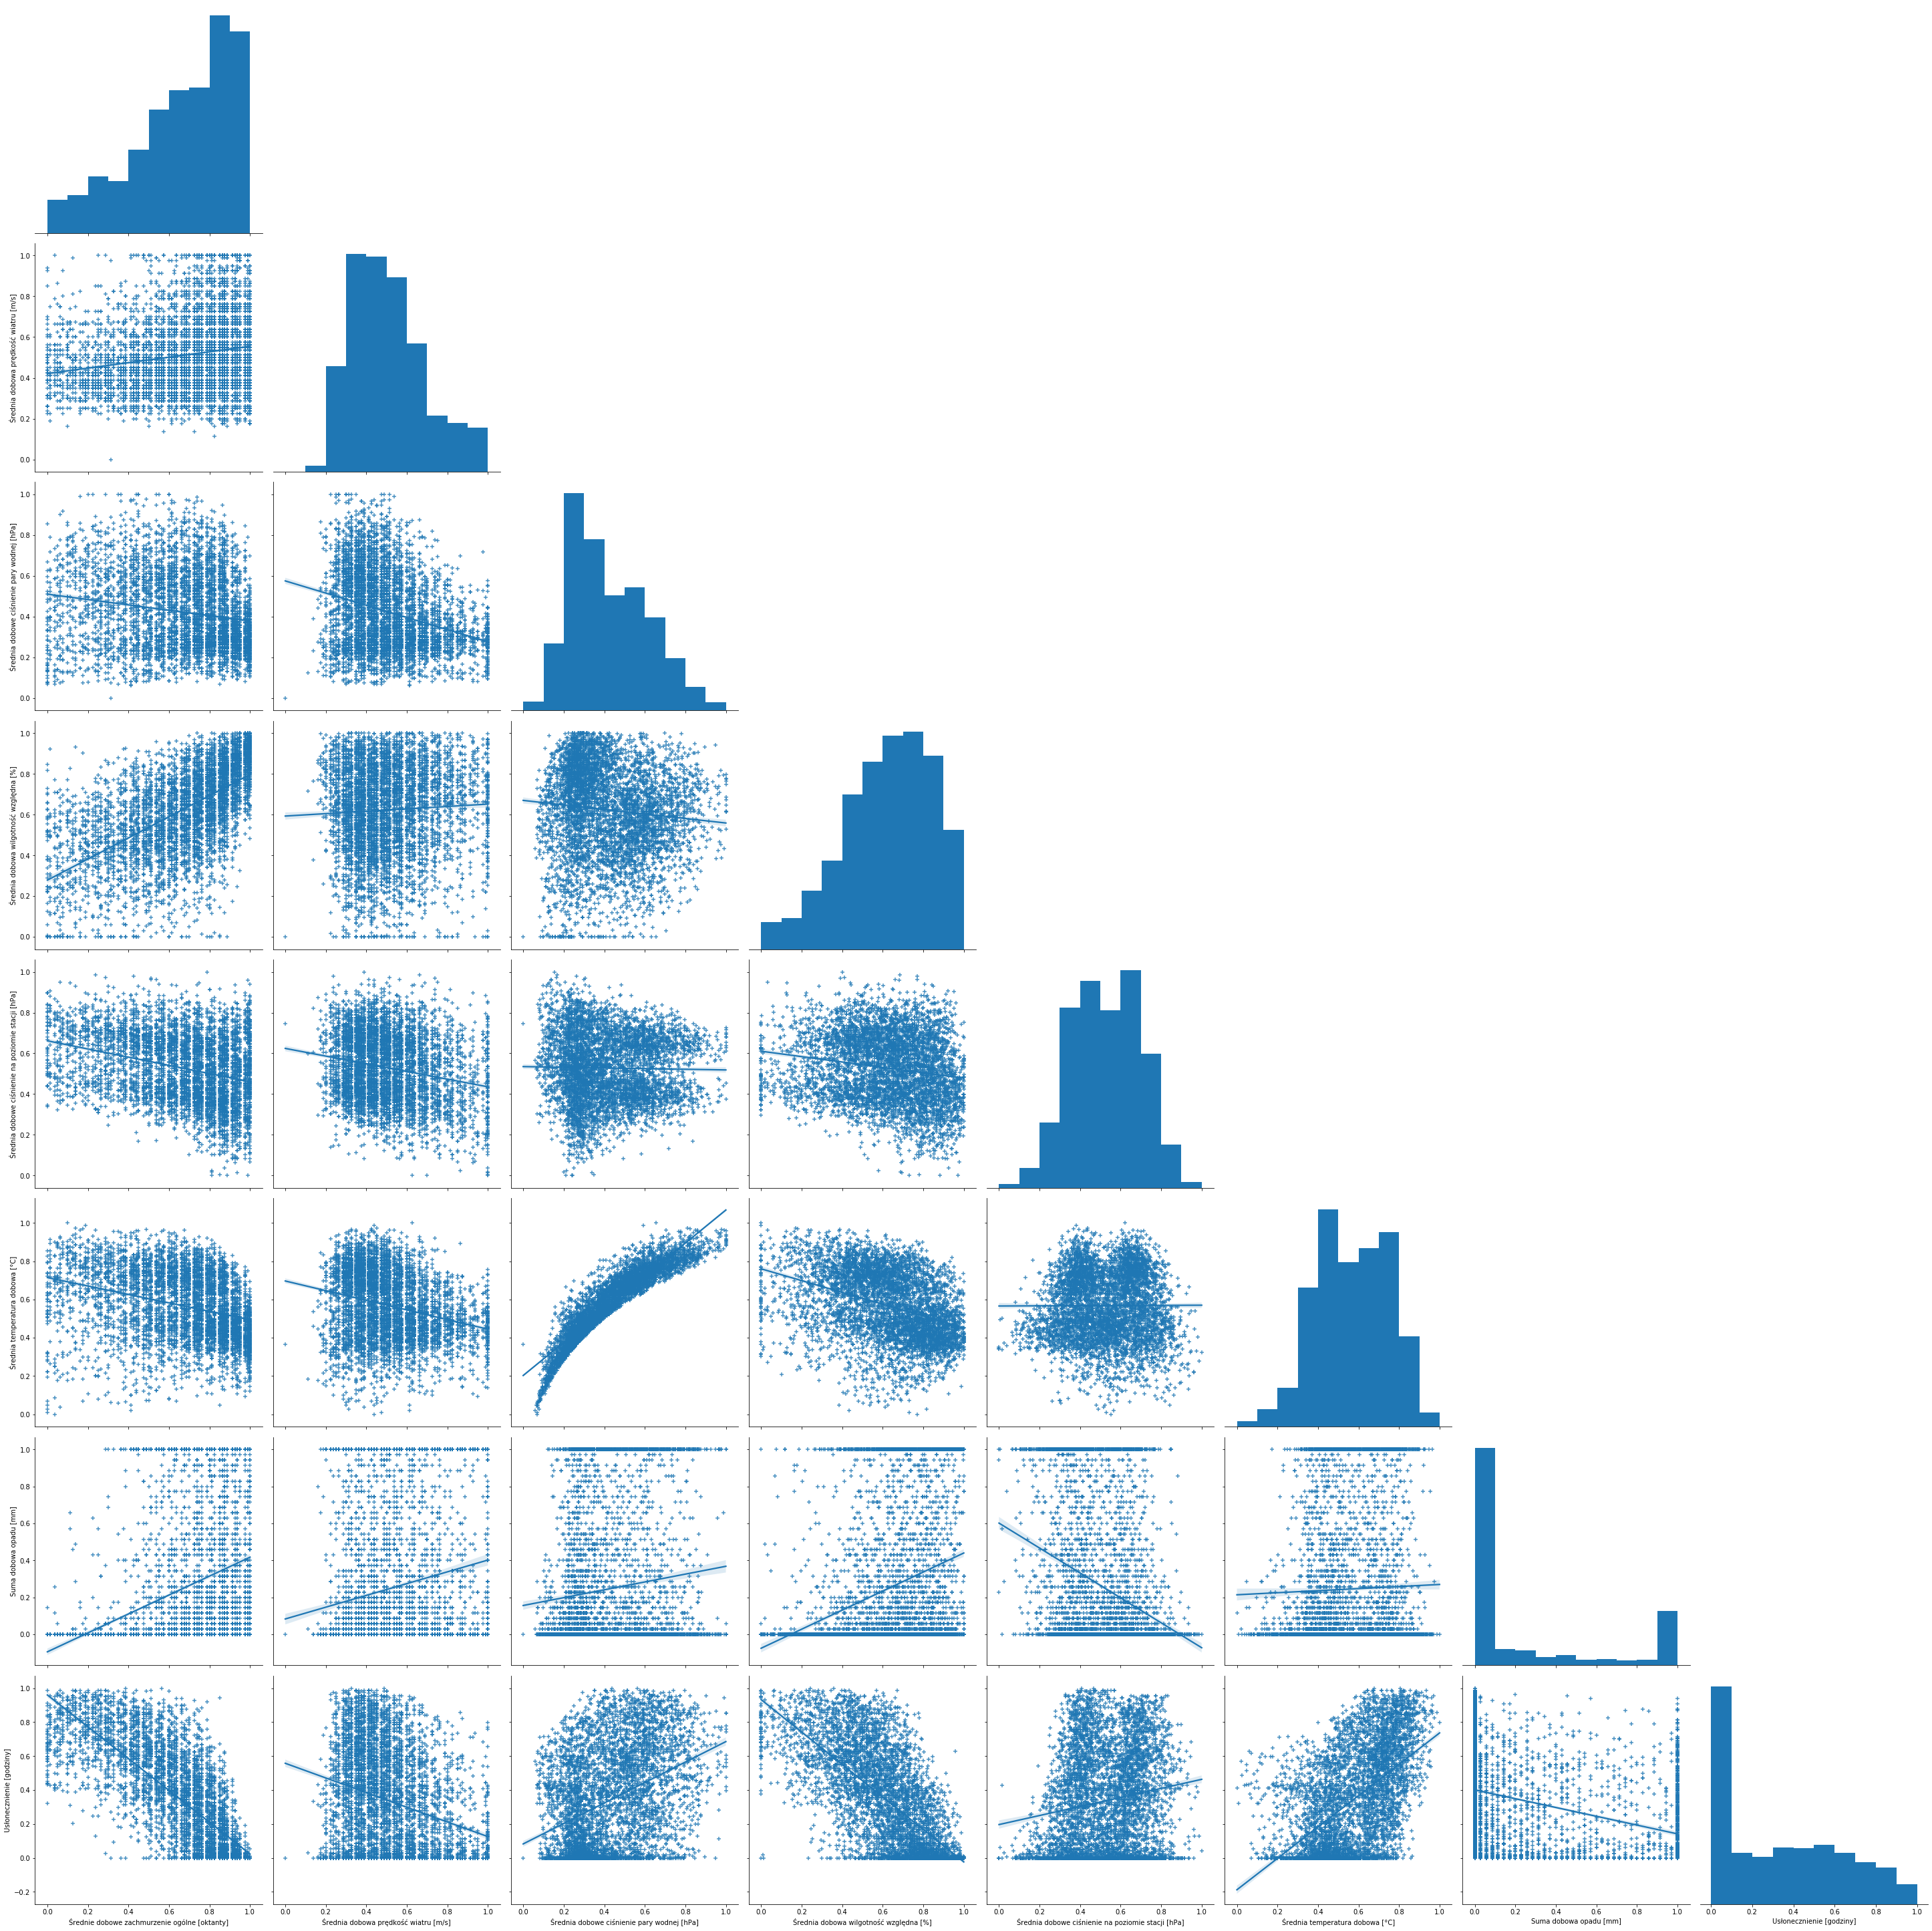

In [49]:
sns.pairplot(dataset.select_dtypes(include=['float64']), height=5, corner=True, kind="reg", palette="husl", markers="+")

### Po usunięciu dannych powtarających się możemy stwierdzić że do uczenia na regresji liniowej nadaje się tylko zależność od temperatury do ciśnienia pary wodnej przy predykcji na dni następnę możliwe jeszcze dodanie temperatury z dnia zeszlego do nauczenia estymatora.

In [50]:
dataset.describe()

Średnie dobowe zachmurzenie ogólne [oktanty]  \
count                                   5098.000000   
mean                                       0.664508   
std                                        0.252836   
min                                        0.000000   
25%                                        0.500000   
50%                                        0.725000   
75%                                        0.862500   
max                                        1.000000   

       Średnia dobowa prędkość wiatru [m/s]  \
count                           5098.000000   
mean                               0.509813   
std                                0.184708   
min                                0.000000   
25%                                0.375000   
50%                                0.487500   
75%                                0.625000   
max                                1.000000   

       Średnia dobowe ciśnienie pary wodnej [hPa]  \
count                                 5098.000000   
mean                                     0.422520   
std                                      0.191626   
min                                      0.000000   
25%                                      0.270386   
50%                                      0.386266   
75%                                      0.562232   
max                                      1.000000   

       Średnia dobowa wilgotność względna [%]  \
count                             5098.000000   
mean                                 0.622897   
std                                  0.219786   
min                                  0.000000   
25%                                  0.477927   
50%                                  0.646833   
75%                                  0.796545   
max                                  1.000000   

       Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
count                                        5098.000000   
mean                                            0.528110   
std                                             0.169629   
min                                             0.000000   
25%                                             0.397277   
50%                                             0.530941   
75%                                             0.662129   
max                                             1.000000   

       Średnia temperatura dobowa [°C]  Suma dobowa opadu [mm]  \
count                      5098.000000             5098.000000   
mean                          0.567974                0.245116   
std                           0.178684                0.375475   
min                           0.000000                0.000000   
25%                           0.430876                0.000000   
50%                           0.562212                0.000000   
75%                           0.718894                0.400000   
max                           1.000000                1.000000   

       Usłonecznienie [godziny]     Rok_2013     Rok_2014     Rok_2015  \
count               5098.000000  5098.000000  5098.000000  5098.000000   
mean                   0.337305     0.142801     0.142801     0.142801   
std                    0.299710     0.349904     0.349904     0.349904   
min                    0.000000     0.000000     0.000000     0.000000   
25%                    0.024691     0.000000     0.000000     0.000000   
50%                    0.308642     0.000000     0.000000     0.000000   
75%                    0.586420     0.000000     0.000000     0.000000   
max                    1.000000     1.000000     1.000000     1.000000   

          Rok_2016     Rok_2017     Rok_2018     Rok_2019  Miesiac_2013  \
count  5098.000000  5098.000000  5098.000000  5098.000000   5098.000000   
mean      0.143193     0.142801     0.142801     0.142801      0.142801   
std       0.350304     0.349904     0.349904     0.349904      0.349904   
min       0.000000     0.000000     0.000000     0.000000      0

In [51]:
Y_DataSet = dataset.select_dtypes(include=['float64'])

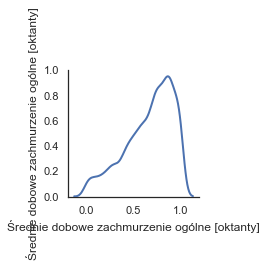

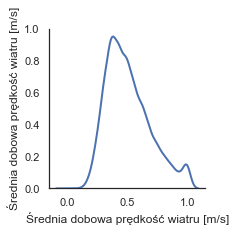

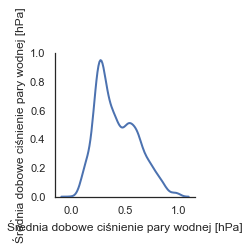

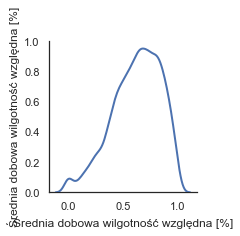

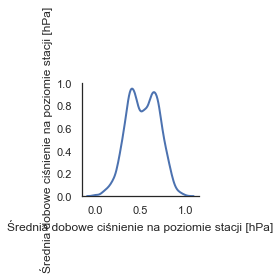

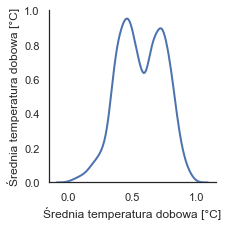

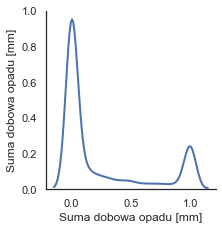

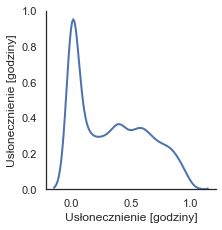

In [52]:
sns.set(style="white")

for column in dataset.select_dtypes(include=['float64']):
    g = sns.PairGrid(data = pd.DataFrame(data = (Y_DataSet[column].shift(-1)[:-1], dataset[column][:-1])).T, x_vars = column,\
                             y_vars = column, height = 3)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot, colors="C0")
    g.map_diag(sns.kdeplot, lw=2)

### Podane grafiki ilustrują że predykcja z "przesunięciem" jest możliwą z użyciem PolymonialFeatures a dla niektórech kolumn w ogóle nie jest możliwa

# Wstępna analiza klasyfikatorów

# Model opadów ilościowy


In [53]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [54]:
estimators = [('OLS', LinearRegression(normalize=True, copy_X=True)),
              ('RANSAC', RANSACRegressor(random_state=42, max_trials=1000)),
              ('HuberRegressor', HuberRegressor(max_iter=10000)),
              ('Ridge', Ridge(normalize=True, copy_X=True))]

In [55]:
def linearEstimatorsPipe(datafame, features, estimators, days = 3,):
    """input:Cecha predykowana, dataset, dni"""
    """return:predykcja, wartość, mean_sq_error, accuracy"""
    predyctionByFeatures = {}
    meanSquareErrorByFeatures = {}
    accuracyByFeatures = {}
    
    for feature in features:
        predyctionByEstimators = {}
        meanSquareErrorByEstimators = {}
        accuracyByEstimators = {}
        
        y = datafame[feature]
        X = datafame.select_dtypes(include=['float64'])
#         X = datafame[feature]
        for name, estimator in estimators:
#             pipe = Pipeline(PolynomialFeatures(2), [(f'{name}', estimator)])
            pipe = make_pipeline(PolynomialFeatures(2), estimator)
            
            predictionByDays = {}
            meanSquareErrorByDays = {}
            accuracyByDays = {}
            
            for i in range(1,(days+1)):
                try:
                    X_train, X_test, y_train, y_test = train_test_split(X[:-i], y.shift(-i)[:-i],\
                                                                        test_size=0.2, random_state=12, stratify=y.shift(-i)[:-i])
                    pipe.fit(X_train, y_train)
                    mse = mean_squared_error(pipe.predict(X_test), y_test)
                    
                    predictionByDays[i] = pipe.predict(X_test)
                    predictionByDays["y_for"+str(i)] = y_test
                    meanSquareErrorByDays[i] = mean_squared_error(pipe.predict(X_test), y_test)
                    accuracyByDays[i] = pipe.score(X_test, y_test)
                except ValueError:
                    pass
            predyctionByEstimators[name] = predictionByDays
            meanSquareErrorByEstimators[name] = meanSquareErrorByDays
            accuracyByEstimators[name] = accuracyByDays
            print(f" Done {name}")
        predyctionByFeatures[feature] = predyctionByEstimators
        meanSquareErrorByFeatures[feature] = meanSquareErrorByEstimators
        accuracyByFeatures[feature] = accuracyByEstimators
        print(f" Done {feature}")
    return predyctionByFeatures,\
           meanSquareErrorByFeatures,\
           accuracyByFeatures

In [56]:
features_for_predict =  ('Średnie dobowe zachmurzenie ogólne [oktanty]', "Usłonecznienie [godziny]",\
                         'Średnia temperatura dobowa [°C]', 'Suma dobowa opadu [mm]')

In [57]:
predyction = linearEstimatorsPipe(dataset.select_dtypes(include=['float64']), features_for_predict, estimators)

 Done OLS
 Done RANSAC
 Done HuberRegressor
 Done Ridge
 Done Średnie dobowe zachmurzenie ogólne [oktanty]
 Done OLS
 Done RANSAC
 Done HuberRegressor
 Done Ridge
 Done Usłonecznienie [godziny]
 Done OLS
 Done RANSAC
 Done HuberRegressor
 Done Ridge
 Done Średnia temperatura dobowa [°C]
 Done OLS
 Done RANSAC
 Done HuberRegressor
 Done Ridge
 Done Suma dobowa opadu [mm]


In [58]:
predyction[2]["Średnia temperatura dobowa [°C]"]

{'OLS': {}, 'RANSAC': {}, 'HuberRegressor': {}, 'Ridge': {}}

In [59]:
predyction[2]["Usłonecznienie [godziny]"]

{'OLS': {1: 0.4774864471363194, 2: 0.39259332501243516, 3: 0.3663736761907961},
 'RANSAC': {1: -0.5648443467306965,
  2: -2.8415994771453463,
  3: -1.6736515792858744},
 'HuberRegressor': {1: 0.47144106538789843,
  2: 0.3854557599613848,
  3: 0.35393838607041905},
 'Ridge': {1: 0.4606163305078886,
  2: 0.37459460608018985,
  3: 0.3408474670404954}}

In [60]:
predyction[2]['Średnie dobowe zachmurzenie ogólne [oktanty]']

{'OLS': {1: 0.4148931293405569,
  2: 0.21862060446994647,
  3: 0.16395065977973955},
 'RANSAC': {1: -3.035856274219343,
  2: -3.5343287001235586,
  3: -3.9778325822353975},
 'HuberRegressor': {1: 0.40986044063606264,
  2: 0.20097412626961675,
  3: 0.14702014095179095},
 'Ridge': {1: 0.3851892872856737,
  2: 0.2157644216003558,
  3: 0.16546614273168736}}

In [61]:
def labelowanko(Cechy_predyktowane_string,ilosc_kategorii,dataset):
    max_value = dataset[Cechy_predyktowane_string].max()
    binInterval = np.arange(0, max_value, max_value/ilosc_kategorii).tolist()
    binInterval.append(max_value)
    binLabels   = range(0,len(binInterval)-1)
    zachmurzenie_catogory = pd.cut(dataset[Cechy_predyktowane_string], bins = binInterval, labels=binLabels, include_lowest=True)
    return zachmurzenie_catogory

In [62]:
def Predykcja_kategoryczna(Cechy_predyktowane_string, dataset, ilosc_dni,ilosc_kategorii):
    lista_modeli = []
    lista_nazw = []
    lista_score = []
    lista_matrix = []
    lista_df_test_predykcje = []
    
    
    lista_list = []
    
    
    for dzien in range(1,ilosc_dni+1):
        lista = []
        max_val = dataset[Cechy_predyktowane_string].max()
        lista = labelowanko(Cechy_predyktowane_string,ilosc_kategorii,dataset).shift(-dzien)[:-dzien].tolist()
        mniejszy_dataset = dataset[:-dzien] #sciaganie ostatnich X wartosci, bo dla nich nie mamy etykiet.
        
        values = pd.DataFrame(lista, columns = ["Kategorie spredytkowane"])
        train,test, etykiety_train, etykiety_test  = train_test_split(mniejszy_dataset,values, test_size=0.3, random_state=12)
        
        
        log = LogisticRegression(random_state=0,solver='lbfgs')
        log.max_iter = 1000
        log.fit(train, etykiety_train)
        wynik_log = log.predict(test)
        log_df = pd.DataFrame(wynik_log)
        log_df = pd.concat([log_df, etykiety_test], axis=1, join='inner')
        log_df.columns = ["Kategorie rzeczywiste", "Kategorie spredytkowane"]
        
              
        lista_modeli.append(log)
        lista_nazw.append("LogisticRegression")
        lista_score.append(log.score(test,etykiety_test))
        lista_matrix.append(confusion_matrix(etykiety_test, log.predict(test)))
        lista_df_test_predykcje.append(log_df)
        
        
          
        clf = AdaBoostClassifier(n_estimators=100, random_state=0)
        clf.fit(train,etykiety_train)
        wynik_clf = clf.predict(test)
        clf_df = pd.DataFrame(wynik_log)
        clf_df = pd.concat([clf_df, etykiety_test], axis=1, join='inner')
        clf_df.columns = ["Kategorie rzeczywiste", "Kategorie spredytkowane"]
        
              
        lista_modeli.append(clf)
        lista_nazw.append("Adaboost")
        lista_score.append(log.score(test,etykiety_test))
        lista_matrix.append(confusion_matrix(etykiety_test, clf.predict(test)))
        lista_df_test_predykcje.append(clf_df)
        
        
        
        rfc = RandomForestClassifier(max_depth=50, random_state=0)
        rfc.fit(train, etykiety_train)
        wynik_rfc = rfc.predict(test)
        rfc_df = pd.DataFrame(wynik_rfc)
        rfc_df = pd.concat([rfc_df, etykiety_test], axis=1, join='inner')
        rfc_df.columns = ["Kategorie rzeczywiste", "Kategorie spredytkowane"]
        
        
        lista_modeli.append(rfc)
        lista_nazw.append("RandomForestClassifier")
        lista_score.append(rfc.score(test,etykiety_test))
        lista_matrix.append(confusion_matrix(etykiety_test, rfc.predict(test)))
        lista_df_test_predykcje.append(rfc_df)
        
        
    
        SVM = SVC(gamma=1)
        SVM.fit(train, etykiety_train)
        wynik_SVM = SVM.predict(test)
        SVM_df = pd.DataFrame(wynik_SVM)
        SVM_df = pd.concat([SVM_df, etykiety_test], axis=1, join='inner')
        SVM_df.columns = ["Kategorie rzeczywiste", "Kategorie spredytkowane"]
        
        
        lista_modeli.append(SVM)
        lista_nazw.append("SVM")
        lista_score.append(SVM.score(test,etykiety_test))
        lista_matrix.append(confusion_matrix(etykiety_test, SVM.predict(test)))
        lista_df_test_predykcje.append(SVM_df)
    
    
    
    return lista_modeli, lista_nazw, lista_score, lista_matrix, lista_df_test_predykcje

In [63]:
#Model przewidywania opadów kategoryczny
ModeleO,nazwyO,scoryO,matrixyO,test_predykcjeO = Predykcja_kategoryczna("Suma dobowa opadu [mm]", dataset, 7,3)
#Model nasłonecznienie kategoryczny
ModeleU,nazwyU,scoryU,matrixyU,test_predykcjeU = Predykcja_kategoryczna("Usłonecznienie [godziny]", dataset, 7,3)
#Model przewidywania wiatru kategoryczny
ModeleW,nazwyW,scoryW,matrixyW,test_predykcjeW = Predykcja_kategoryczna("Średnia dobowa prędkość wiatru [m/s]", dataset, 7,3)
#Model przewidywania zachmurzenia kategoryczny
ModeleZ,nazwyZ,scoryZ,matrixyZ,test_predykcjeZ = Predykcja_kategoryczna("Średnie dobowe zachmurzenie ogólne [oktanty]", dataset, 7,3)

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_o

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_o

F:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_o

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [64]:
def ScoreMacierzy(matrix):
    difference = 10
    score = 0
    shape = matrix.shape
    for i in range(shape[0]):
        for j in range(shape[1]):
            point = (- abs(i-j))
            elScore = 10 if point == 0 else point * difference
            score = score + matrix[i][j] * elScore
    return score

def ChooseBestOne(matrix):
    scores = []
    scores.append([ScoreMacierzy(matrix) for matrix in matrixyO[0:4]])
    scores.append([ScoreMacierzy(matrix) for matrix in matrixyO[4:8]])
    scores.append([ScoreMacierzy(matrix) for matrix in matrixyO[8:12]])
    scores.append([ScoreMacierzy(matrix) for matrix in matrixyO[12:16]])
    scores.append([ScoreMacierzy(matrix) for matrix in matrixyO[16:20]])
    scores.append([ScoreMacierzy(matrix) for matrix in matrixyO[20:24]])
    scores.append([ScoreMacierzy(matrix) for matrix in matrixyO[24:28]])
    sums = np.sum(scores,axis=0)
    return np.where(sums == np.amax(sums))[0][0]

In [65]:
scores = []
scores.append([ScoreMacierzy(matrix) for matrix in matrixyU[0:4]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyU[4:8]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyU[8:12]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyU[12:16]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyU[16:20]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyU[20:24]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyU[24:28]])
scores

[[3450, 2420, 4060, 4230],
 [2160, 1760, 2610, 2590],
 [730, 70, 1630, 1010],
 [790, 330, 1600, 1320],
 [640, 380, 1320, 920],
 [1050, 290, 1430, 740],
 [800, 630, 1420, 1040]]

In [66]:
scores = []
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[0:4]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[4:8]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[8:12]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[12:16]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[16:20]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[20:24]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[24:28]])
scores

[[5060, 4660, 4940, 5140],
 [4580, 4140, 4270, 4690],
 [4290, 3720, 3800, 4290],
 [4360, 3980, 3730, 4480],
 [4090, 3690, 3870, 4100],
 [4650, 4210, 4120, 4720],
 [4880, 3940, 3900, 4860]]

In [67]:
scores = []
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[0:4]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[4:8]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[8:12]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[12:16]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[16:20]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[20:24]])
scores.append([ScoreMacierzy(matrix) for matrix in matrixyW[24:28]])
scores

[[5060, 4660, 4940, 5140],
 [4580, 4140, 4270, 4690],
 [4290, 3720, 3800, 4290],
 [4360, 3980, 3730, 4480],
 [4090, 3690, 3870, 4100],
 [4650, 4210, 4120, 4720],
 [4880, 3940, 3900, 4860]]

In [68]:
print(ChooseBestOne(matrixyO))  #Opad
print(ChooseBestOne(matrixyU))  # Usłonecznienie
print(ChooseBestOne(matrixyW))  # Wiatr
print(ChooseBestOne(matrixyZ))  #Zachmurzenie

0
0
0
0


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [70]:
scoryZ

[0.6392156862745098,
 0.6392156862745098,
 0.626797385620915,
 0.6254901960784314,
 0.5997383911052976,
 0.5997383911052976,
 0.604970568999346,
 0.6069326357096141,
 0.5892740353172008,
 0.5892740353172008,
 0.5807717462393721,
 0.6030085022890779,
 0.5925441465009811,
 0.5925441465009811,
 0.5650752125572269,
 0.5879659908436887,
 0.5778795811518325,
 0.5778795811518325,
 0.5818062827225131,
 0.5785340314136126,
 0.5798429319371727,
 0.5798429319371727,
 0.5759162303664922,
 0.5850785340314136,
 0.5818062827225131,
 0.5818062827225131,
 0.5759162303664922,
 0.5929319371727748]

### Optimize using GridSearch nasłonecznienie Tak/Nie

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, \
make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [72]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

In [73]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [74]:
max_value = dataset['Usłonecznienie [godziny]'].max()
binInterval = np.arange(0, max_value, max_value/2).tolist()
binInterval.append(max_value)
binLabels   = range(0,len(binInterval)-1)
targets = pd.cut(dataset['Usłonecznienie [godziny]'], bins = binInterval, labels=binLabels, include_lowest=True)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:-1], targets.shift(-1)[:-1], stratify=targets.shift(-1)[:-1])

In [76]:
print('y_train class distribution')
print(y_train.value_counts(normalize=True))

print('y_test class distribution')
print(y_test.value_counts(normalize=True))

y_train class distribution
0    0.677656
1    0.322344
Name: Usłonecznienie [godziny], dtype: float64
y_test class distribution
0    0.677647
1    0.322353
Name: Usłonecznienie [godziny], dtype: float64


In [77]:
def grid_search_wrapper(scorers, refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [78]:
grid_search_clf = grid_search_wrapper(scorers)

Best params for precision_score
{'max_depth': 3, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg       786        78
pos       216       195


In [79]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
         'param_max_depth', 'param_max_features', 'param_min_samples_split',
         'param_n_estimators']].head()

mean_test_precision_score  mean_test_recall_score  \
2                   0.737674                0.459395   
0                   0.735734                0.453744   
5                   0.735569                0.456996   
3                   0.734779                0.455363   
4                   0.730462                0.453763   

   mean_test_accuracy_score param_max_depth param_max_features  \
2                  0.772632               3                  3   
0                  0.770281               3                  3   
5                  0.771067               3                  3   
3                  0.770281               3                  3   
4                  0.769495               3                  3   

  param_min_samples_split param_n_estimators  
2                       5                100  
0                       3                100  
5                      10                300  
3                       5                300  
4                      10                100

In [80]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
         'param_max_depth', 'param_max_features', 'param_min_samples_split',
         'param_n_estimators']].head()


mean_test_precision_score  mean_test_recall_score  \
87                   0.693734                0.650997   
64                   0.695414                0.648584   
57                   0.699896                0.647745   
48                   0.690286                0.646964   
69                   0.694354                0.646945   

    mean_test_accuracy_score param_max_depth param_max_features  \
87                  0.793825              25                 10   
64                  0.794088              15                 10   
57                  0.795915              15                  5   
48                  0.791995              15                  3   
69                  0.793301              15                 20   

   param_min_samples_split param_n_estimators  
87                       5                300  
64                      10                100  
57                       5                300  
48                       3                100  
69                       5                300

In [81]:
params_best_sun = results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
         'param_max_depth', 'param_max_features', 'param_min_samples_split',
         'param_n_estimators']].head(1)
params_best_sun

mean_test_precision_score  mean_test_recall_score  \
87                   0.693734                0.650997   

    mean_test_accuracy_score param_max_depth param_max_features  \
87                  0.793825              25                 10   

   param_min_samples_split param_n_estimators  
87                       5                300


## Optimising srednia temperatura dobowa Ridge Regression

In [82]:
model = make_pipeline(PolynomialFeatures(2), Ridge())

In [83]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:-1], dataset["Średnia temperatura dobowa [°C]"].shift(-1)[:-1], stratify=targets.shift(-1)[:-1])

In [84]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'polynomialfeatures', 'ridge', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])

In [85]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Score:  0.9261001606708806
Best Params:  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [86]:
params_best_temp = grid_result.best_params_
params_best_temp

{'alpha': 0.01}

## Odnalezienie najlepszego klasyfikatora 2 

In [87]:
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=-1, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [89]:
models1 = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}


In [90]:
params1 = {
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

In [91]:
max_value = dataset['Suma dobowa opadu [mm]'].max()
binInterval = np.arange(0, max_value, max_value/3).tolist()
binInterval.append(max_value)
binLabels   = range(0,len(binInterval)-1)
targets = pd.cut(dataset['Suma dobowa opadu [mm]'], bins = binInterval, labels=binLabels, include_lowest=True)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:-1], targets.shift(-1)[:-1], stratify=targets.shift(-1)[:-1])

In [93]:
helper1 = EstimatorSelectionHelper(models1, params1)

In [94]:
helper1.fit(X_train, y_train, scoring='f1_macro', n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.3s finished


In [95]:
helper1.score_summary(sort_by='max_score')

ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


estimator min_score mean_score max_score    std_score  \
9   GradientBoostingClassifier   0.34962   0.372888  0.386774    0.0165553   
7   GradientBoostingClassifier  0.363056   0.368808  0.380037   0.00794082   
1         ExtraTreesClassifier  0.354143   0.362144  0.376902    0.0104477   
0         ExtraTreesClassifier   0.35397   0.361408  0.368391   0.00589612   
8   GradientBoostingClassifier  0.356315   0.363065  0.367982   0.00493643   
6   GradientBoostingClassifier  0.341677   0.354875  0.364281   0.00961006   
2       RandomForestClassifier  0.350515   0.354531  0.358015   0.00308473   
3       RandomForestClassifier  0.337369    0.34574  0.351681   0.00609053   
5           AdaBoostClassifier   0.32768   0.338806  0.349999   0.00911163   
4           AdaBoostClassifier  0.312096    0.33076  0.347365    0.0144716   
10                         SVC  0.281831   0.281947  0.282005  8.21619e-05   
11                         SVC  0.281831   0.281947  0.282005  8.21619e-05   
12                         SVC  0.281831   0.281947  0.282005  8.21619e-05   
13                         SVC  0.281831   0.281947  0.282005  8.21619e-05   
14                         SVC  0.281831   0.281947  0.282005  8.21619e-05   
15                         SVC  0.281831   0.281947  0.282005  8.21619e-05   

   n_estimators learning_rate    C  kernel   gamma  
9            32             1  NaN     NaN     NaN  
7            32           0.8  NaN     NaN     NaN  
1            32           NaN  NaN     NaN     NaN  
0            16           NaN  NaN     NaN     NaN  
8            16             1  NaN     NaN     NaN  
6            16           0.8  NaN     NaN     NaN  
2            16           NaN  NaN     NaN     NaN  
3            32           NaN  NaN     NaN     NaN  
5            32           NaN  NaN     NaN     NaN  
4            16           NaN  NaN     NaN     NaN  
10          NaN           NaN    1  linear     NaN  
11          NaN           NaN   10  linear     NaN  
12          NaN           NaN    1     rbf   0.001  
13          NaN           NaN    1     rbf  0.0001  
14          NaN           NaN   10     rbf   0.001  
15          NaN           NaN   10     rbf  0.0001

In [96]:
params_best_rain = helper1.score_summary(sort_by='max_score').head(1)
params_best_rain

ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


estimator min_score mean_score max_score  std_score  \
9  GradientBoostingClassifier   0.34962   0.372888  0.386774  0.0165553   

  n_estimators learning_rate    C kernel gamma  
9           32             1  NaN    NaN   NaN

In [97]:
max_value = dataset['Średnie dobowe zachmurzenie ogólne [oktanty]'].max()
binInterval = np.arange(0, max_value, max_value/3).tolist()
binInterval.append(max_value)
binLabels   = range(0,len(binInterval)-1)
targets = pd.cut(dataset['Średnie dobowe zachmurzenie ogólne [oktanty]'], bins = binInterval, labels=binLabels, include_lowest=True)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:-1], targets.shift(-1)[:-1], stratify=targets.shift(-1)[:-1])

In [99]:
helper2 = EstimatorSelectionHelper(models1, params1)

In [100]:
helper2.fit(X_train, y_train, scoring='f1_macro', n_jobs=-1)

Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:    1.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.0s finished


In [101]:
helper2.score_summary(sort_by='max_score')

ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


estimator min_score mean_score max_score    std_score  \
2       RandomForestClassifier  0.501993   0.519599  0.532191    0.0128279   
4           AdaBoostClassifier  0.513483   0.524207  0.529911   0.00758861   
6   GradientBoostingClassifier  0.491208   0.501238  0.516261    0.0108203   
3       RandomForestClassifier  0.508653   0.511432   0.51434   0.00232347   
1         ExtraTreesClassifier  0.496082   0.507862  0.514305   0.00834209   
0         ExtraTreesClassifier  0.501772   0.507318  0.513628    0.0048704   
5           AdaBoostClassifier  0.482219   0.499922  0.509838    0.0125478   
11                         SVC  0.382561   0.459548  0.503655    0.0546304   
8   GradientBoostingClassifier  0.498555   0.500935  0.502607   0.00172862   
7   GradientBoostingClassifier  0.484406   0.493885  0.501656   0.00714545   
9   GradientBoostingClassifier  0.485383   0.491658  0.497677   0.00502231   
10                         SVC  0.380077   0.396649  0.415526    0.0145634   
14                         SVC  0.244113   0.269015  0.313678    0.0316517   
12                         SVC  0.244113   0.244183  0.244323  9.90521e-05   
13                         SVC  0.244113   0.244183  0.244323  9.90521e-05   
15                         SVC  0.244113   0.244183  0.244323  9.90521e-05   

   n_estimators learning_rate    C  kernel   gamma  
2            16           NaN  NaN     NaN     NaN  
4            16           NaN  NaN     NaN     NaN  
6            16           0.8  NaN     NaN     NaN  
3            32           NaN  NaN     NaN     NaN  
1            32           NaN  NaN     NaN     NaN  
0            16           NaN  NaN     NaN     NaN  
5            32           NaN  NaN     NaN     NaN  
11          NaN           NaN   10  linear     NaN  
8            16             1  NaN     NaN     NaN  
7            32           0.8  NaN     NaN     NaN  
9            32             1  NaN     NaN     NaN  
10          NaN           NaN    1  linear     NaN  
14          NaN           NaN   10     rbf   0.001  
12          NaN           NaN    1     rbf   0.001  
13          NaN           NaN    1     rbf  0.0001  
15          NaN           NaN   10     rbf  0.0001

In [102]:
params_best_clouds = helper2.score_summary(sort_by='max_score').head(1)
params_best_clouds

ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


estimator min_score mean_score max_score  std_score  \
2  RandomForestClassifier  0.501993   0.519599  0.532191  0.0128279   

  n_estimators learning_rate    C kernel gamma  
2           16           NaN  NaN    NaN   NaN

In [103]:
max_value = dataset['Średnia dobowe ciśnienie na poziomie stacji [hPa]'].max()
binInterval = np.arange(0, max_value, max_value/3).tolist()
binInterval.append(max_value)
binLabels   = range(0,len(binInterval)-1)
targets = pd.cut(dataset['Średnia dobowe ciśnienie na poziomie stacji [hPa]'], bins = binInterval, labels=binLabels, include_lowest=True)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:-1], targets.shift(-1)[:-1], stratify=targets.shift(-1)[:-1])

In [105]:
helper3 = EstimatorSelectionHelper(models1, params1)

In [106]:
helper3.fit(X_train, y_train, scoring='f1_macro', n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.7s finished


In [107]:
helper3.score_summary(sort_by='max_score')

ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


estimator min_score mean_score max_score    std_score  \
11                         SVC   0.73246   0.742671  0.760418    0.0125962   
8   GradientBoostingClassifier  0.716357   0.724385  0.737312   0.00922986   
6   GradientBoostingClassifier  0.717793   0.725629  0.737058   0.00826493   
10                         SVC  0.716648   0.723125  0.736027    0.0091228   
7   GradientBoostingClassifier  0.709346   0.720233  0.733903    0.0102166   
3       RandomForestClassifier   0.69828   0.714946  0.726348    0.0120475   
9   GradientBoostingClassifier  0.692629   0.707801  0.719442    0.0112276   
2       RandomForestClassifier  0.687794    0.70093  0.713262    0.0104126   
1         ExtraTreesClassifier  0.668482   0.679951  0.693971    0.0105611   
0         ExtraTreesClassifier  0.656725   0.658738   0.66192   0.00227619   
5           AdaBoostClassifier  0.521782   0.557322   0.62803    0.0499989   
4           AdaBoostClassifier  0.507521   0.544281  0.586848    0.0326445   
12                         SVC  0.257744   0.257875   0.25794  9.27662e-05   
13                         SVC  0.257744   0.257875   0.25794  9.27662e-05   
14                         SVC  0.257744   0.257875   0.25794  9.27662e-05   
15                         SVC  0.257744   0.257875   0.25794  9.27662e-05   

   n_estimators learning_rate    C  kernel   gamma  
11          NaN           NaN   10  linear     NaN  
8            16             1  NaN     NaN     NaN  
6            16           0.8  NaN     NaN     NaN  
10          NaN           NaN    1  linear     NaN  
7            32           0.8  NaN     NaN     NaN  
3            32           NaN  NaN     NaN     NaN  
9            32             1  NaN     NaN     NaN  
2            16           NaN  NaN     NaN     NaN  
1            32           NaN  NaN     NaN     NaN  
0            16           NaN  NaN     NaN     NaN  
5            32           NaN  NaN     NaN     NaN  
4            16           NaN  NaN     NaN     NaN  
12          NaN           NaN    1     rbf   0.001  
13          NaN           NaN    1     rbf  0.0001  
14          NaN           NaN   10     rbf   0.001  
15          NaN           NaN   10     rbf  0.0001

In [108]:
params_best_pressure = helper3.score_summary(sort_by='max_score').head(1)
params_best_pressure

ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


estimator min_score mean_score max_score  std_score n_estimators  \
11       SVC   0.73246   0.742671  0.760418  0.0125962          NaN   

   learning_rate   C  kernel gamma  
11           NaN  10  linear   NaN

In [109]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV


lasso_pipeline = make_pipeline(LassoCV())

rf_pipeline = make_pipeline(RandomForestRegressor(random_state=42))

gradient_pipeline = make_pipeline(HistGradientBoostingRegressor(random_state=0))

estimators = [('Random Forest', rf_pipeline),
              ('Lasso', lasso_pipeline),
              ('Gradient Boosting', gradient_pipeline)]

stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())

In [110]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:-1], dataset['Usłonecznienie [godziny]'].shift(-1)[:-1],\
                                                    stratify=dataset['Usłonecznienie [godziny]'].shift(-1)[:-1])

In [111]:
%%time

from sklearn.model_selection import cross_validate, cross_val_predict

score = cross_validate(stacking_regressor, X_train, y_train,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)

y_pred = cross_val_predict(stacking_regressor, X_test, y_test, n_jobs=-1, verbose=0)

Wall time: 37.5 s


In [112]:
score

{'fit_time': array([24.53161287, 24.5231843 , 24.56633425, 24.56583834, 24.84706235]),
 'score_time': array([0.06100941, 0.05902171, 0.06348705, 0.05356622, 0.04166937]),
 'test_r2': array([0.46296547, 0.46100697, 0.47895706, 0.52026127, 0.42196997]),
 'test_neg_mean_absolute_error': array([-0.18032379, -0.1773916 , -0.17655975, -0.1706589 , -0.18123497])}

In [113]:
y_pred

array([0.59421449, 0.66281859, 0.07403545, ..., 0.57450094, 0.270817  ,
       0.04236568])

In [114]:
print("Accuracy: %0.2f (+/- %0.2f)" % (y_pred.mean(), y_pred.std() * 2))

Accuracy: 0.33 (+/- 0.41)


In [115]:
dataset = pd.get_dummies(typed_df)

In [116]:
dataset

Średnie dobowe zachmurzenie ogólne [oktanty]  \
0                                           0.9250   
1                                           0.9125   
2                                           0.4250   
3                                           0.6125   
4                                           0.8250   
...                                            ...   
5093                                        0.8500   
5094                                        0.8625   
5095                                        0.8875   
5096                                        0.8125   
5097                                        0.8625   

      Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                                   0.4750                         0.437788   
1                                   0.7625                         0.472350   
2                                   0.7875                         0.490783   
3                                   0.6625                         0.440092   
4                                   0.4125                         0.396313   
...                                    ...                              ...   
5093                                0.4750                         0.382488   
5094                                0.6625                         0.352535   
5095                                0.5625                         0.341014   
5096                                1.0000                         0.396313   
5097                                0.8000                         0.456221   

      Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                       0.326180   
1                                       0.356223   
2                                       0.347639   
3                                       0.287554   
4                                       0.261803   
...                                          ...   
5093                                    0.261803   
5094                                    0.210300   
5095                                    0.223176   
5096                                    0.188841   
5097                                    0.270386   

      Średnia dobowa wilgotność względna [%]  \
0                                   0.973129   
1                                   0.952015   
2                                   0.794626   
3                                   0.738964   
4                                   0.809981   
...                                      ...   
5093                                0.875240   
5094                                0.666027   
5095                                0.838772   
5096                                0.345489   
5097                                0.570058   

      Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                              0.613861   
1                                              0.626238   
2                                              0.653465   
3                                              0.733911   
4                                              0.730198   
...                                                 ...   
5093                                           0.486386   
5094                                           0.628713   
5095                                           0.643564   
5096                                           0.461634   
5097                                           0.398515   

      Średnie dobowe ciśnienie na pozimie morza [hPa]  \
0                                            0.416284   
1                                            0.439220   
2                                            0.489679   
3                                            0.638761   
4                                            0.634174   
...                                               ...   
5093                                         0.691514   
5094                                     

# Load datasetu walidacyjnego 2020

In [117]:
df_sdt1 = pd.read_csv("data_2020\\s_d_t_01_2020.csv", index_col=None, header=0, encoding='latin1')
df_sdt1.columns = ['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiac', 'Dzien', 'Średnie dobowe zachmurzenie ogólne [oktanty]', 'Status pomiaru NOS ', 'Średnia dobowa prędkość wiatru [m/s]', 'Status pomiaru FWS ', 
              'Średnia dobowa temperatura [°C]', 'Status pomiaru TEMP', 'Średnia dobowe ciśnienie pary wodnej [hPa]', 'Status pomiaru CPW', 'Średnia dobowa wilgotność względna [%]', 'Status pomiaru WLGS',
              'Średnia dobowe ciśnienie na poziomie stacji [hPa]', 'Status pomiaru PPPS ', 'Średnie dobowe ciśnienie na pozimie morza [hPa]', 'Status pomiaru PPPM', 'Suma opadu dzień  [mm]', 'Status pomiaru WODZ', 
              'Suma opadu noc   [mm] ','Status pomiaru WONO']

df_sdt2 = pd.read_csv("data_2020\\s_d_t_02_2020.csv", index_col=None, header=0, encoding='latin1')
df_sdt2.columns = ['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiac', 'Dzien', 'Średnie dobowe zachmurzenie ogólne [oktanty]', 'Status pomiaru NOS ', 'Średnia dobowa prędkość wiatru [m/s]', 'Status pomiaru FWS ', 
              'Średnia dobowa temperatura [°C]', 'Status pomiaru TEMP', 'Średnia dobowe ciśnienie pary wodnej [hPa]', 'Status pomiaru CPW', 'Średnia dobowa wilgotność względna [%]', 'Status pomiaru WLGS',
              'Średnia dobowe ciśnienie na poziomie stacji [hPa]', 'Status pomiaru PPPS ', 'Średnie dobowe ciśnienie na pozimie morza [hPa]', 'Status pomiaru PPPM', 'Suma opadu dzień  [mm]', 'Status pomiaru WODZ', 
              'Suma opadu noc   [mm] ','Status pomiaru WONO']

df_sdt3 = pd.read_csv("data_2020\\s_d_t_03_2020.csv", index_col=None, header=0, encoding='latin1')
df_sdt3.columns = ['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiac', 'Dzien', 'Średnie dobowe zachmurzenie ogólne [oktanty]', 'Status pomiaru NOS ', 'Średnia dobowa prędkość wiatru [m/s]', 'Status pomiaru FWS ', 
              'Średnia dobowa temperatura [°C]', 'Status pomiaru TEMP', 'Średnia dobowe ciśnienie pary wodnej [hPa]', 'Status pomiaru CPW', 'Średnia dobowa wilgotność względna [%]', 'Status pomiaru WLGS',
              'Średnia dobowe ciśnienie na poziomie stacji [hPa]', 'Status pomiaru PPPS ', 'Średnie dobowe ciśnienie na pozimie morza [hPa]', 'Status pomiaru PPPM', 'Suma opadu dzień  [mm]', 'Status pomiaru WODZ', 
              'Suma opadu noc   [mm] ','Status pomiaru WONO']



df_sd1 = pd.read_csv("data_2020\\s_d_01_2020.csv", index_col=None, header=0, encoding='latin1')
df_sd1.columns = ['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiac', 'Dzien', 'Maksymalna temperatura dobowa [°C]', 'Status pomiaru TMAX', 'Minimalna temperatura dobowa [°C]', 'Status pomiaru TMIN', 
              'Średnia temperatura dobowa [°C]', 'Status pomiaru STD ', 'Temperatura minimalna przy gruncie [°C] ', 'Status pomiaru TMNG  ', 'Suma dobowa opadu [mm]', 'Status pomiaru SMDB',
              'Rodzaj opadu [S/W/ ] ', 'Wysokość pokrywy śnieżnej [cm] ', 'Status pomiaru PKSN ', 'Równoważnik wodny śniegu  [mm/cm]', 'Status pomiaru RWSN ', 'Usłonecznienie [godziny]', 
              'Status pomiaru USL','Czas trwania opadu deszczu [godziny]', 'Status pomiaru DESZ', 'Czas trwania opadu śniegu [godziny]', 'Status pomiaru SNEG', 'Czas trwania opadu deszczu ze śniegiem [godziny]'
              , 'Status pomiaru DISN  ', 'Czas trwania gradu [godziny] ', 'Status pomiaru GRAD', 'Czas trwania mgły [godziny]', 'Status pomiaru MGLA', 'Czas trwania zamglenia  [godziny]', 'Status pomiaru ZMGL',
              'Czas trwania sadzi [godziny]', 'Status pomiaru SADZ', 'Czas trwania gołoledzi [godziny]', 'Status pomiaru GOLO ', 'Czas trwania zamieci śnieżnej niskiej [godziny]', 'Status pomiaru ZMNI', 'Czas trwania zamieci śnieżnej wysokiej [godziny]',
              'Status pomiaru ZMWS', 'Czas trwania zmętnienia [godziny]', 'Status pomiaru ZMET', 'Czas trwania wiatru >=10m/s [godziny] ', 'Status pomiaru FF10', 'Czas trwania wiatru >15m/s [godziny]', 'Status pomiaru FF15'
              , 'Czas trwania burzy  [godziny]', 'Status pomiaru BRZA ', 'Czas trwania rosy  [godziny]', 'Status pomiaru ROSA'
             , 'Czas trwania szronu [godziny]', 'Status pomiaru SZRO', 'Wystąpienie pokrywy śnieżnej  [0/1]', 'Status pomiaru DZPS', 'Wystąpienie błyskawicy  [0/1]', 'Status pomiaru DZBL ', 'Stan gruntu [Z/R]',
              'Izoterma dolna  [cm] ', 'Status pomiaru IZD', 'Izoterma górna [cm] ', 'Status pomiaru IZG ', 'Aktynometria  [J/cm2]', 'Status pomiaru AKTN ']

df_sd2 = pd.read_csv("data_2020\\s_d_02_2020.csv" , index_col=None, header=0, encoding='latin1')
df_sd2.columns = ['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiac', 'Dzien', 'Maksymalna temperatura dobowa [°C]', 'Status pomiaru TMAX', 'Minimalna temperatura dobowa [°C]', 'Status pomiaru TMIN', 
              'Średnia temperatura dobowa [°C]', 'Status pomiaru STD ', 'Temperatura minimalna przy gruncie [°C] ', 'Status pomiaru TMNG  ', 'Suma dobowa opadu [mm]', 'Status pomiaru SMDB',
              'Rodzaj opadu [S/W/ ] ', 'Wysokość pokrywy śnieżnej [cm] ', 'Status pomiaru PKSN ', 'Równoważnik wodny śniegu  [mm/cm]', 'Status pomiaru RWSN ', 'Usłonecznienie [godziny]', 
              'Status pomiaru USL','Czas trwania opadu deszczu [godziny]', 'Status pomiaru DESZ', 'Czas trwania opadu śniegu [godziny]', 'Status pomiaru SNEG', 'Czas trwania opadu deszczu ze śniegiem [godziny]'
              , 'Status pomiaru DISN  ', 'Czas trwania gradu [godziny] ', 'Status pomiaru GRAD', 'Czas trwania mgły [godziny]', 'Status pomiaru MGLA', 'Czas trwania zamglenia  [godziny]', 'Status pomiaru ZMGL',
              'Czas trwania sadzi [godziny]', 'Status pomiaru SADZ', 'Czas trwania gołoledzi [godziny]', 'Status pomiaru GOLO ', 'Czas trwania zamieci śnieżnej niskiej [godziny]', 'Status pomiaru ZMNI', 'Czas trwania zamieci śnieżnej wysokiej [godziny]',
              'Status pomiaru ZMWS', 'Czas trwania zmętnienia [godziny]', 'Status pomiaru ZMET', 'Czas trwania wiatru >=10m/s [godziny] ', 'Status pomiaru FF10', 'Czas trwania wiatru >15m/s [godziny]', 'Status pomiaru FF15'
              , 'Czas trwania burzy  [godziny]', 'Status pomiaru BRZA ', 'Czas trwania rosy  [godziny]', 'Status pomiaru ROSA'
             , 'Czas trwania szronu [godziny]', 'Status pomiaru SZRO', 'Wystąpienie pokrywy śnieżnej  [0/1]', 'Status pomiaru DZPS', 'Wystąpienie błyskawicy  [0/1]', 'Status pomiaru DZBL ', 'Stan gruntu [Z/R]',
              'Izoterma dolna  [cm] ', 'Status pomiaru IZD', 'Izoterma górna [cm] ', 'Status pomiaru IZG ', 'Aktynometria  [J/cm2]', 'Status pomiaru AKTN ']

df_sd3 = pd.read_csv("data_2020\\s_d_03_2020.csv" , index_col=None, header=0, encoding='latin1')
df_sd3.columns = ['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiac', 'Dzien', 'Maksymalna temperatura dobowa [°C]', 'Status pomiaru TMAX', 'Minimalna temperatura dobowa [°C]', 'Status pomiaru TMIN', 
              'Średnia temperatura dobowa [°C]', 'Status pomiaru STD ', 'Temperatura minimalna przy gruncie [°C] ', 'Status pomiaru TMNG  ', 'Suma dobowa opadu [mm]', 'Status pomiaru SMDB',
              'Rodzaj opadu [S/W/ ] ', 'Wysokość pokrywy śnieżnej [cm] ', 'Status pomiaru PKSN ', 'Równoważnik wodny śniegu  [mm/cm]', 'Status pomiaru RWSN ', 'Usłonecznienie [godziny]', 
              'Status pomiaru USL','Czas trwania opadu deszczu [godziny]', 'Status pomiaru DESZ', 'Czas trwania opadu śniegu [godziny]', 'Status pomiaru SNEG', 'Czas trwania opadu deszczu ze śniegiem [godziny]'
              , 'Status pomiaru DISN  ', 'Czas trwania gradu [godziny] ', 'Status pomiaru GRAD', 'Czas trwania mgły [godziny]', 'Status pomiaru MGLA', 'Czas trwania zamglenia  [godziny]', 'Status pomiaru ZMGL',
              'Czas trwania sadzi [godziny]', 'Status pomiaru SADZ', 'Czas trwania gołoledzi [godziny]', 'Status pomiaru GOLO ', 'Czas trwania zamieci śnieżnej niskiej [godziny]', 'Status pomiaru ZMNI', 'Czas trwania zamieci śnieżnej wysokiej [godziny]',
              'Status pomiaru ZMWS', 'Czas trwania zmętnienia [godziny]', 'Status pomiaru ZMET', 'Czas trwania wiatru >=10m/s [godziny] ', 'Status pomiaru FF10', 'Czas trwania wiatru >15m/s [godziny]', 'Status pomiaru FF15'
              , 'Czas trwania burzy  [godziny]', 'Status pomiaru BRZA ', 'Czas trwania rosy  [godziny]', 'Status pomiaru ROSA'
             , 'Czas trwania szronu [godziny]', 'Status pomiaru SZRO', 'Wystąpienie pokrywy śnieżnej  [0/1]', 'Status pomiaru DZPS', 'Wystąpienie błyskawicy  [0/1]', 'Status pomiaru DZBL ', 'Stan gruntu [Z/R]',
              'Izoterma dolna  [cm] ', 'Status pomiaru IZD', 'Izoterma górna [cm] ', 'Status pomiaru IZG ', 'Aktynometria  [J/cm2]', 'Status pomiaru AKTN ']


In [118]:
df_sdt1

Kod stacji   Nazwa stacji   Rok  Miesiac  Dzien  \
0      349190600  BIELSKO-BIA£A  2020        1      2   
1      349190600  BIELSKO-BIA£A  2020        1      3   
2      349190600  BIELSKO-BIA£A  2020        1      4   
3      349190600  BIELSKO-BIA£A  2020        1      5   
4      349190600  BIELSKO-BIA£A  2020        1      6   
...          ...            ...   ...      ...    ...   
1823   354220195        SUWA£KI  2020        1     27   
1824   354220195        SUWA£KI  2020        1     28   
1825   354220195        SUWA£KI  2020        1     29   
1826   354220195        SUWA£KI  2020        1     30   
1827   354220195        SUWA£KI  2020        1     31   

      Średnie dobowe zachmurzenie ogólne [oktanty]  Status pomiaru NOS   \
0                                              4.1                  NaN   
1                                              2.4                  NaN   
2                                              7.9                  NaN   
3                                              6.8                  NaN   
4                                              4.4                  NaN   
...                                            ...                  ...   
1823                                           8.0                  NaN   
1824                                           8.0                  NaN   
1825                                           7.9                  NaN   
1826                                           7.9                  NaN   
1827                                           8.0                  NaN   

      Średnia dobowa prędkość wiatru [m/s]  Status pomiaru FWS   \
0                                      2.6                  NaN   
1                                      4.6                  NaN   
2                                      7.6                  NaN   
3                                      4.6                  NaN   
4                                      2.4                  NaN   
...                                    ...                  ...   
1823                                   2.1                  NaN   
1824                                   3.0                  NaN   
1825                                   3.3                  NaN   
1826                                   4.0                  NaN   
1827                                   2.9                  NaN   

      Średnia dobowa temperatura [°C]  Status pomiaru TEMP  \
0                                 0.1                  NaN   
1                                 3.8                  NaN   
2                                 3.7                  NaN   
3                                -0.8                  NaN   
4                                -2.9                  NaN   
...                               ...                  ...   
1823                             -1.1                  NaN   
1824                              1.2                  NaN   
1825                              1.7                  NaN   
1826                              1.9                  NaN   
1827                              2.6                  NaN   

      Średnia dobowe ciśnienie pary wodnej [hPa]  Status pomiaru CPW  \
0                                            3.4                 NaN   
1                                            4.3                 NaN   
2                                            6.2                 NaN   
3                                            4.9                 NaN   
4                                            3.8                 NaN   
...                                          ...                 ...   
1823                                         5.3                 NaN   
1824                                         6.3                 NaN   
1825                                         6.1                 NaN   
1826                                         6.4                 NaN   
1827                                         7.0                 NaN   

     

In [119]:
df_sdt1.loc[df_sdt1['Nazwa stacji'] ==  'GDAÑSK-WIBNO']

Kod stacji   Nazwa stacji   Rok  Miesiac  Dzien  \
1704   354180155  GDAÑSK-WIBNO  2020        1      1   
1705   354180155  GDAÑSK-WIBNO  2020        1      2   
1706   354180155  GDAÑSK-WIBNO  2020        1      3   
1707   354180155  GDAÑSK-WIBNO  2020        1      4   
1708   354180155  GDAÑSK-WIBNO  2020        1      5   
1709   354180155  GDAÑSK-WIBNO  2020        1      6   
1710   354180155  GDAÑSK-WIBNO  2020        1      7   
1711   354180155  GDAÑSK-WIBNO  2020        1      8   
1712   354180155  GDAÑSK-WIBNO  2020        1      9   
1713   354180155  GDAÑSK-WIBNO  2020        1     10   
1714   354180155  GDAÑSK-WIBNO  2020        1     11   
1715   354180155  GDAÑSK-WIBNO  2020        1     12   
1716   354180155  GDAÑSK-WIBNO  2020        1     13   
1717   354180155  GDAÑSK-WIBNO  2020        1     14   
1718   354180155  GDAÑSK-WIBNO  2020        1     15   
1719   354180155  GDAÑSK-WIBNO  2020        1     16   
1720   354180155  GDAÑSK-WIBNO  2020        1     17   
1721   354180155  GDAÑSK-WIBNO  2020        1     18   
1722   354180155  GDAÑSK-WIBNO  2020        1     19   
1723   354180155  GDAÑSK-WIBNO  2020        1     20   
1724   354180155  GDAÑSK-WIBNO  2020        1     21   
1725   354180155  GDAÑSK-WIBNO  2020        1     22   
1726   354180155  GDAÑSK-WIBNO  2020        1     23   
1727   354180155  GDAÑSK-WIBNO  2020        1     24   
1728   354180155  GDAÑSK-WIBNO  2020        1     25   
1729   354180155  GDAÑSK-WIBNO  2020        1     26   
1730   354180155  GDAÑSK-WIBNO  2020        1     27   
1731   354180155  GDAÑSK-WIBNO  2020        1     28   
1732   354180155  GDAÑSK-WIBNO  2020        1     29   
1733   354180155  GDAÑSK-WIBNO  2020        1     30   
1734   354180155  GDAÑSK-WIBNO  2020        1     31   

      Średnie dobowe zachmurzenie ogólne [oktanty]  Status pomiaru NOS   \
1704                                           4.3                  NaN   
1705                                           3.8                  NaN   
1706                                           5.9                  NaN   
1707                                           6.6                  NaN   
1708                                           5.0                  NaN   
1709                                           7.6                  NaN   
1710                                           7.8                  NaN   
1711                                           7.1                  NaN   
1712                                           6.4                  NaN   
1713                                           7.8                  NaN   
1714                                           6.6                  NaN   
1715                                           7.3                  NaN   
1716                                           6.8                  NaN   
1717                                           7.1                  NaN   
1718                                           5.5                  NaN   
1719                                           2.9                  NaN   
1720                                           2.3                  NaN   
1721                                           7.4                  NaN   
1722                                           6.9                  NaN   
1723                                           4.6                  NaN   
1724                                           7.6                  NaN   
1725                                           3.9                  NaN   
1726                                           4.1                  NaN   
1727                                           7.9                  NaN   
1728                                           7.5                  NaN   
1729                                           8.0                  NaN   
1730                                           8.0                  NaN   
1731                                           7.9                  NaN   
1732  

In [120]:
df_2020list = [df_sdt1,df_sdt2,df_sdt3,df_sd1,df_sd2,df_sd3]
df_lists = []

for i in df_2020list:
    df1 = i.loc[i['Nazwa stacji'] =='GDAÑSK-WIBNO']
    df_lists.append(df1)
    

In [121]:
df_sdt_list = [df_lists[2],df_lists[1],df_lists[0]]
df_sd_list = [df_lists[5],df_lists[4],df_lists[3]]

In [122]:
df_sd_list[0]

Kod stacji   Nazwa stacji   Rok  Miesiac  Dzien  \
1704   354180155  GDAÑSK-WIBNO  2020        3      1   
1705   354180155  GDAÑSK-WIBNO  2020        3      2   
1706   354180155  GDAÑSK-WIBNO  2020        3      3   
1707   354180155  GDAÑSK-WIBNO  2020        3      4   
1708   354180155  GDAÑSK-WIBNO  2020        3      5   
1709   354180155  GDAÑSK-WIBNO  2020        3      6   
1710   354180155  GDAÑSK-WIBNO  2020        3      7   
1711   354180155  GDAÑSK-WIBNO  2020        3      8   
1712   354180155  GDAÑSK-WIBNO  2020        3      9   
1713   354180155  GDAÑSK-WIBNO  2020        3     10   
1714   354180155  GDAÑSK-WIBNO  2020        3     11   
1715   354180155  GDAÑSK-WIBNO  2020        3     12   
1716   354180155  GDAÑSK-WIBNO  2020        3     13   
1717   354180155  GDAÑSK-WIBNO  2020        3     14   
1718   354180155  GDAÑSK-WIBNO  2020        3     15   
1719   354180155  GDAÑSK-WIBNO  2020        3     16   
1720   354180155  GDAÑSK-WIBNO  2020        3     17   
1721   354180155  GDAÑSK-WIBNO  2020        3     18   
1722   354180155  GDAÑSK-WIBNO  2020        3     19   
1723   354180155  GDAÑSK-WIBNO  2020        3     20   
1724   354180155  GDAÑSK-WIBNO  2020        3     21   
1725   354180155  GDAÑSK-WIBNO  2020        3     22   
1726   354180155  GDAÑSK-WIBNO  2020        3     23   
1727   354180155  GDAÑSK-WIBNO  2020        3     24   
1728   354180155  GDAÑSK-WIBNO  2020        3     25   
1729   354180155  GDAÑSK-WIBNO  2020        3     26   
1730   354180155  GDAÑSK-WIBNO  2020        3     27   
1731   354180155  GDAÑSK-WIBNO  2020        3     28   
1732   354180155  GDAÑSK-WIBNO  2020        3     29   
1733   354180155  GDAÑSK-WIBNO  2020        3     30   
1734   354180155  GDAÑSK-WIBNO  2020        3     31   

      Maksymalna temperatura dobowa [°C]  Status pomiaru TMAX  \
1704                                10.9                  NaN   
1705                                 8.6                  NaN   
1706                                 6.5                  NaN   
1707                                 8.9                  NaN   
1708                                 7.8                  NaN   
1709                                 7.4                  NaN   
1710                                 7.1                  NaN   
1711                                 8.6                  NaN   
1712                                 7.8                  NaN   
1713                                10.5                  NaN   
1714                                10.1                  NaN   
1715                                12.6                  NaN   
1716                                 8.9                  NaN   
1717                                 5.0                  NaN   
1718                                 7.6                  NaN   
1719                                10.3                  NaN   
1720                                12.3                  NaN   
1721                                16.1                  NaN   
1722                                14.1                  NaN   
1723                                 9.0                  NaN   
1724                                 4.6                  NaN   
1725                                 3.1                  NaN   
1726                                 3.0                  NaN   
1727                                 6.8                  NaN   
1728                                 9.0                  NaN   
1729                                10.2                  NaN   
1730                                13.0                  NaN   
1731                                12.0                  NaN   
1732                                 6.3                  NaN   
1733                                 5.8                  NaN   
1734                                 2.9                  NaN   

      Minimalna temperatura dobowa [°C]  Status pomiaru TMIN  \
1704                                

In [123]:
df_sd_list[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1704 to 1734
Data columns (total 65 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Kod stacji                                        31 non-null     int64  
 1   Nazwa stacji                                      31 non-null     object 
 2   Rok                                               31 non-null     int64  
 3   Miesiac                                           31 non-null     int64  
 4   Dzien                                             31 non-null     int64  
 5   Maksymalna temperatura dobowa [°C]                31 non-null     float64
 6   Status pomiaru TMAX                               0 non-null      float64
 7   Minimalna temperatura dobowa [°C]                 31 non-null     float64
 8   Status pomiaru TMIN                               0 non-null      float64
 9   Średnia temperatur

In [124]:
merged_df=[]
for i in range(len(df_sd_list)):
    merged_df.append(pd.merge(df_sdt_list[i],df_sd_list[i],how='left',left_on=["Rok",'Miesiac',"Dzien"],right_on=["Rok",'Miesiac',"Dzien"]))

In [125]:
data_df=merged_df[0]
for i in range(1,len(merged_df)):
    data_df=data_df.append(merged_df[i])

In [126]:
both = merged_df[0].append(merged_df[1])

In [127]:
data_df

Kod stacji_x Nazwa stacji_x   Rok  Miesiac  Dzien  \
0      354180155  GDAÑSK-WIBNO  2020        3      1   
1      354180155  GDAÑSK-WIBNO  2020        3      2   
2      354180155  GDAÑSK-WIBNO  2020        3      3   
3      354180155  GDAÑSK-WIBNO  2020        3      4   
4      354180155  GDAÑSK-WIBNO  2020        3      5   
..           ...            ...   ...      ...    ...   
26     354180155  GDAÑSK-WIBNO  2020        1     27   
27     354180155  GDAÑSK-WIBNO  2020        1     28   
28     354180155  GDAÑSK-WIBNO  2020        1     29   
29     354180155  GDAÑSK-WIBNO  2020        1     30   
30     354180155  GDAÑSK-WIBNO  2020        1     31   

    Średnie dobowe zachmurzenie ogólne [oktanty]  Status pomiaru NOS   \
0                                            5.5                  NaN   
1                                            5.3                  NaN   
2                                            7.1                  NaN   
3                                            5.8                  NaN   
4                                            5.8                  NaN   
..                                           ...                  ...   
26                                           8.0                  NaN   
27                                           7.9                  NaN   
28                                           6.5                  NaN   
29                                           7.1                  NaN   
30                                           7.0                  NaN   

    Średnia dobowa prędkość wiatru [m/s]  Status pomiaru FWS   \
0                                    4.8                  NaN   
1                                    3.0                  NaN   
2                                    3.1                  NaN   
3                                    4.6                  NaN   
4                                    3.4                  NaN   
..                                   ...                  ...   
26                                   4.6                  NaN   
27                                   6.3                  NaN   
28                                   5.0                  NaN   
29                                   3.9                  NaN   
30                                   5.3                  NaN   

    Średnia dobowa temperatura [°C]  Status pomiaru TEMP  \
0                               6.9                  NaN   
1                               4.3                  NaN   
2                               4.9                  NaN   
3                               5.1                  NaN   
4                               3.3                  NaN   
..                              ...                  ...   
26                              1.0                  NaN   
27                              2.8                  NaN   
28                              2.8                  NaN   
29                              3.6                  NaN   
30                              6.4                  NaN   

    Średnia dobowe ciśnienie pary wodnej [hPa]  Status pomiaru CPW  \
0                                          7.6                 NaN   
1                                          7.6                 NaN   
2                                          8.5                 NaN   
3                                          7.1                 NaN   
4                                          6.6                 NaN   
..                                         ...                 ...   
26                                         6.3                 NaN   
27                                         7.1                 NaN   
28                                         6.7                 NaN   
29                                         7.2                 NaN   
30                                         8.9                 NaN   

    Średnia dobowa wilgotność względna [%]  Status pomiaru WLGS  \
0                               

In [128]:
data_df.drop(columns = ["Nazwa stacji_x", "Kod stacji_x", "Kod stacji_y", "Kod stacji_y", "Nazwa stacji_y", "Stan gruntu [Z/R]"], inplace = True)

In [129]:
data_df

Rok  Miesiac  Dzien  Średnie dobowe zachmurzenie ogólne [oktanty]  \
0   2020        3      1                                           5.5   
1   2020        3      2                                           5.3   
2   2020        3      3                                           7.1   
3   2020        3      4                                           5.8   
4   2020        3      5                                           5.8   
..   ...      ...    ...                                           ...   
26  2020        1     27                                           8.0   
27  2020        1     28                                           7.9   
28  2020        1     29                                           6.5   
29  2020        1     30                                           7.1   
30  2020        1     31                                           7.0   

    Status pomiaru NOS   Średnia dobowa prędkość wiatru [m/s]  \
0                   NaN                                   4.8   
1                   NaN                                   3.0   
2                   NaN                                   3.1   
3                   NaN                                   4.6   
4                   NaN                                   3.4   
..                  ...                                   ...   
26                  NaN                                   4.6   
27                  NaN                                   6.3   
28                  NaN                                   5.0   
29                  NaN                                   3.9   
30                  NaN                                   5.3   

    Status pomiaru FWS   Średnia dobowa temperatura [°C]  Status pomiaru TEMP  \
0                   NaN                              6.9                  NaN   
1                   NaN                              4.3                  NaN   
2                   NaN                              4.9                  NaN   
3                   NaN                              5.1                  NaN   
4                   NaN                              3.3                  NaN   
..                  ...                              ...                  ...   
26                  NaN                              1.0                  NaN   
27                  NaN                              2.8                  NaN   
28                  NaN                              2.8                  NaN   
29                  NaN                              3.6                  NaN   
30                  NaN                              6.4                  NaN   

    Średnia dobowe ciśnienie pary wodnej [hPa]  Status pomiaru CPW  \
0                                          7.6                 NaN   
1                                          7.6                 NaN   
2                                          8.5                 NaN   
3                                          7.1                 NaN   
4                                          6.6                 NaN   
..                                         ...                 ...   
26                                         6.3                 NaN   
27                                         7.1                 NaN   
28                                         6.7                 NaN   
29                                         7.2                 NaN   
30                                         8.9                 NaN   

    Średnia dobowa wilgotność względna [%]  Status pomiaru WLGS  \
0                                     77.0                  NaN   
1                                     91.4                  NaN   
2                                     97.3                  NaN   
3                                     80.8                  NaN   
4                                     85.5                  NaN   
..                                     ...                  ...   
26                                    94.8          

In [130]:
filtered = [col for col in data_df if col.lower()[:6] != 'status']

In [131]:
data_df = data_df[filtered].copy()

In [132]:
data_df

Rok  Miesiac  Dzien  Średnie dobowe zachmurzenie ogólne [oktanty]  \
0   2020        3      1                                           5.5   
1   2020        3      2                                           5.3   
2   2020        3      3                                           7.1   
3   2020        3      4                                           5.8   
4   2020        3      5                                           5.8   
..   ...      ...    ...                                           ...   
26  2020        1     27                                           8.0   
27  2020        1     28                                           7.9   
28  2020        1     29                                           6.5   
29  2020        1     30                                           7.1   
30  2020        1     31                                           7.0   

    Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                                    4.8                              6.9   
1                                    3.0                              4.3   
2                                    3.1                              4.9   
3                                    4.6                              5.1   
4                                    3.4                              3.3   
..                                   ...                              ...   
26                                   4.6                              1.0   
27                                   6.3                              2.8   
28                                   5.0                              2.8   
29                                   3.9                              3.6   
30                                   5.3                              6.4   

    Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                          7.6   
1                                          7.6   
2                                          8.5   
3                                          7.1   
4                                          6.6   
..                                         ...   
26                                         6.3   
27                                         7.1   
28                                         6.7   
29                                         7.2   
30                                         8.9   

    Średnia dobowa wilgotność względna [%]  \
0                                     77.0   
1                                     91.4   
2                                     97.3   
3                                     80.8   
4                                     85.5   
..                                     ...   
26                                    94.8   
27                                    95.0   
28                                    89.6   
29                                    91.5   
30                                    92.1   

    Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                               994.9   
1                                               995.4   
2                                               997.2   
3                                              1004.4   
4                                              1005.5   
..                                                ...   
26                                             1011.0   
27                                              995.7   
28                                              992.4   
29                                             1000.4   
30                                              995.1   

    Średnie dobowe ciśnienie na pozimie morza [hPa]  Suma opadu dzień  [mm]  \
0                                             996.0                     0.0   
1                                             996.5                     0.3   
2                                             998.3                     2.4   
3                                   

In [133]:
data_df.drop(columns = ["Równoważnik wodny śniegu  [mm/cm]", "Wystąpienie pokrywy śnieżnej  [0/1]", "Wysokość pokrywy śnieżnej [cm] ",\
                        "Wystąpienie błyskawicy  [0/1]", "Izoterma dolna  [cm] ", "Izoterma górna [cm] ", "Aktynometria  [J/cm2]",\
                        "Suma opadu dzień  [mm]", "Suma opadu noc   [mm] "], inplace = True)

In [134]:
data_df

Rok  Miesiac  Dzien  Średnie dobowe zachmurzenie ogólne [oktanty]  \
0   2020        3      1                                           5.5   
1   2020        3      2                                           5.3   
2   2020        3      3                                           7.1   
3   2020        3      4                                           5.8   
4   2020        3      5                                           5.8   
..   ...      ...    ...                                           ...   
26  2020        1     27                                           8.0   
27  2020        1     28                                           7.9   
28  2020        1     29                                           6.5   
29  2020        1     30                                           7.1   
30  2020        1     31                                           7.0   

    Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                                    4.8                              6.9   
1                                    3.0                              4.3   
2                                    3.1                              4.9   
3                                    4.6                              5.1   
4                                    3.4                              3.3   
..                                   ...                              ...   
26                                   4.6                              1.0   
27                                   6.3                              2.8   
28                                   5.0                              2.8   
29                                   3.9                              3.6   
30                                   5.3                              6.4   

    Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                          7.6   
1                                          7.6   
2                                          8.5   
3                                          7.1   
4                                          6.6   
..                                         ...   
26                                         6.3   
27                                         7.1   
28                                         6.7   
29                                         7.2   
30                                         8.9   

    Średnia dobowa wilgotność względna [%]  \
0                                     77.0   
1                                     91.4   
2                                     97.3   
3                                     80.8   
4                                     85.5   
..                                     ...   
26                                    94.8   
27                                    95.0   
28                                    89.6   
29                                    91.5   
30                                    92.1   

    Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                               994.9   
1                                               995.4   
2                                               997.2   
3                                              1004.4   
4                                              1005.5   
..                                                ...   
26                                             1011.0   
27                                              995.7   
28                                              992.4   
29                                             1000.4   
30                                              995.1   

    Średnie dobowe ciśnienie na pozimie morza [hPa]  \
0                                             996.0   
1                                             996.5   
2                                             998.3   
3                                            1005.5   
4                                            1006.6   
..                    

In [135]:
data_df.reset_index(drop=True, inplace=True)

In [136]:
data_df = data_df.replace(' NaN', np.NaN)
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(data_df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [137]:
typed_df = data_df.copy()

In [138]:
typed_df

Rok  Miesiac  Dzien  Średnie dobowe zachmurzenie ogólne [oktanty]  \
0   2020        3      1                                           5.5   
1   2020        3      2                                           5.3   
2   2020        3      3                                           7.1   
3   2020        3      4                                           5.8   
4   2020        3      5                                           5.8   
..   ...      ...    ...                                           ...   
86  2020        1     27                                           8.0   
87  2020        1     28                                           7.9   
88  2020        1     29                                           6.5   
89  2020        1     30                                           7.1   
90  2020        1     31                                           7.0   

    Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                                    4.8                              6.9   
1                                    3.0                              4.3   
2                                    3.1                              4.9   
3                                    4.6                              5.1   
4                                    3.4                              3.3   
..                                   ...                              ...   
86                                   4.6                              1.0   
87                                   6.3                              2.8   
88                                   5.0                              2.8   
89                                   3.9                              3.6   
90                                   5.3                              6.4   

    Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                          7.6   
1                                          7.6   
2                                          8.5   
3                                          7.1   
4                                          6.6   
..                                         ...   
86                                         6.3   
87                                         7.1   
88                                         6.7   
89                                         7.2   
90                                         8.9   

    Średnia dobowa wilgotność względna [%]  \
0                                     77.0   
1                                     91.4   
2                                     97.3   
3                                     80.8   
4                                     85.5   
..                                     ...   
86                                    94.8   
87                                    95.0   
88                                    89.6   
89                                    91.5   
90                                    92.1   

    Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                               994.9   
1                                               995.4   
2                                               997.2   
3                                              1004.4   
4                                              1005.5   
..                                                ...   
86                                             1011.0   
87                                              995.7   
88                                              992.4   
89                                             1000.4   
90                                              995.1   

    Średnie dobowe ciśnienie na pozimie morza [hPa]  \
0                                             996.0   
1                                             996.5   
2                                             998.3   
3                                            1005.5   
4                                            1006.6   
..                    

In [139]:
columns, values = typed_df.select_dtypes(include=['float64']).columns, typed_df.select_dtypes(include=['float64']).values

min_max_scaler = MinMaxScaler()
values_scaled = min_max_scaler.fit_transform(values)

dataset_2020 = typed_df.drop(columns = columns)

for i, column in enumerate(columns):
    typed_df[column] = values_scaled.T[i]

In [140]:
typed_df

Rok  Miesiac  Dzien  Średnie dobowe zachmurzenie ogólne [oktanty]  \
0   2020        3      1                                      0.675325   
1   2020        3      2                                      0.649351   
2   2020        3      3                                      0.883117   
3   2020        3      4                                      0.714286   
4   2020        3      5                                      0.714286   
..   ...      ...    ...                                           ...   
86  2020        1     27                                      1.000000   
87  2020        1     28                                      0.987013   
88  2020        1     29                                      0.805195   
89  2020        1     30                                      0.883117   
90  2020        1     31                                      0.870130   

    Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                               0.424242                         0.640777   
1                               0.151515                         0.388350   
2                               0.166667                         0.446602   
3                               0.393939                         0.466019   
4                               0.212121                         0.291262   
..                                   ...                              ...   
86                              0.393939                         0.067961   
87                              0.651515                         0.242718   
88                              0.454545                         0.242718   
89                              0.287879                         0.320388   
90                              0.500000                         0.592233   

    Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                     0.613333   
1                                     0.613333   
2                                     0.733333   
3                                     0.546667   
4                                     0.480000   
..                                         ...   
86                                    0.440000   
87                                    0.546667   
88                                    0.493333   
89                                    0.560000   
90                                    0.786667   

    Średnia dobowa wilgotność względna [%]  \
0                                 0.616257   
1                                 0.888469   
2                                 1.000000   
3                                 0.688091   
4                                 0.776938   
..                                     ...   
86                                0.952741   
87                                0.956522   
88                                0.854442   
89                                0.890359   
90                                0.901701   

    Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                            0.204904   
1                                            0.213660   
2                                            0.245184   
3                                            0.371278   
4                                            0.390543   
..                                                ...   
86                                           0.486865   
87                                           0.218914   
88                                           0.161121   
89                                           0.301226   
90                                           0.208406   

    Średnie dobowe ciśnienie na pozimie morza [hPa]  \
0                                          0.204545   
1                                          0.213287   
2                                          0.244755   
3                                          0.370629   
4                                          0.389860   
..                    

In [141]:
outliered_df = typed_df.copy()
for column in typed_df.select_dtypes('float64').columns:
    whisker_width = 1.5
    q1 = outliered_df[column].quantile(0.25)
    q3 = outliered_df[column].quantile(0.75)
    iqr = q3 - q1
    top = q3 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    outliered_df[column] = np.where(outliered_df[column]>top, top, typed_df[column])
    outliered_df[column] = np.where(outliered_df[column]<bottom, bottom, typed_df[column])
#     mask = (pulsars[column] >= q1 - whisker_widthiqr) & (pulsars[column] <= q3 + whisker_widthiqr)
#     pulsars = pulsars.loc[mask]

In [142]:
for column in outliered_df.select_dtypes('int64').columns:
    outliered_df[column] = outliered_df[column].astype("category")


In [143]:
dataset_2020 = pd.get_dummies(outliered_df)
#dataset_2020 = outliered_df

In [144]:
outliered_df.select_dtypes('int64').columns

Index([], dtype='object')

In [145]:
outliered_df

Rok Miesiac Dzien  Średnie dobowe zachmurzenie ogólne [oktanty]  \
0   2020       3     1                                      0.675325   
1   2020       3     2                                      0.649351   
2   2020       3     3                                      0.883117   
3   2020       3     4                                      0.714286   
4   2020       3     5                                      0.714286   
..   ...     ...   ...                                           ...   
86  2020       1    27                                      1.000000   
87  2020       1    28                                      0.987013   
88  2020       1    29                                      0.805195   
89  2020       1    30                                      0.883117   
90  2020       1    31                                      0.870130   

    Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                               0.424242                         0.640777   
1                               0.151515                         0.388350   
2                               0.166667                         0.446602   
3                               0.393939                         0.466019   
4                               0.212121                         0.291262   
..                                   ...                              ...   
86                              0.393939                         0.067961   
87                              0.651515                         0.242718   
88                              0.454545                         0.242718   
89                              0.287879                         0.320388   
90                              0.500000                         0.592233   

    Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                     0.613333   
1                                     0.613333   
2                                     0.733333   
3                                     0.546667   
4                                     0.480000   
..                                         ...   
86                                    0.440000   
87                                    0.546667   
88                                    0.493333   
89                                    0.560000   
90                                    0.786667   

    Średnia dobowa wilgotność względna [%]  \
0                                 0.616257   
1                                 0.888469   
2                                 1.000000   
3                                 0.688091   
4                                 0.776938   
..                                     ...   
86                                0.952741   
87                                0.956522   
88                                0.854442   
89                                0.890359   
90                                0.901701   

    Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                            0.204904   
1                                            0.213660   
2                                            0.245184   
3                                            0.371278   
4                                            0.390543   
..                                                ...   
86                                           0.486865   
87                                           0.218914   
88                                           0.161121   
89                                           0.301226   
90                                           0.208406   

    Średnie dobowe ciśnienie na pozimie morza [hPa]  \
0                                          0.204545   
1                                          0.213287   
2                                          0.244755   
3                                          0.370629   
4                                          0.389860   
..                                            

In [146]:
dataset_2020

Średnie dobowe zachmurzenie ogólne [oktanty]  \
0                                       0.675325   
1                                       0.649351   
2                                       0.883117   
3                                       0.714286   
4                                       0.714286   
..                                           ...   
86                                      1.000000   
87                                      0.987013   
88                                      0.805195   
89                                      0.883117   
90                                      0.870130   

    Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                               0.424242                         0.640777   
1                               0.151515                         0.388350   
2                               0.166667                         0.446602   
3                               0.393939                         0.466019   
4                               0.212121                         0.291262   
..                                   ...                              ...   
86                              0.393939                         0.067961   
87                              0.651515                         0.242718   
88                              0.454545                         0.242718   
89                              0.287879                         0.320388   
90                              0.500000                         0.592233   

    Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                     0.613333   
1                                     0.613333   
2                                     0.733333   
3                                     0.546667   
4                                     0.480000   
..                                         ...   
86                                    0.440000   
87                                    0.546667   
88                                    0.493333   
89                                    0.560000   
90                                    0.786667   

    Średnia dobowa wilgotność względna [%]  \
0                                 0.616257   
1                                 0.888469   
2                                 1.000000   
3                                 0.688091   
4                                 0.776938   
..                                     ...   
86                                0.952741   
87                                0.956522   
88                                0.854442   
89                                0.890359   
90                                0.901701   

    Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                            0.204904   
1                                            0.213660   
2                                            0.245184   
3                                            0.371278   
4                                            0.390543   
..                                                ...   
86                                           0.486865   
87                                           0.218914   
88                                           0.161121   
89                                           0.301226   
90                                           0.208406   

    Średnie dobowe ciśnienie na pozimie morza [hPa]  \
0                                          0.204545   
1                                          0.213287   
2                                          0.244755   
3                                          0.370629   
4                                          0.389860   
..                                              ...   
86                                         0.486014   
87                                         0.218531   
88                                         0.160839   
89                                         0.300699   
90        

In [147]:
day_temp_series = dataset_2020['Średnia dobowa temperatura [°C]']
#dataset_2020.drop(columns = ['Średnia dobowa temperatura [°C]'], inplace = True)
#dataset_2020.drop(columns = ['Średnie dobowe ciśnienie na pozimie morza [hPa]'], inplace = True)
#dataset_2020.drop(columns = ['Maksymalna temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C] ',  'Minimalna temperatura dobowa [°C]'], inplace = True)

In [148]:
dataset_2020

Średnie dobowe zachmurzenie ogólne [oktanty]  \
0                                       0.675325   
1                                       0.649351   
2                                       0.883117   
3                                       0.714286   
4                                       0.714286   
..                                           ...   
86                                      1.000000   
87                                      0.987013   
88                                      0.805195   
89                                      0.883117   
90                                      0.870130   

    Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                               0.424242                         0.640777   
1                               0.151515                         0.388350   
2                               0.166667                         0.446602   
3                               0.393939                         0.466019   
4                               0.212121                         0.291262   
..                                   ...                              ...   
86                              0.393939                         0.067961   
87                              0.651515                         0.242718   
88                              0.454545                         0.242718   
89                              0.287879                         0.320388   
90                              0.500000                         0.592233   

    Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                     0.613333   
1                                     0.613333   
2                                     0.733333   
3                                     0.546667   
4                                     0.480000   
..                                         ...   
86                                    0.440000   
87                                    0.546667   
88                                    0.493333   
89                                    0.560000   
90                                    0.786667   

    Średnia dobowa wilgotność względna [%]  \
0                                 0.616257   
1                                 0.888469   
2                                 1.000000   
3                                 0.688091   
4                                 0.776938   
..                                     ...   
86                                0.952741   
87                                0.956522   
88                                0.854442   
89                                0.890359   
90                                0.901701   

    Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                            0.204904   
1                                            0.213660   
2                                            0.245184   
3                                            0.371278   
4                                            0.390543   
..                                                ...   
86                                           0.486865   
87                                           0.218914   
88                                           0.161121   
89                                           0.301226   
90                                           0.208406   

    Średnie dobowe ciśnienie na pozimie morza [hPa]  \
0                                          0.204545   
1                                          0.213287   
2                                          0.244755   
3                                          0.370629   
4                                          0.389860   
..                                              ...   
86                                         0.486014   
87                                         0.218531   
88                                         0.160839   
89                                         0.300699   
90        

In [149]:
dataset

Średnie dobowe zachmurzenie ogólne [oktanty]  \
0                                           0.9250   
1                                           0.9125   
2                                           0.4250   
3                                           0.6125   
4                                           0.8250   
...                                            ...   
5093                                        0.8500   
5094                                        0.8625   
5095                                        0.8875   
5096                                        0.8125   
5097                                        0.8625   

      Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                                   0.4750                         0.437788   
1                                   0.7625                         0.472350   
2                                   0.7875                         0.490783   
3                                   0.6625                         0.440092   
4                                   0.4125                         0.396313   
...                                    ...                              ...   
5093                                0.4750                         0.382488   
5094                                0.6625                         0.352535   
5095                                0.5625                         0.341014   
5096                                1.0000                         0.396313   
5097                                0.8000                         0.456221   

      Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                       0.326180   
1                                       0.356223   
2                                       0.347639   
3                                       0.287554   
4                                       0.261803   
...                                          ...   
5093                                    0.261803   
5094                                    0.210300   
5095                                    0.223176   
5096                                    0.188841   
5097                                    0.270386   

      Średnia dobowa wilgotność względna [%]  \
0                                   0.973129   
1                                   0.952015   
2                                   0.794626   
3                                   0.738964   
4                                   0.809981   
...                                      ...   
5093                                0.875240   
5094                                0.666027   
5095                                0.838772   
5096                                0.345489   
5097                                0.570058   

      Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                              0.613861   
1                                              0.626238   
2                                              0.653465   
3                                              0.733911   
4                                              0.730198   
...                                                 ...   
5093                                           0.486386   
5094                                           0.628713   
5095                                           0.643564   
5096                                           0.461634   
5097                                           0.398515   

      Średnie dobowe ciśnienie na pozimie morza [hPa]  \
0                                            0.416284   
1                                            0.439220   
2                                            0.489679   
3                                            0.638761   
4                                            0.634174   
...                                               ...   
5093                                         0.691514   
5094                                     

In [150]:
dataset.columns

Index(['Średnie dobowe zachmurzenie ogólne [oktanty]',
       'Średnia dobowa prędkość wiatru [m/s]',
       'Średnia dobowa temperatura [°C]',
       'Średnia dobowe ciśnienie pary wodnej [hPa]',
       'Średnia dobowa wilgotność względna [%]',
       'Średnia dobowe ciśnienie na poziomie stacji [hPa]',
       'Średnie dobowe ciśnienie na pozimie morza [hPa]',
       'Maksymalna temperatura dobowa [°C]',
       'Minimalna temperatura dobowa [°C]', 'Średnia temperatura dobowa [°C]',
       'Temperatura minimalna przy gruncie [°C] ', 'Suma dobowa opadu [mm]',
       'Usłonecznienie [godziny]', 'Rok_2013', 'Rok_2014', 'Rok_2015',
       'Rok_2016', 'Rok_2017', 'Rok_2018', 'Rok_2019', 'Miesiac_2013',
       'Miesiac_2014', 'Miesiac_2015', 'Miesiac_2016', 'Miesiac_2017',
       'Miesiac_2018', 'Miesiac_2019', 'Dzien_2013', 'Dzien_2014',
       'Dzien_2015', 'Dzien_2016', 'Dzien_2017', 'Dzien_2018', 'Dzien_2019'],
      dtype='object')

In [151]:
columns_to_drop = ['Rok_2013','Rok_2014', 'Rok_2015',
       'Rok_2016', 'Rok_2017', 'Rok_2018', 'Rok_2019', 'Miesiac_2013',
       'Miesiac_2014', 'Miesiac_2015', 'Miesiac_2016', 'Miesiac_2017',
       'Miesiac_2018', 'Miesiac_2019', 'Dzien_2013', 'Dzien_2014',
       'Dzien_2015', 'Dzien_2016', 'Dzien_2017', 'Dzien_2018', 'Dzien_2019']
dataset = dataset.drop(columns=columns_to_drop)

In [152]:
class WeatherModel:
    def __init__(self,sunParams,rainParams,tempParams,cloudsParams,pressureParams,days,dataset):
        
        max_depth = sunParams.param_max_depth.values[0]
        max_features = sunParams.param_max_features.values[0]
        min_samples_split = sunParams.param_min_samples_split.values[0]
        n_estimators = sunParams.param_n_estimators.values[0]
        sunModel = RandomForestClassifier(n_jobs=-1,
                                          max_depth = max_depth,
                                          max_features = max_features,
                                          min_samples_split = min_samples_split,
                                          n_estimators = n_estimators)
        tempModel = Ridge(alpha = tempParams['alpha'])
        
        n_estimators = rainParams.n_estimators.values[0]
        learning_rate = rainParams.learning_rate.values[0]
        rainModel = GradientBoostingClassifier(n_estimators = n_estimators,
                                                   learning_rate = learning_rate)
        
        n_estimators = cloudsParams.n_estimators.values[0]
        cloudsModel = ExtraTreesClassifier(n_estimators = n_estimators)
        
        
        kernel = pressureParams.kernel.values[0]
        C = pressureParams.C.values[0]
        pressureModel = SVC(kernel = kernel,
                                C = C)
        self.days = days
        self.models = [sunModel,
                       tempModel,
                       rainModel,
                       cloudsModel,
                       pressureModel]
        
        self.column_values = ['Usłonecznienie [godziny]',
                             "Średnia temperatura dobowa [°C]",
                             'Suma dobowa opadu [mm]',
                             'Średnie dobowe zachmurzenie ogólne [oktanty]',
                             'Średnia dobowe ciśnienie na poziomie stacji [hPa]']
        self.dataset = dataset
        self.bins = {}
        
        
    def fit(self):
        self.learned_models = []
        for i in range(1,self.days+1):
            models = {}
            self.setBins(i)
            datasets = {}
            values = {}
            for column in self.column_values:
                data = self.dataset.copy()

                if(column == "Średnia temperatura dobowa [°C]"):
                    value = data[column].shift(-i)[:-i]
                else:
                    value = pd.cut(self.dataset[column][:-i],
                                   bins = self.bins[column][0],
                                   labels = self.bins[column][1],
                                   include_lowest=True)
                datasets[column] = data[:-i]
                values[column] = value
                
            
            modelsDay = []
            j = 0
            for model in self.models:
                column = self.column_values[j]
                x = datasets[column]
                y = values[column]
                model.fit(x,y)
                j = j + 1
                models[column] = model
            self.learned_models.append(models)
            
    def setBins(self,days):
        print(days)
        max_value = self.dataset['Usłonecznienie [godziny]'].max()
        binInterval = np.arange(0, max_value, max_value/2).tolist()
        binInterval.append(max_value)
        binLabels   = range(0,len(binInterval)-1)
        bins_sun = [binInterval, binLabels]
        self.bins['Usłonecznienie [godziny]'] = bins_sun
        
        max_value = self.dataset['Suma dobowa opadu [mm]'].max()
        binInterval = np.arange(0, max_value, max_value/3).tolist()
        binInterval.append(max_value)
        binLabels  = range(0,len(binInterval)-1)
        bins_rain = [binInterval, binLabels]
        self.bins['Suma dobowa opadu [mm]'] = bins_rain
        
        max_value = self.dataset['Średnie dobowe zachmurzenie ogólne [oktanty]'].max()
        binInterval = np.arange(0, max_value, max_value/3).tolist()
        binInterval.append(max_value)
        binLabels   = range(0,len(binInterval)-1)
        bins_clouds = [binInterval, binLabels]
        self.bins['Średnie dobowe zachmurzenie ogólne [oktanty]'] = bins_clouds
        
        max_value = dataset['Średnia dobowe ciśnienie na poziomie stacji [hPa]'].max()
        binInterval = np.arange(0, max_value, max_value/3).tolist()
        binInterval.append(max_value)
        binLabels   = range(0,len(binInterval)-1)
        bins_pressure = [binInterval, binLabels]
        self.bins['Średnia dobowe ciśnienie na poziomie stacji [hPa]'] = bins_pressure
        
        
    def predict(self,dayData, day):
        frame = pd.DataFrame(columns=["uslonecznienie","temperatura","deszcz","zachmurzenie","cisnienie"])
        frame["uslonecznienie"] = self.learned_models[day][self.column_values[0]].predict(dayData)
        frame["temperatura"] = self.learned_models[day][self.column_values[1]].predict(dayData)
        frame["deszcz"] = self.learned_models[day][self.column_values[2]].predict(dayData)
        frame["zachmurzenie"] = self.learned_models[day][self.column_values[3]].predict(dayData)
        frame["cisnienie"] = self.learned_models[day][self.column_values[4]].predict(dayData)
        
        return frame
    
    def predictAll(self,dayData):
        frame = pd.DataFrame(columns=["uslonecznienie","temperatura","deszcz","zachmurzenie","cisnienie"])
        for i in range(0,self.days):
            wyniki = self.predict(dayData,i)
            frame = frame.append(wyniki,ignore_index=True)
        return frame

In [153]:
to_predict_dataset = dataset_2020[dataset.columns]

In [154]:
params_best_sun.param_max_features.values[0]

10

In [155]:
x = params_best_sun.param_max_features.values[0]
params_best_sun.param_max_features.values[0] = x if x < len(to_predict_dataset.columns) else len(to_predict_dataset.columns)

In [156]:
display(params_best_sun)
display(params_best_rain)
display(params_best_temp)
display(params_best_clouds)
display(params_best_pressure)

mean_test_precision_score  mean_test_recall_score  \
87                   0.693734                0.650997   

    mean_test_accuracy_score param_max_depth param_max_features  \
87                  0.793825              25                 10   

   param_min_samples_split param_n_estimators  
87                       5                300

estimator min_score mean_score max_score  std_score  \
9  GradientBoostingClassifier   0.34962   0.372888  0.386774  0.0165553   

  n_estimators learning_rate    C kernel gamma  
9           32             1  NaN    NaN   NaN

{'alpha': 0.01}

estimator min_score mean_score max_score  std_score  \
2  RandomForestClassifier  0.501993   0.519599  0.532191  0.0128279   

  n_estimators learning_rate    C kernel gamma  
2           16           NaN  NaN    NaN   NaN

estimator min_score mean_score max_score  std_score n_estimators  \
11       SVC   0.73246   0.742671  0.760418  0.0125962          NaN   

   learning_rate   C  kernel gamma  
11           NaN  10  linear   NaN

In [169]:
model1day = WeatherModel(params_best_sun,
                     params_best_rain,
                     params_best_temp,
                     params_best_clouds,
                     params_best_pressure,
                    1,
                    dataset)
model7days = WeatherModel(params_best_sun,
                     params_best_rain,
                     params_best_temp,
                     params_best_clouds,
                     params_best_pressure,
                    7,
                    dataset)

In [170]:
model1day.fit()
model7days.fit()

1
1
2
3
4
5
6
7
8
9


In [198]:
day = to_predict_dataset.iloc[8]
daynext = to_predict_dataset.iloc[7]
day

Średnie dobowe zachmurzenie ogólne [oktanty]         0.857143
Średnia dobowa prędkość wiatru [m/s]                 0.378788
Średnia dobowa temperatura [°C]                      0.398058
Średnia dobowe ciśnienie pary wodnej [hPa]           0.480000
Średnia dobowa wilgotność względna [%]               0.663516
Średnia dobowe ciśnienie na poziomie stacji [hPa]    0.485114
Średnie dobowe ciśnienie na pozimie morza [hPa]      0.484266
Maksymalna temperatura dobowa [°C]                   0.411348
Minimalna temperatura dobowa [°C]                    0.400000
Średnia temperatura dobowa [°C]                      0.398058
Temperatura minimalna przy gruncie [°C]              0.459259
Suma dobowa opadu [mm]                               0.220779
Usłonecznienie [godziny]                             0.008850
Name: 8, dtype: float64

In [199]:
model1day.predict(day.values.reshape(1,-1),0)

uslonecznienie  temperatura  deszcz  zachmurzenie  cisnienie
0               0     0.384469       0             2          1

In [200]:
model7days.predict(day.values.reshape(1,-1),6)

uslonecznienie  temperatura  deszcz  zachmurzenie  cisnienie
0               0      0.52097       0             2          1

In [201]:
model7days.predictAll(day.values.reshape(1,-1))

uslonecznienie  temperatura deszcz zachmurzenie cisnienie
0              0      0.52097      0            2         1
1              0      0.52097      0            2         1
2              0      0.52097      0            2         1
3              0      0.52097      0            2         1
4              0      0.52097      0            2         1
5              0      0.52097      0            2         1
6              0      0.52097      0            2         1
7              0      0.52097      0            2         1
8              0      0.52097      0            2         1

In [202]:
day.values

array([0.85714286, 0.37878788, 0.39805825, 0.48      , 0.66351607,
       0.48511384, 0.48426573, 0.41134752, 0.4       , 0.39805825,
       0.45925926, 0.22077922, 0.00884956])

In [164]:
dataset

Średnie dobowe zachmurzenie ogólne [oktanty]  \
0                                           0.9250   
1                                           0.9125   
2                                           0.4250   
3                                           0.6125   
4                                           0.8250   
...                                            ...   
5093                                        0.8500   
5094                                        0.8625   
5095                                        0.8875   
5096                                        0.8125   
5097                                        0.8625   

      Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                                   0.4750                         0.437788   
1                                   0.7625                         0.472350   
2                                   0.7875                         0.490783   
3                                   0.6625                         0.440092   
4                                   0.4125                         0.396313   
...                                    ...                              ...   
5093                                0.4750                         0.382488   
5094                                0.6625                         0.352535   
5095                                0.5625                         0.341014   
5096                                1.0000                         0.396313   
5097                                0.8000                         0.456221   

      Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                       0.326180   
1                                       0.356223   
2                                       0.347639   
3                                       0.287554   
4                                       0.261803   
...                                          ...   
5093                                    0.261803   
5094                                    0.210300   
5095                                    0.223176   
5096                                    0.188841   
5097                                    0.270386   

      Średnia dobowa wilgotność względna [%]  \
0                                   0.973129   
1                                   0.952015   
2                                   0.794626   
3                                   0.738964   
4                                   0.809981   
...                                      ...   
5093                                0.875240   
5094                                0.666027   
5095                                0.838772   
5096                                0.345489   
5097                                0.570058   

      Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                              0.613861   
1                                              0.626238   
2                                              0.653465   
3                                              0.733911   
4                                              0.730198   
...                                                 ...   
5093                                           0.486386   
5094                                           0.628713   
5095                                           0.643564   
5096                                           0.461634   
5097                                           0.398515   

      Średnie dobowe ciśnienie na pozimie morza [hPa]  \
0                                            0.416284   
1                                            0.439220   
2                                            0.489679   
3                                            0.638761   
4                                            0.634174   
...                                               ...   
5093                                         0.691514   
5094                                     

In [165]:
dataset_2020

Średnie dobowe zachmurzenie ogólne [oktanty]  \
0                                       0.675325   
1                                       0.649351   
2                                       0.883117   
3                                       0.714286   
4                                       0.714286   
..                                           ...   
86                                      1.000000   
87                                      0.987013   
88                                      0.805195   
89                                      0.883117   
90                                      0.870130   

    Średnia dobowa prędkość wiatru [m/s]  Średnia dobowa temperatura [°C]  \
0                               0.424242                         0.640777   
1                               0.151515                         0.388350   
2                               0.166667                         0.446602   
3                               0.393939                         0.466019   
4                               0.212121                         0.291262   
..                                   ...                              ...   
86                              0.393939                         0.067961   
87                              0.651515                         0.242718   
88                              0.454545                         0.242718   
89                              0.287879                         0.320388   
90                              0.500000                         0.592233   

    Średnia dobowe ciśnienie pary wodnej [hPa]  \
0                                     0.613333   
1                                     0.613333   
2                                     0.733333   
3                                     0.546667   
4                                     0.480000   
..                                         ...   
86                                    0.440000   
87                                    0.546667   
88                                    0.493333   
89                                    0.560000   
90                                    0.786667   

    Średnia dobowa wilgotność względna [%]  \
0                                 0.616257   
1                                 0.888469   
2                                 1.000000   
3                                 0.688091   
4                                 0.776938   
..                                     ...   
86                                0.952741   
87                                0.956522   
88                                0.854442   
89                                0.890359   
90                                0.901701   

    Średnia dobowe ciśnienie na poziomie stacji [hPa]  \
0                                            0.204904   
1                                            0.213660   
2                                            0.245184   
3                                            0.371278   
4                                            0.390543   
..                                                ...   
86                                           0.486865   
87                                           0.218914   
88                                           0.161121   
89                                           0.301226   
90                                           0.208406   

    Średnie dobowe ciśnienie na pozimie morza [hPa]  \
0                                          0.204545   
1                                          0.213287   
2                                          0.244755   
3                                          0.370629   
4                                          0.389860   
..                                              ...   
86                                         0.486014   
87                                         0.218531   
88                                         0.160839   
89                                         0.300699   
90        

In [166]:
pd.DataFrame()

Empty DataFrame
Columns: []
Index: []

In [184]:
model7days.learned_models[0]['Średnia temperatura dobowa [°C]']

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [204]:
day = to_predict_dataset.iloc[8]
day = day.to_numpy()
day

array([0.85714286, 0.37878788, 0.39805825, 0.48      , 0.66351607,
       0.48511384, 0.48426573, 0.41134752, 0.4       , 0.39805825,
       0.45925926, 0.22077922, 0.00884956])

In [205]:
model7days.learned_models[3]['Średnia temperatura dobowa [°C]'].predict(day.reshape(1, -1))

array([0.52097018])